### Load the neccesary libraries

In [83]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Visualization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model Training & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


### Data loading and Preprocessing

In [349]:
df = pd.read_csv('TASK-ML-INTERN.csv')
df.head()

hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445       446       447  vomitoxin_ppb  
0  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  

[5 rows x 450 columns]

In [7]:
df.describe()

0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.043773    0.043659    0.043442  ...    0.053479   
min      0.262876    0.278523    0.255529    0.261459  ...    0.562662   
25%      0.369620    0.364823    0.360634    0.355246  ...    0.702105   
50%      0.405443    0.397917    0.393803    0.387211  ...    0.743857   
75%      0.444384    0.438728    0.431165    0.427039  ...    0.777884   
max      0.504054    0.490692    0.489272    0.472080  ...    0.940642   

              440         441         442         443         444         445  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.740818    0.740459    0.739758    0.739850    0.738738    0.738298   
std      0.053695    0.053812    0.053666    0.053487    0.053601    0.054014   
min      0.585011    0.558412    0.571735    0.575259    0.571767    0.577803   
25%      0.703701    0.702988    0.700889    0.701690    0.700638    0.698655   
50%      0.745922    0.745062    0.743991    0.744004    0.743965    0.743301   
75%      0.776210    0.777069    0.774759    0.775698    0.775686    0.775621   
max      0.940361    0.939153    0.930366    0.942615    0.945225    0.932812   

              446         447  vomitoxin_ppb  
count  500.000000  500.000000     500.000000  
mean     0.737599    0.738099    3410.006000  
std      0.054136    0.054297   13095.803483  
min      0.576985    0.562302       0.000000  
25%      0.698107    0.699673     137.500000  
50%      0.745216    0.745733     500.000000  
75%      0.774635    0.774310    1700.000000  
max      0.931381    0.957860  131000.000000  

[8 rows x 449 columns]

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None


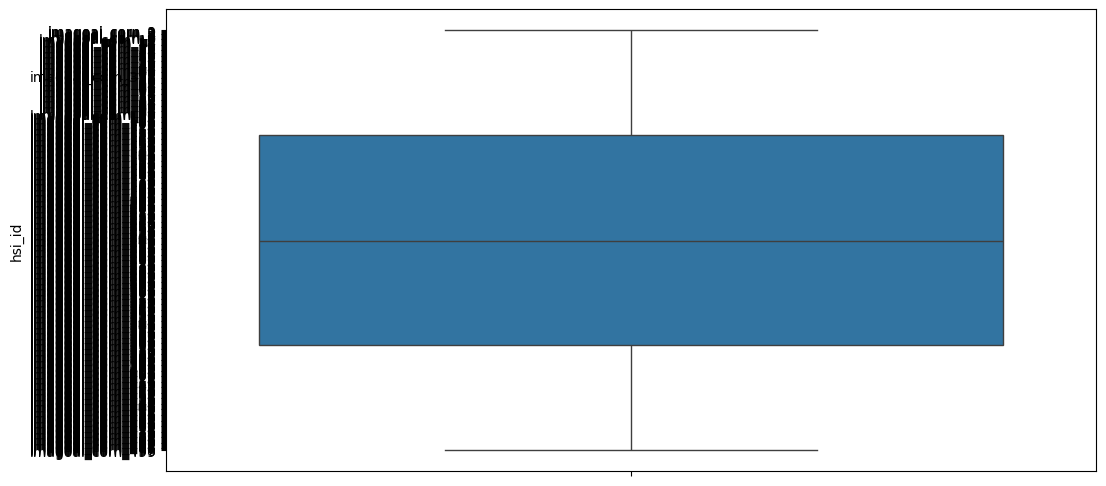

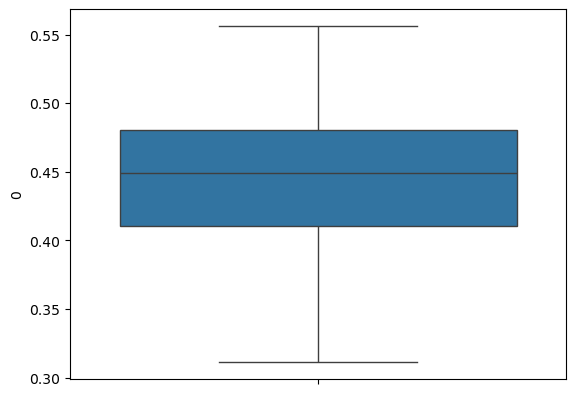

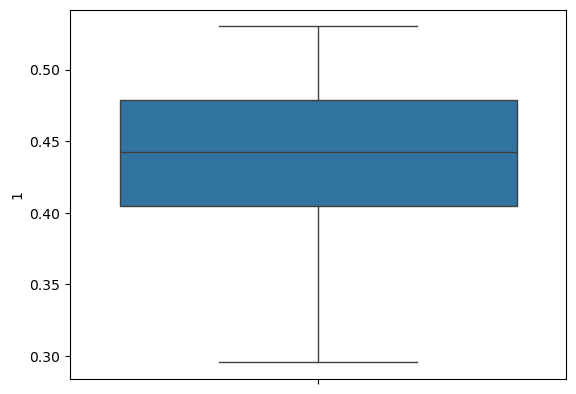

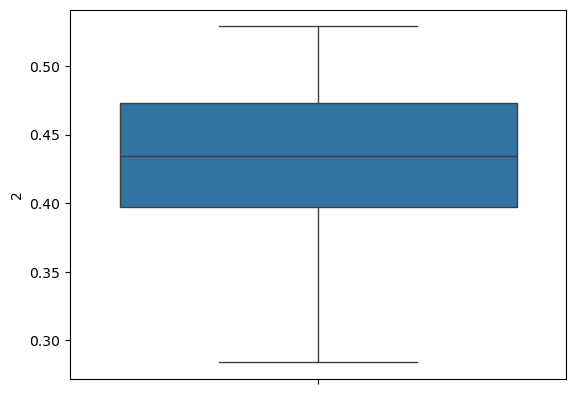

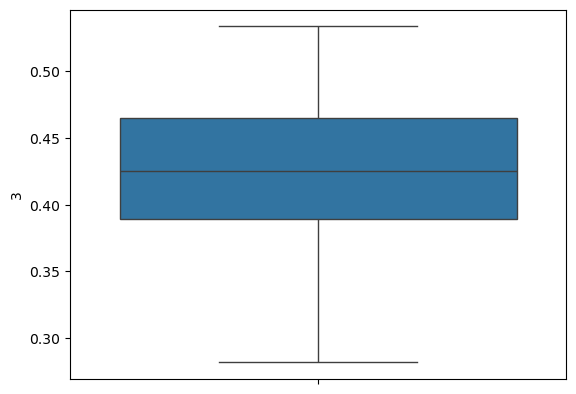

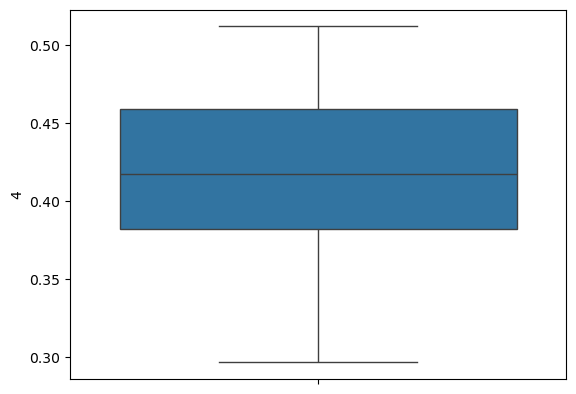

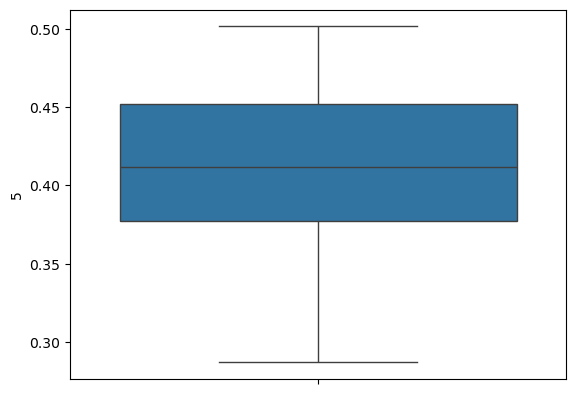

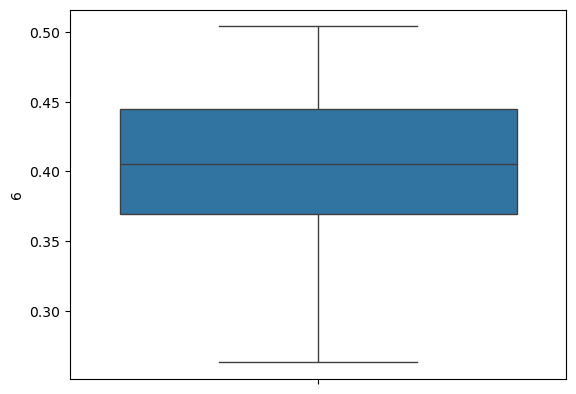

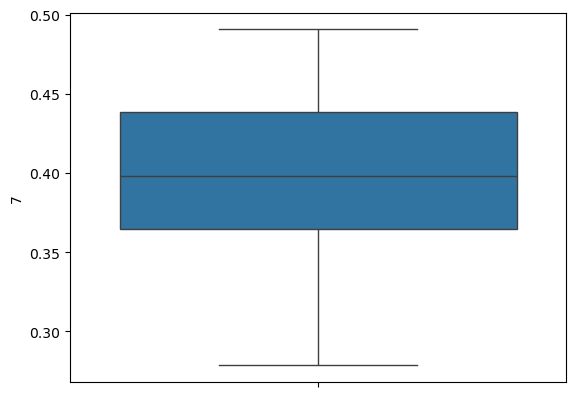

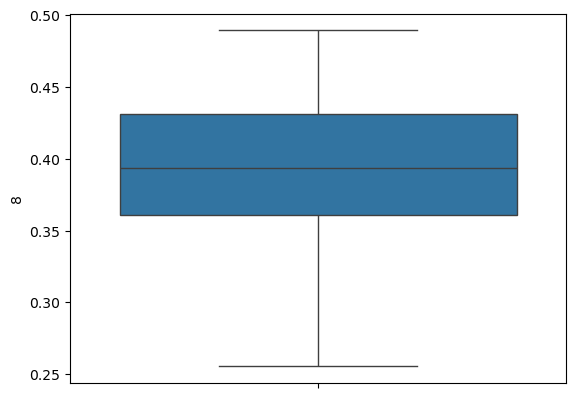

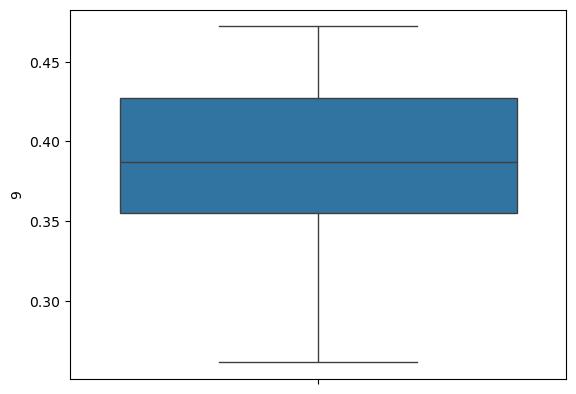

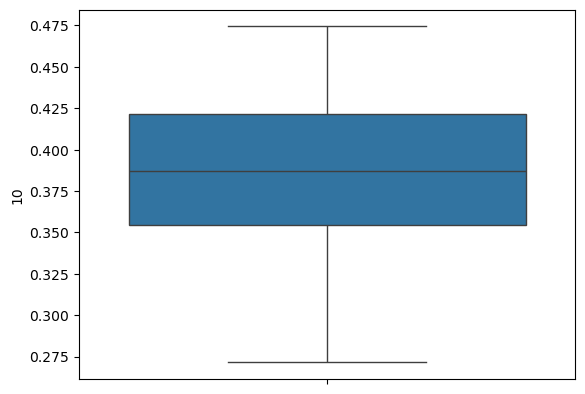

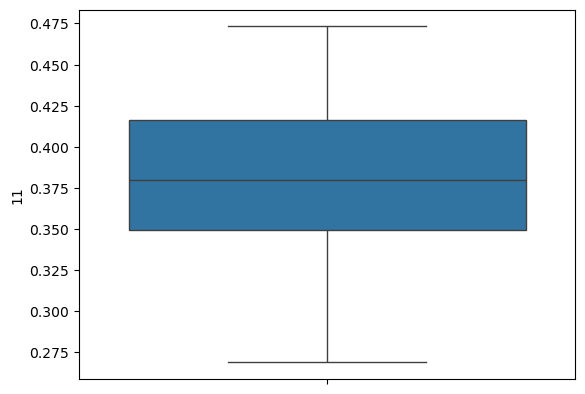

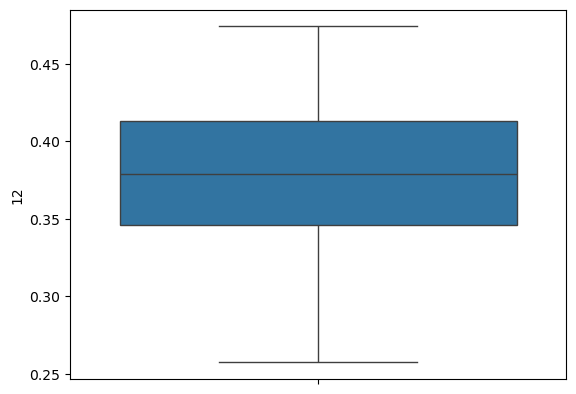

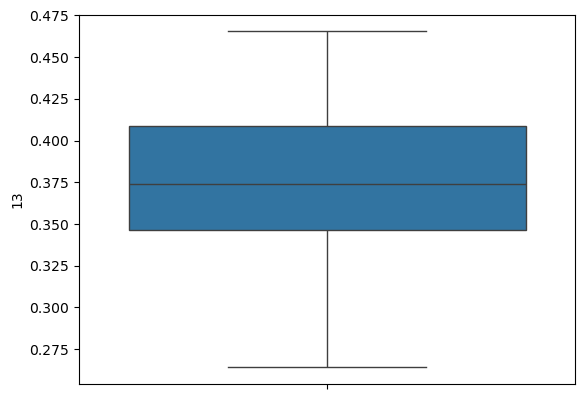

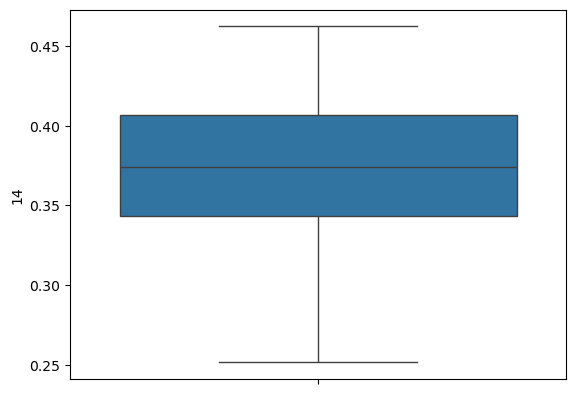

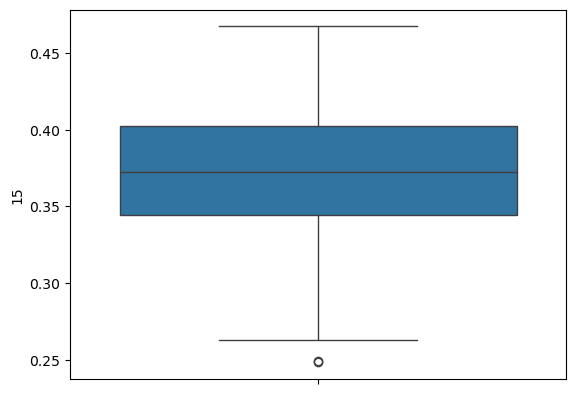

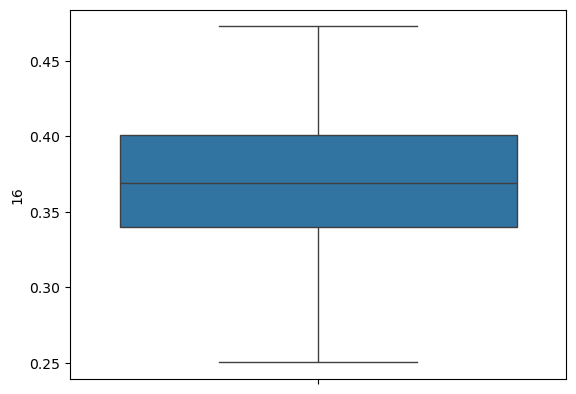

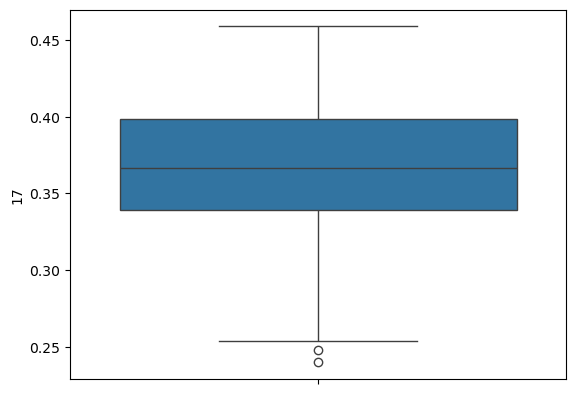

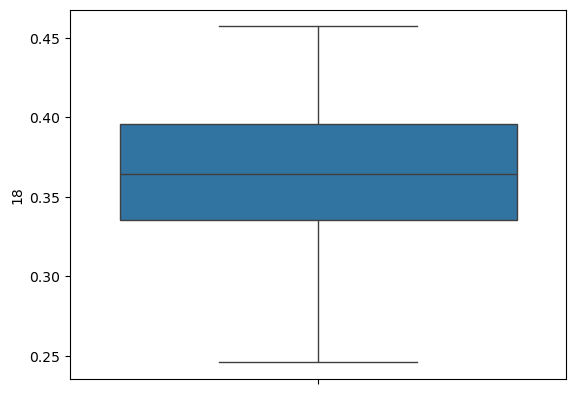

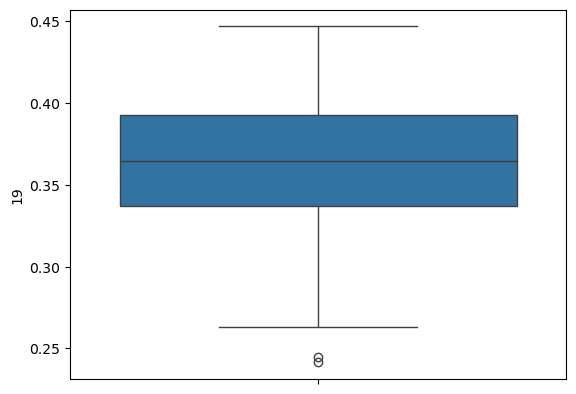

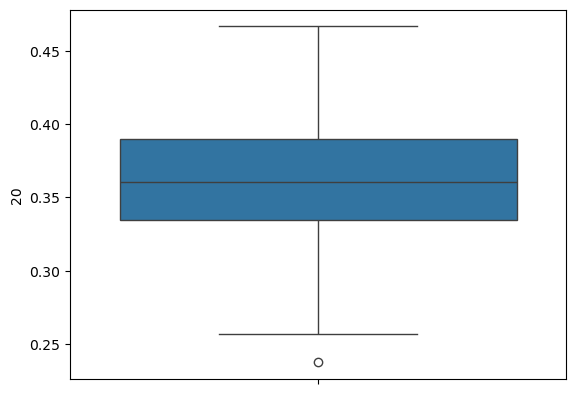

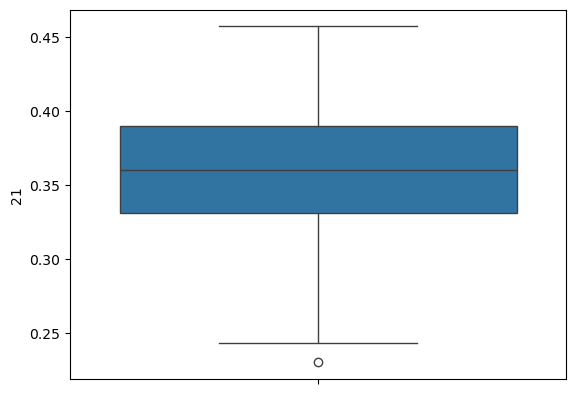

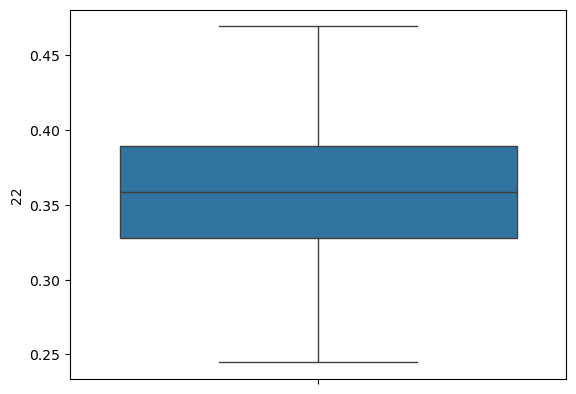

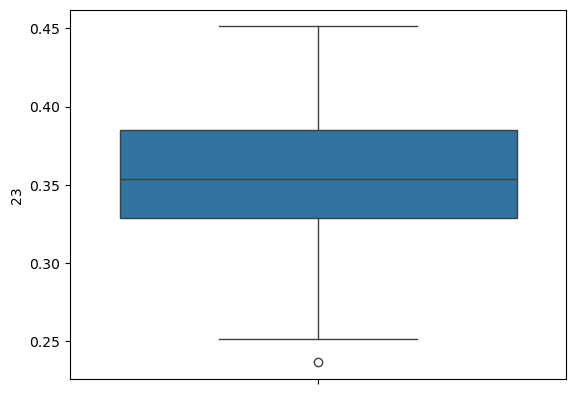

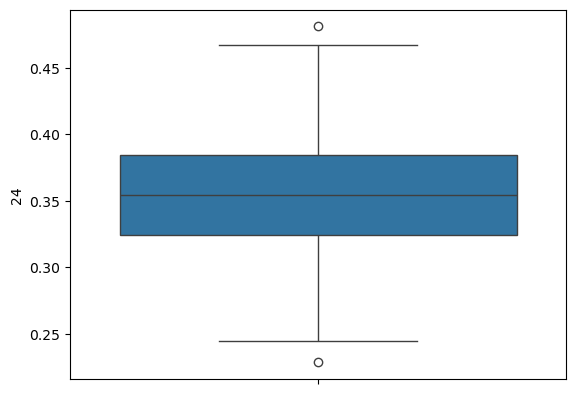

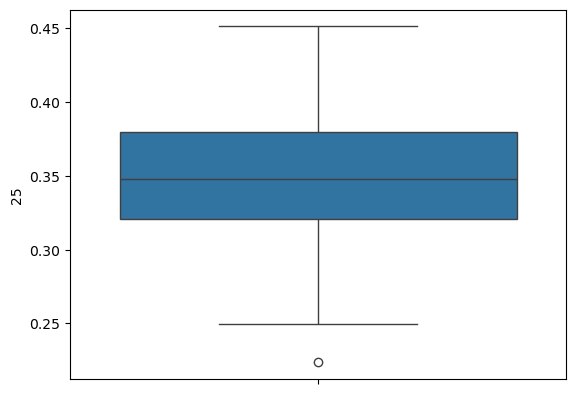

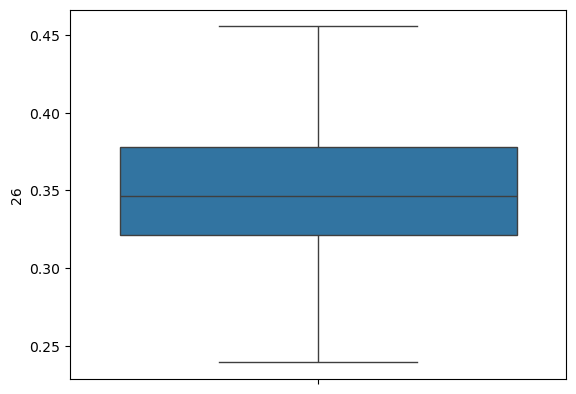

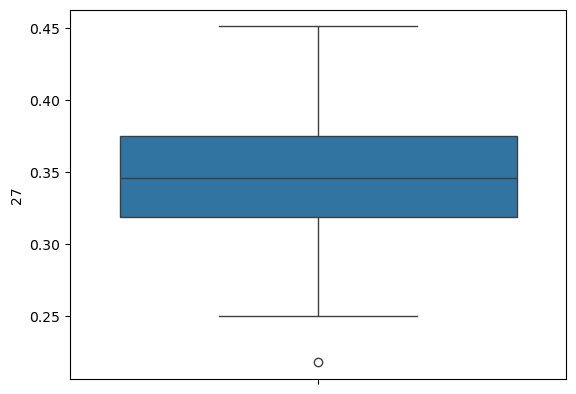

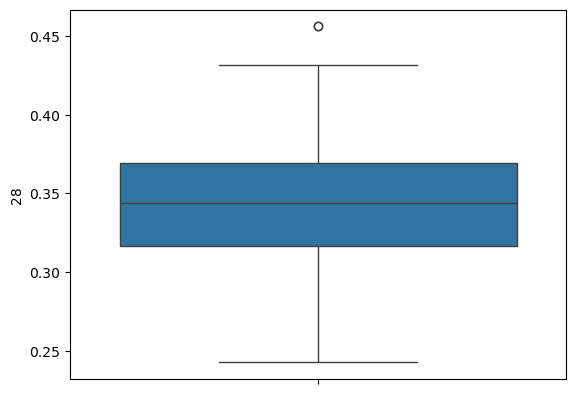

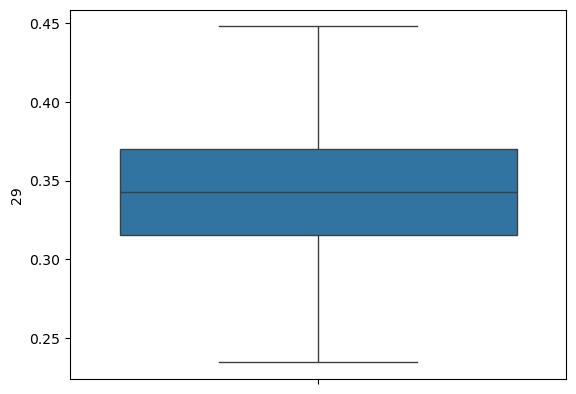

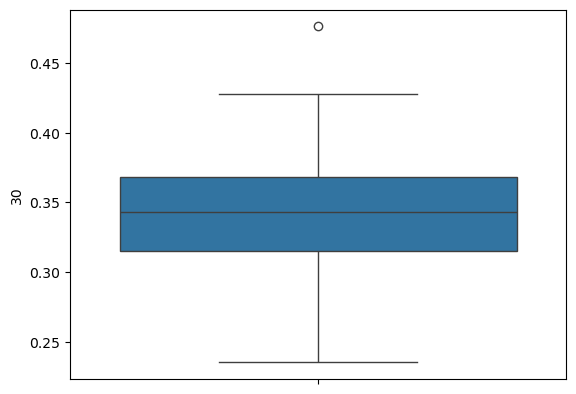

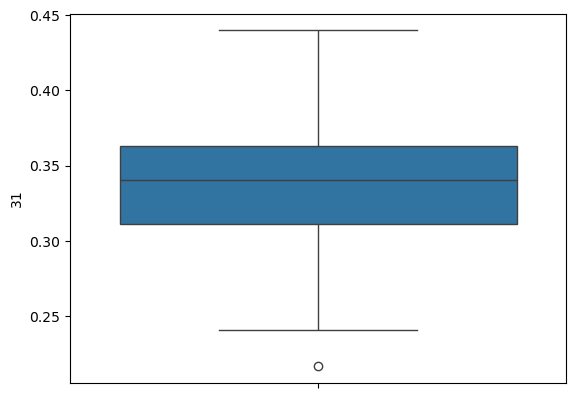

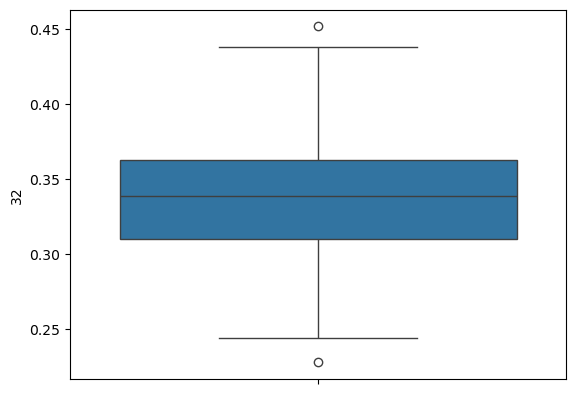

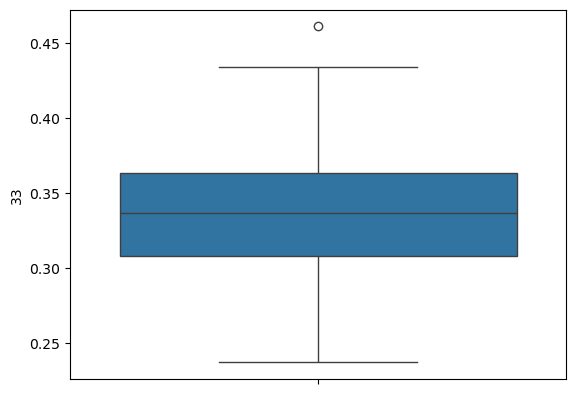

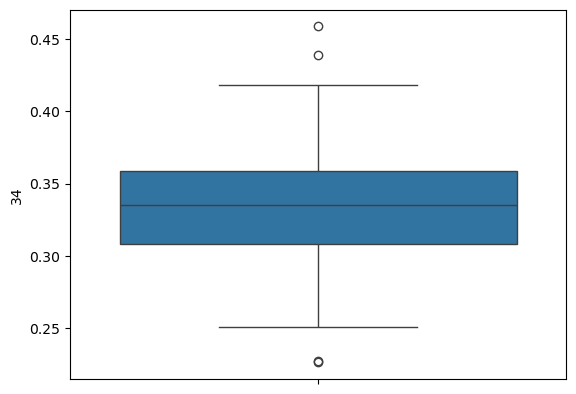

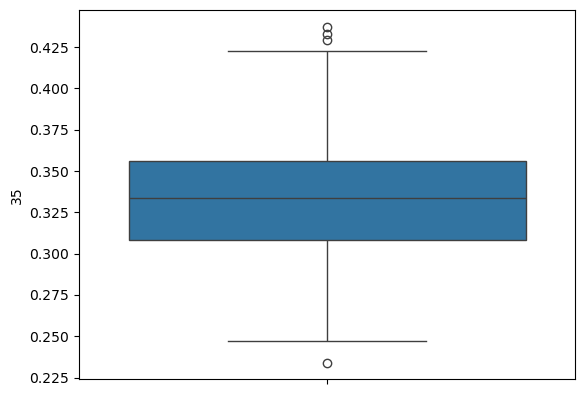

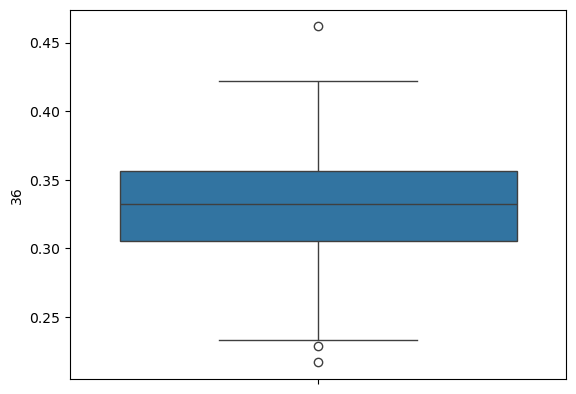

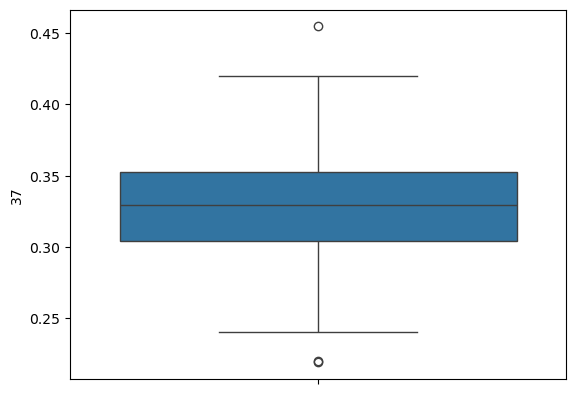

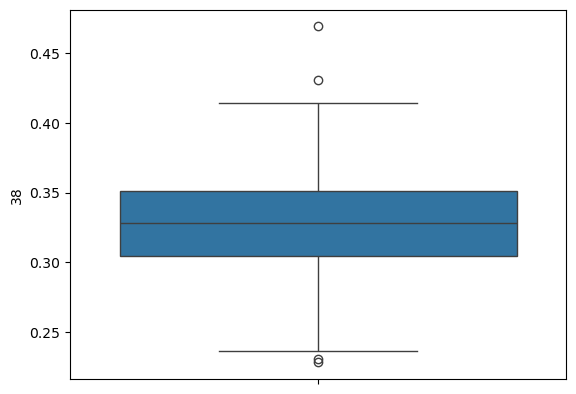

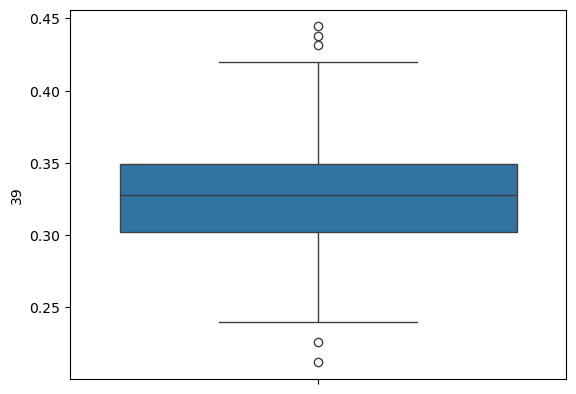

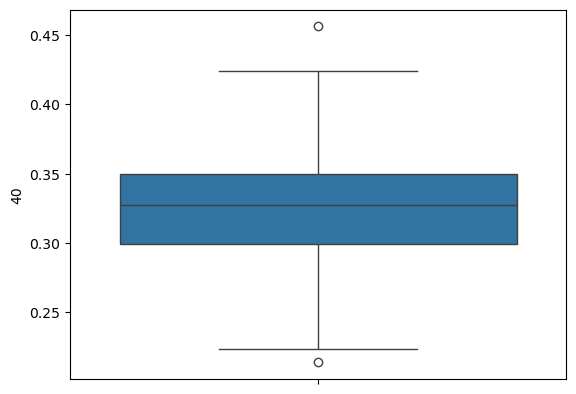

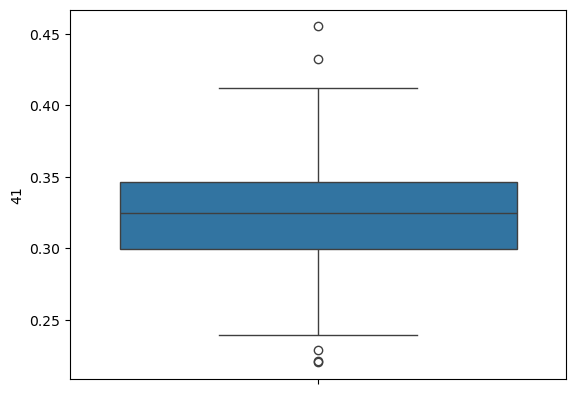

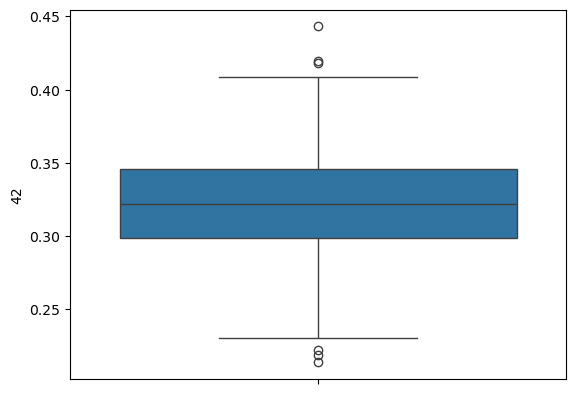

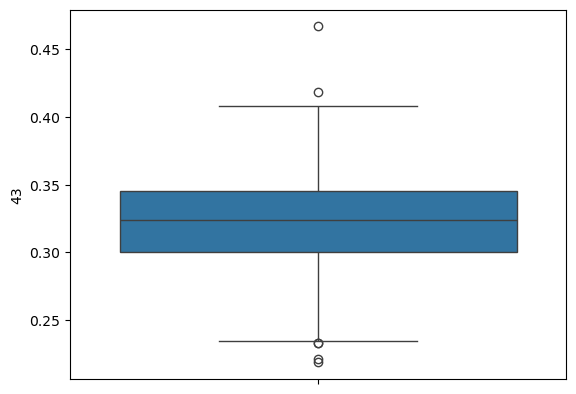

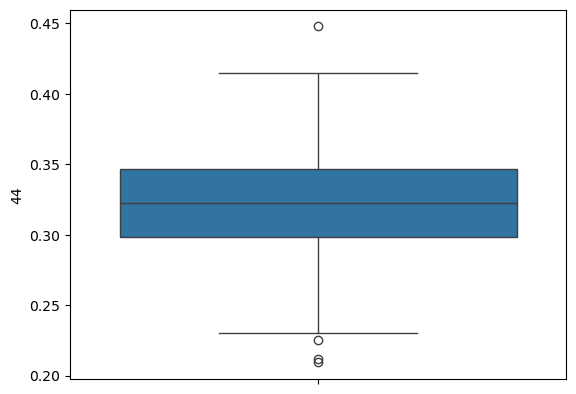

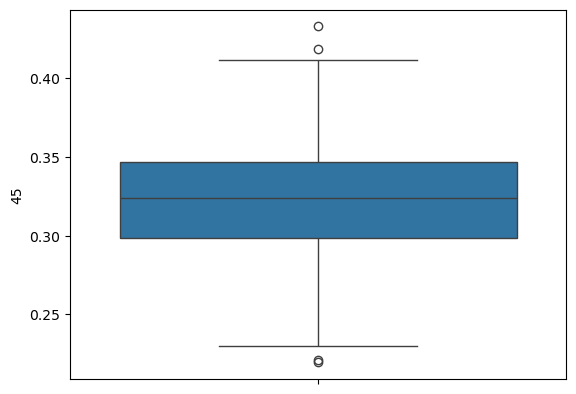

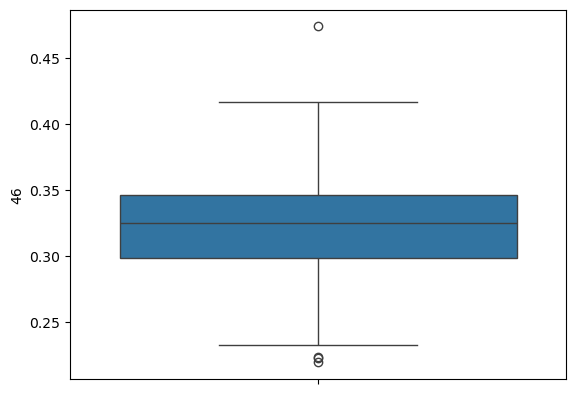

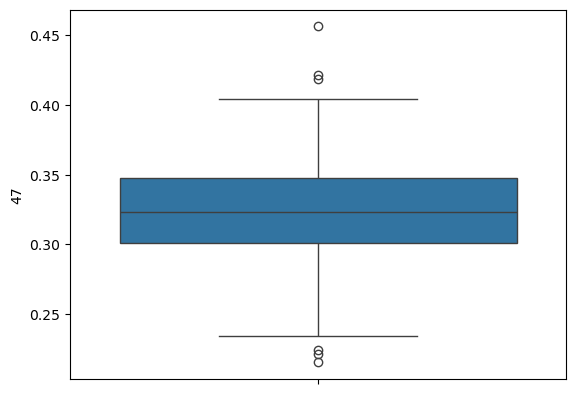

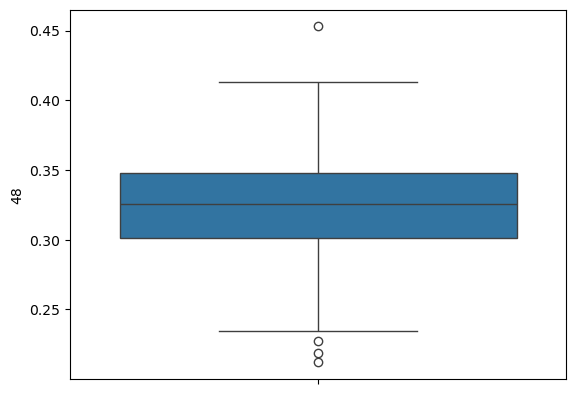

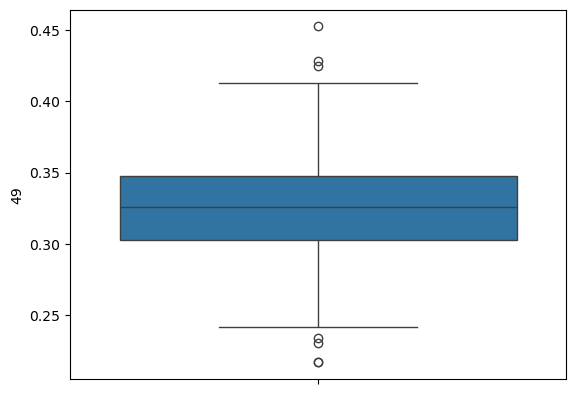

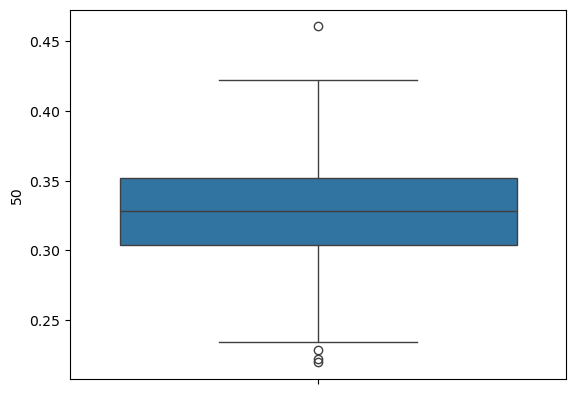

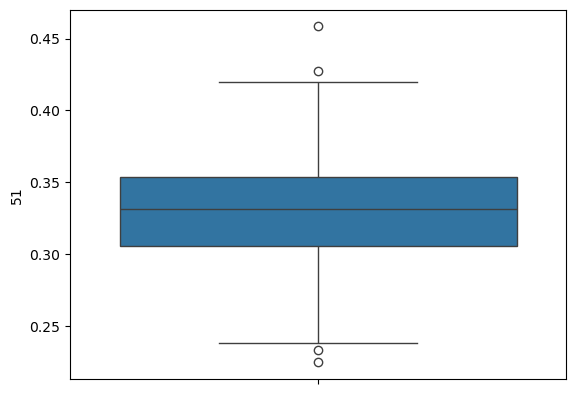

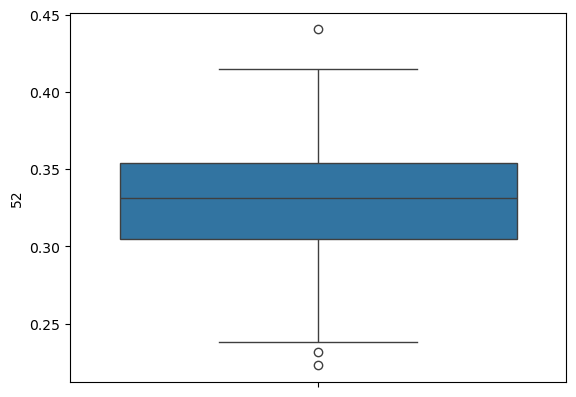

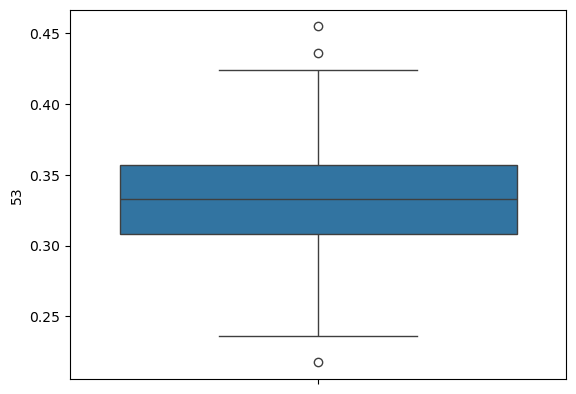

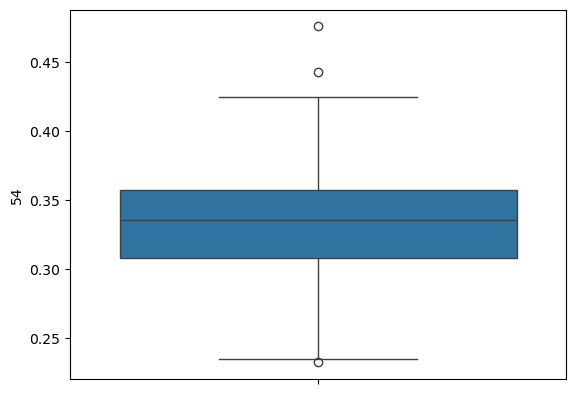

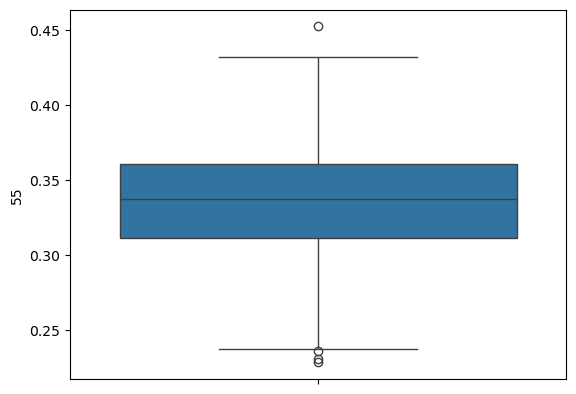

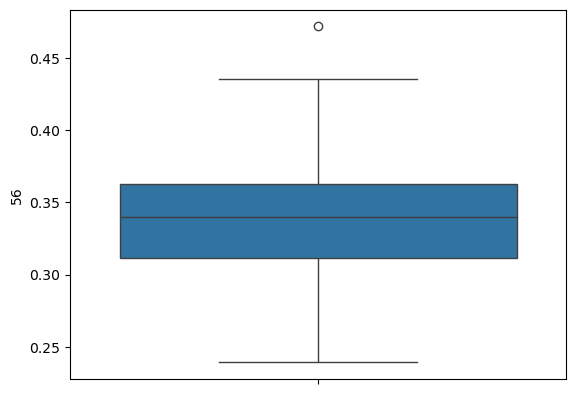

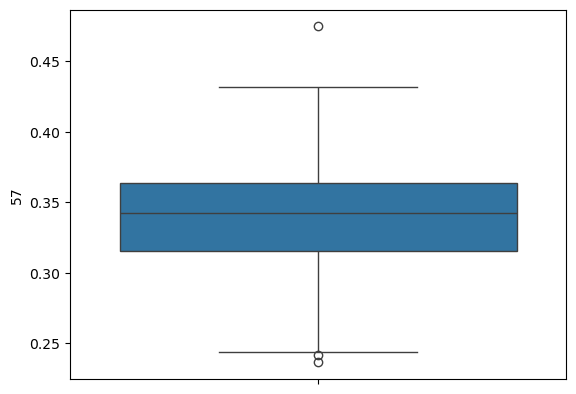

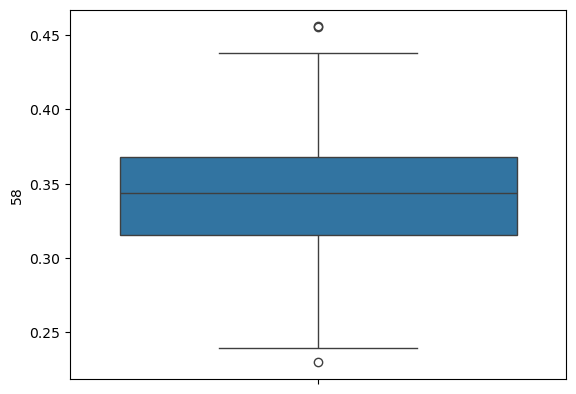

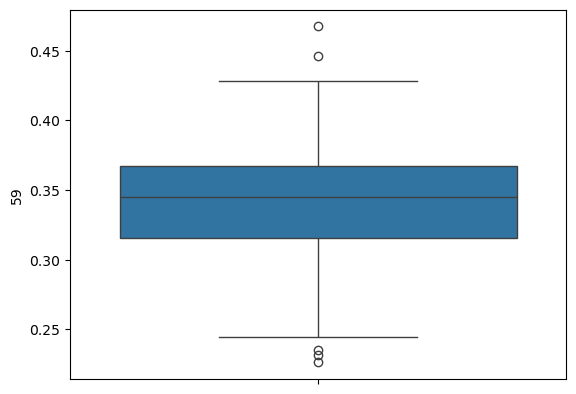

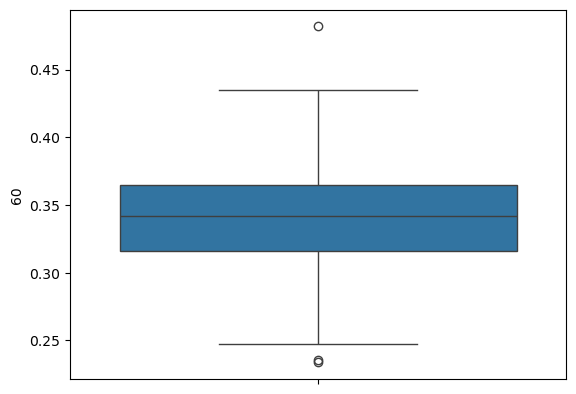

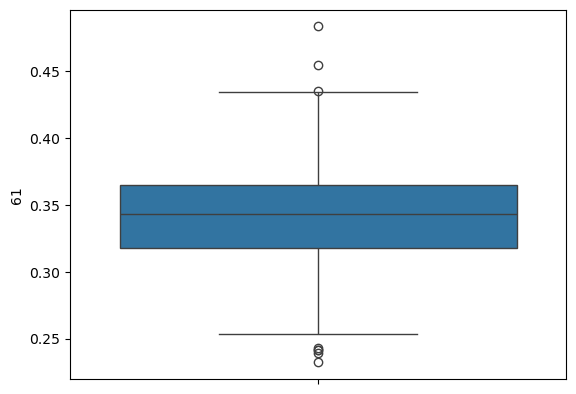

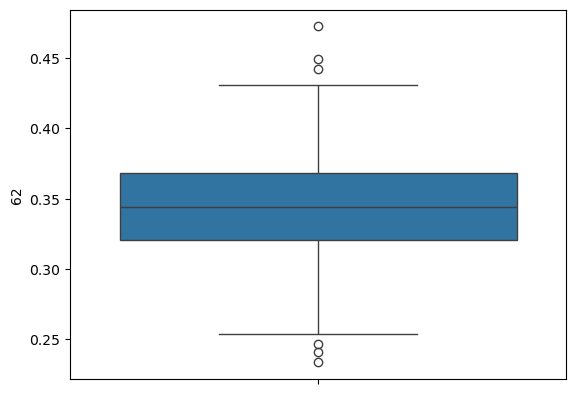

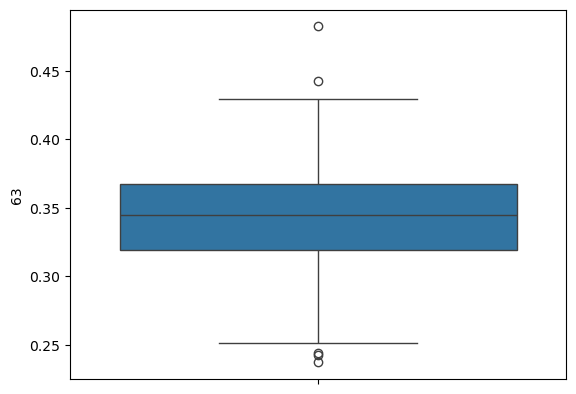

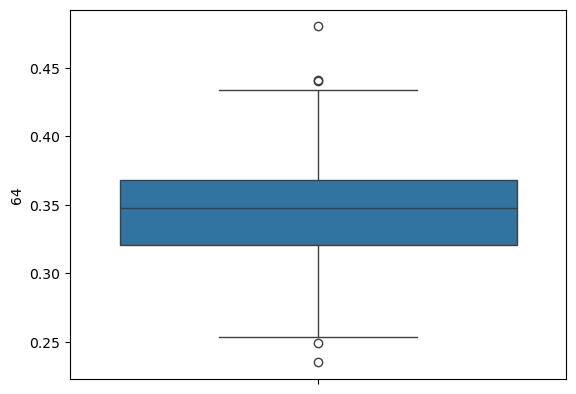

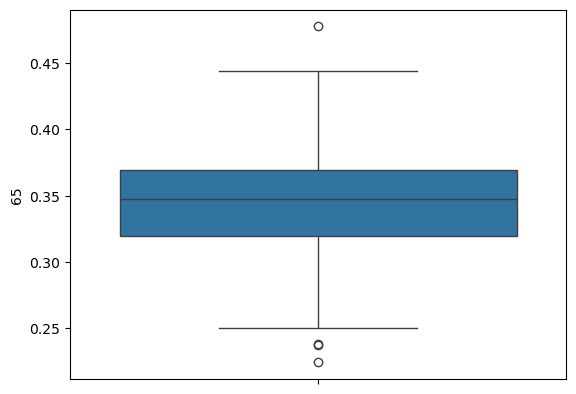

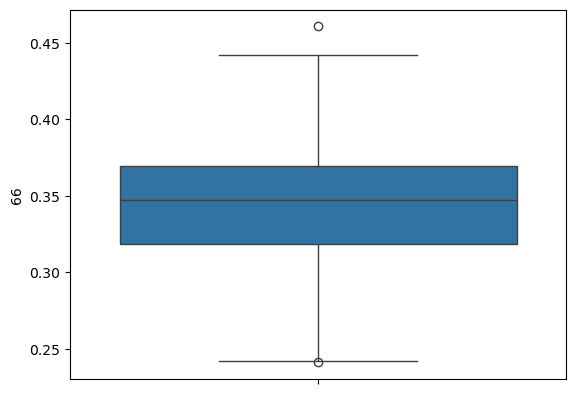

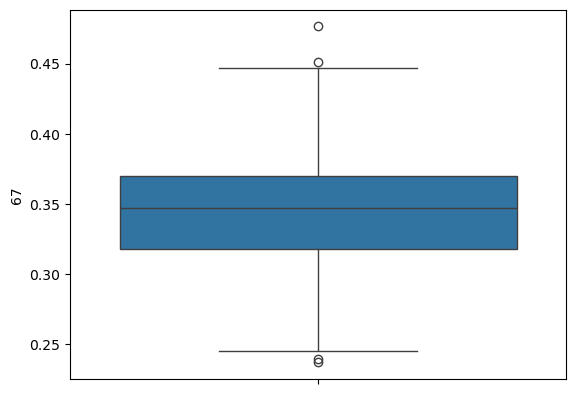

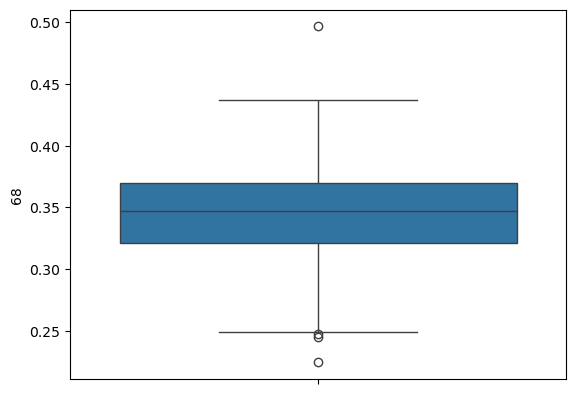

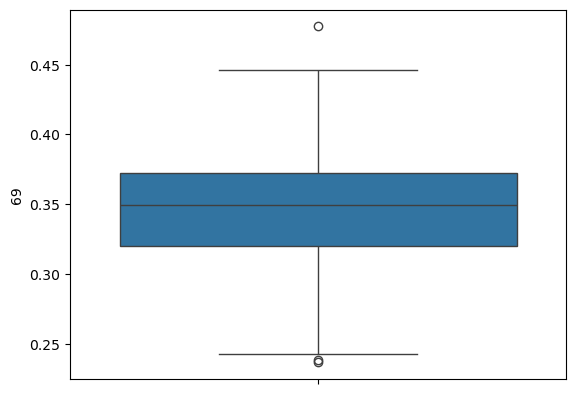

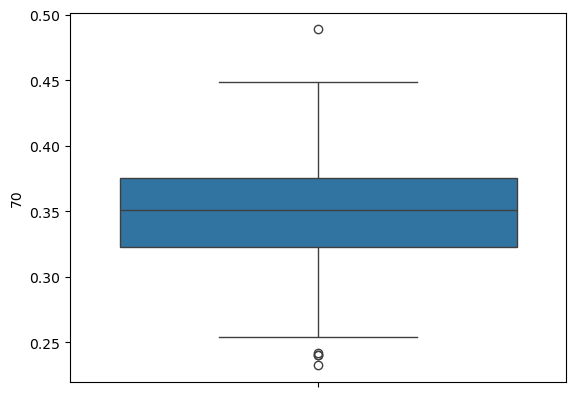

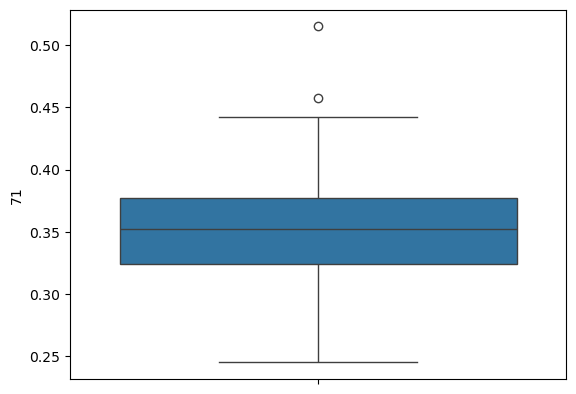

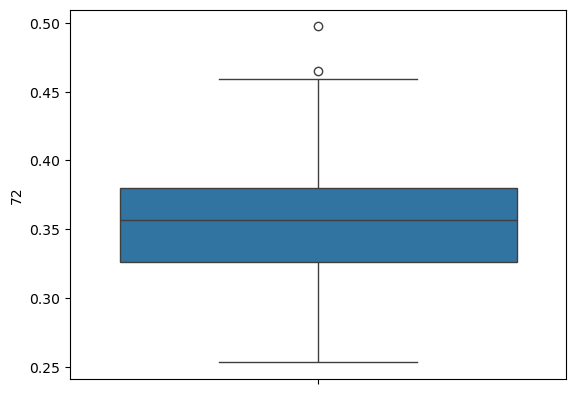

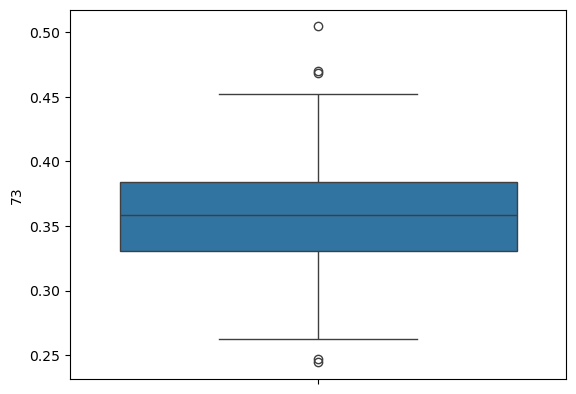

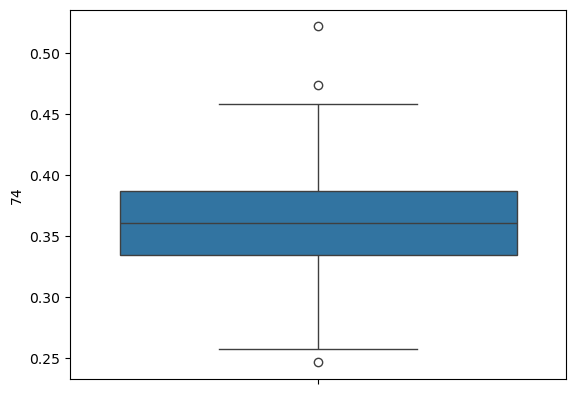

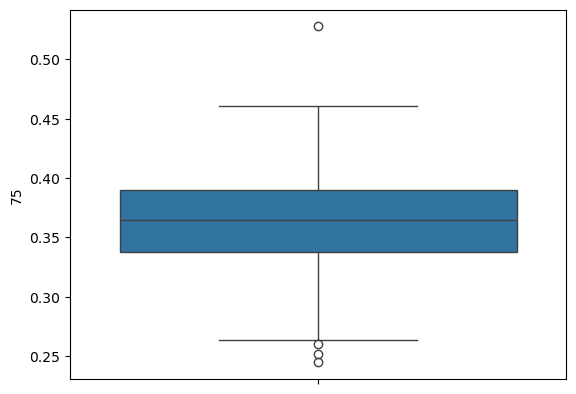

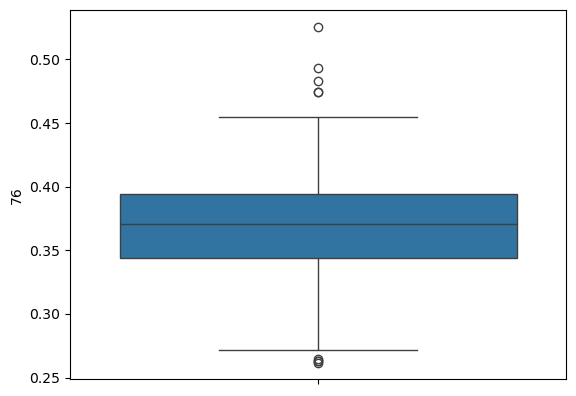

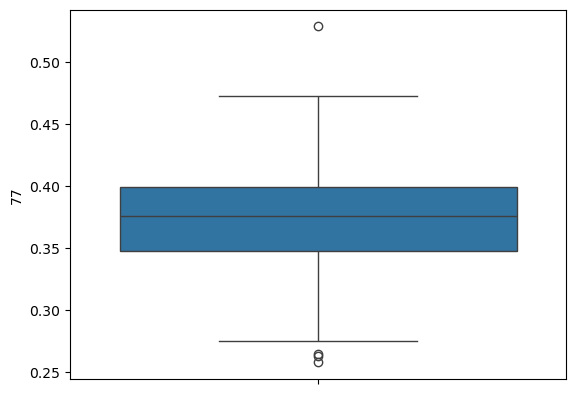

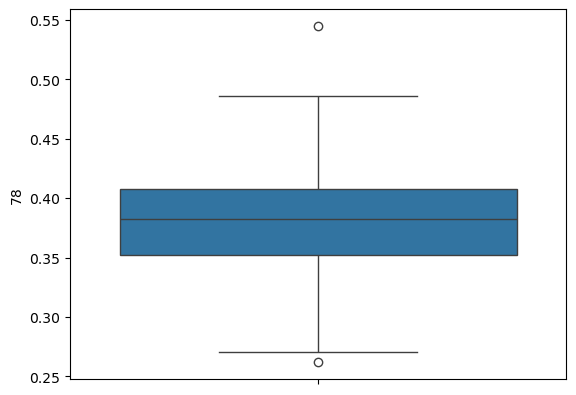

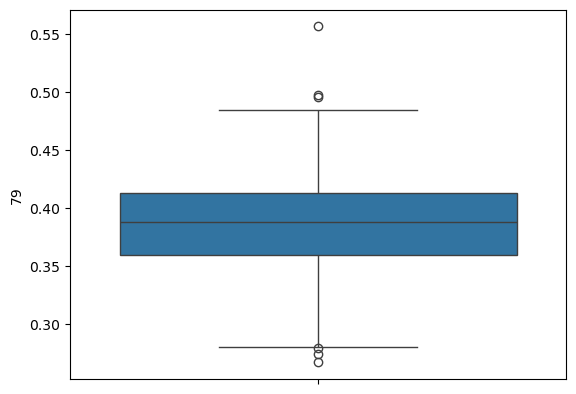

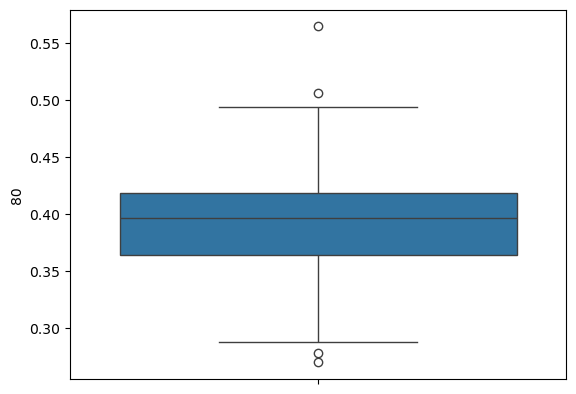

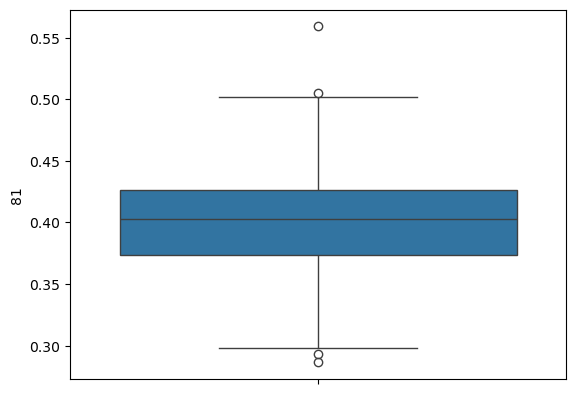

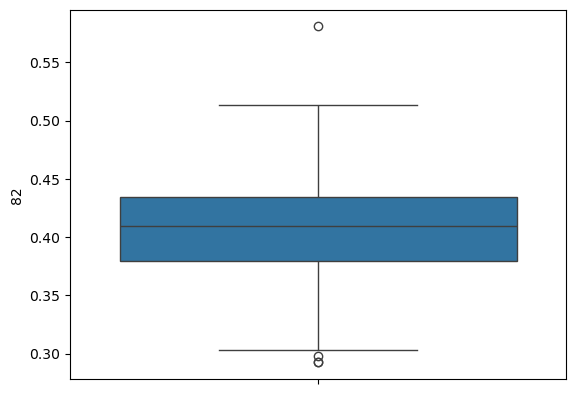

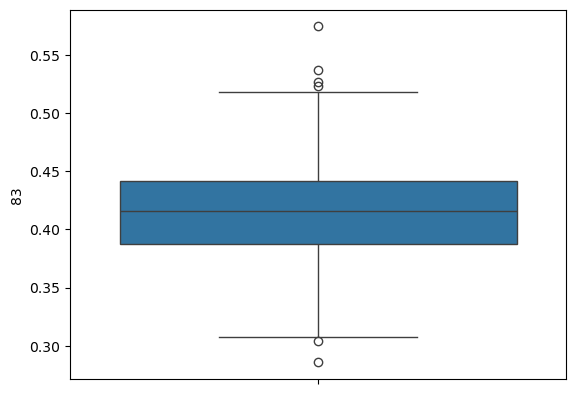

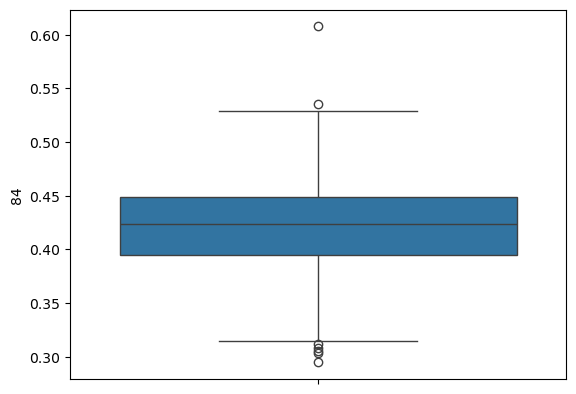

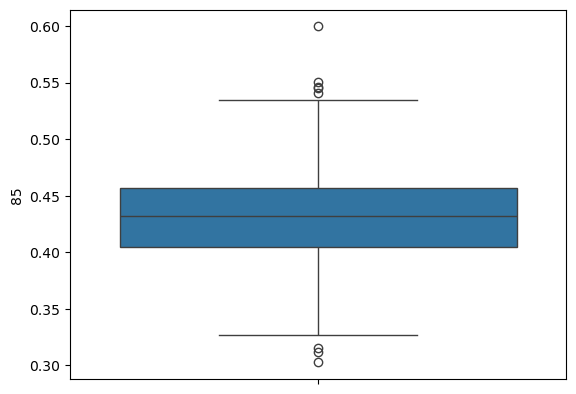

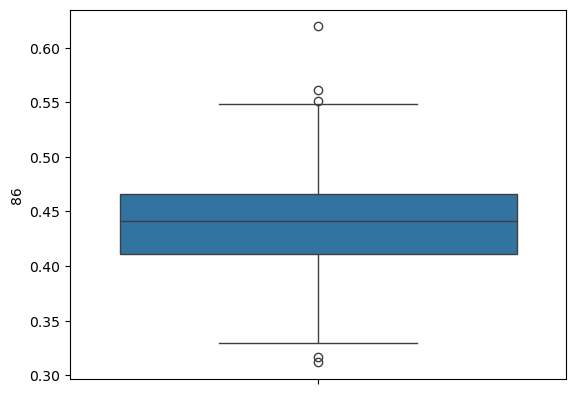

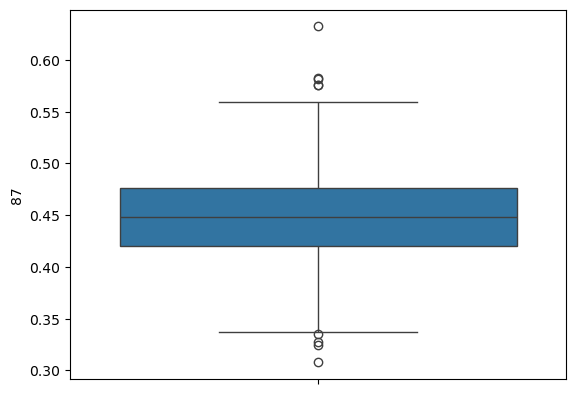

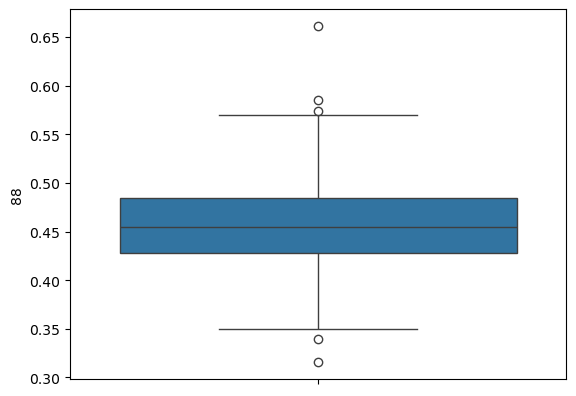

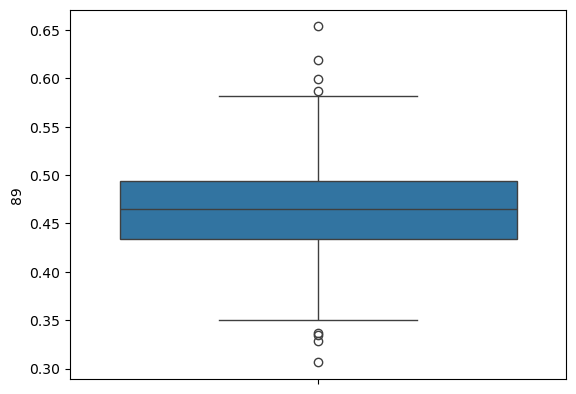

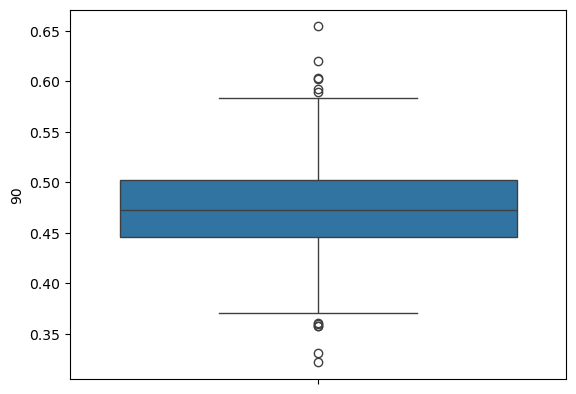

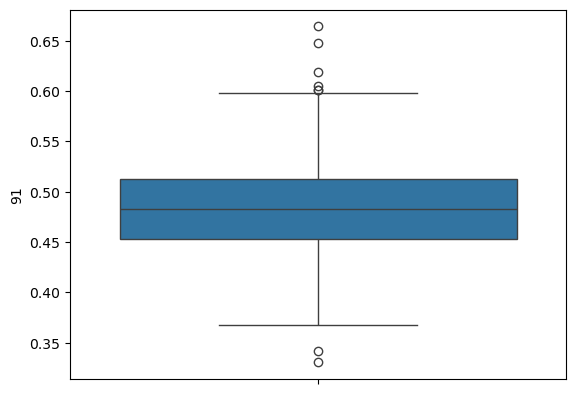

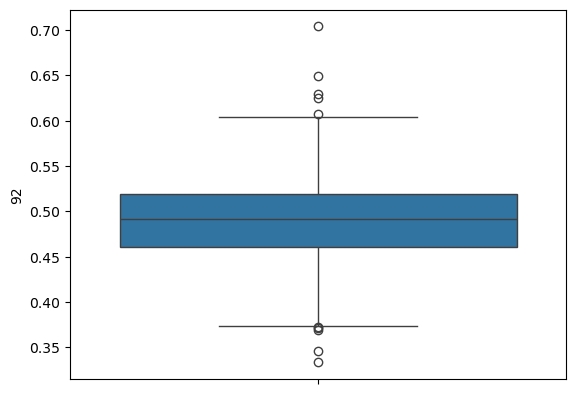

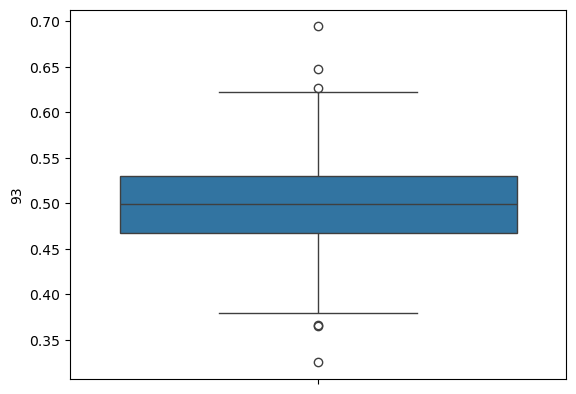

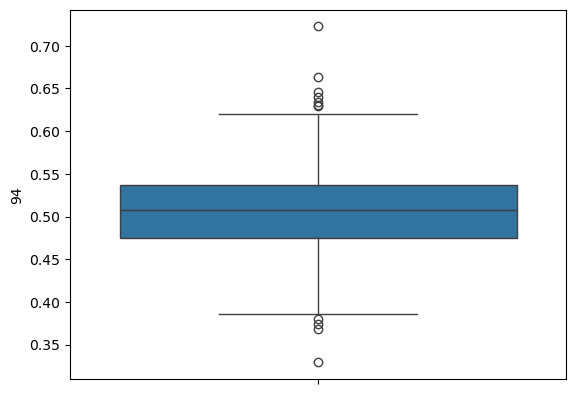

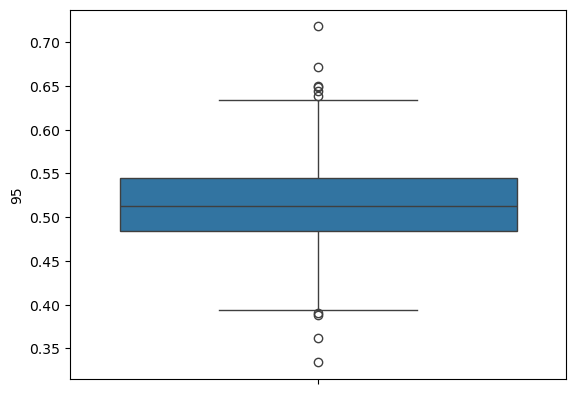

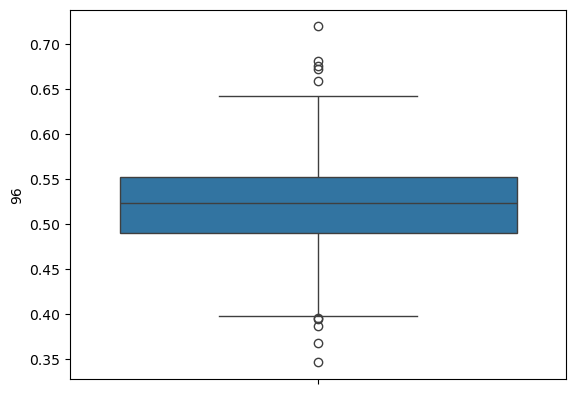

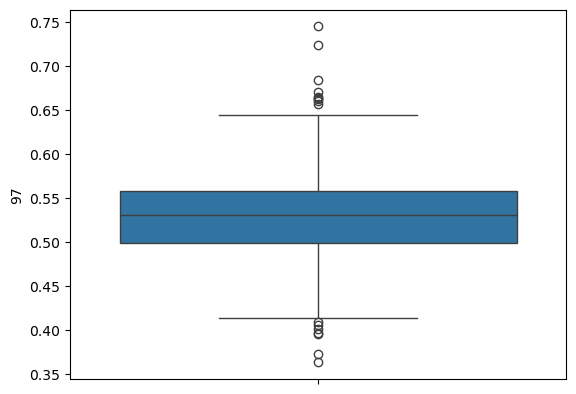

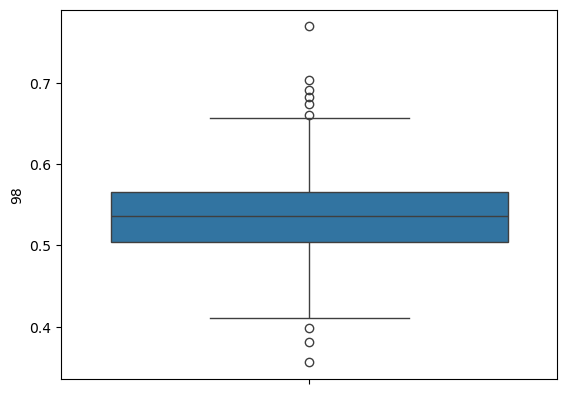

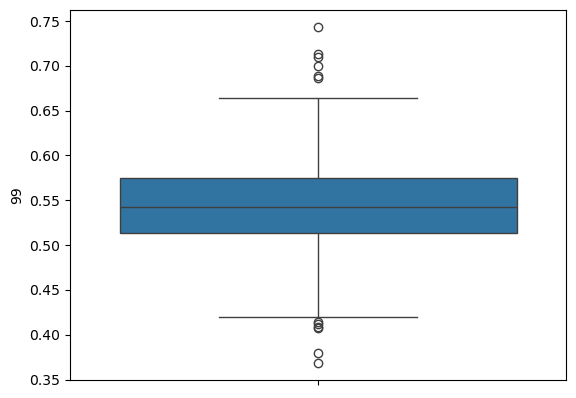

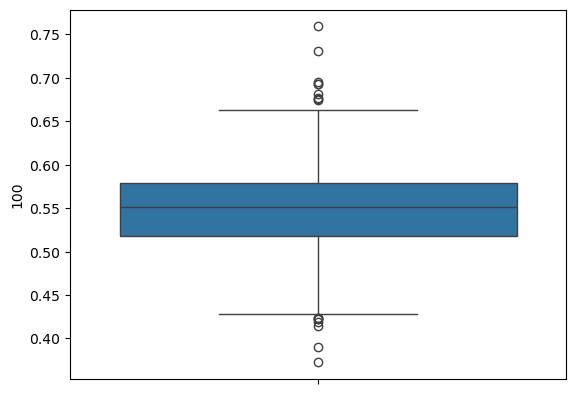

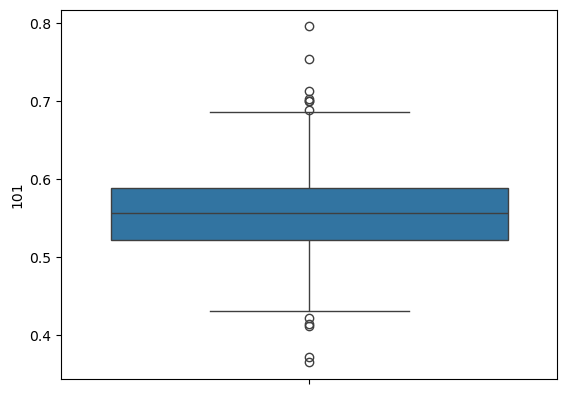

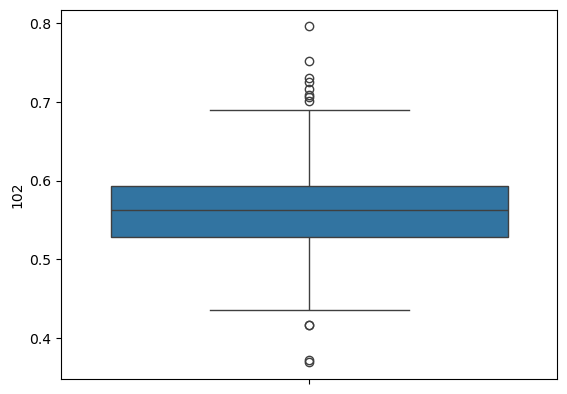

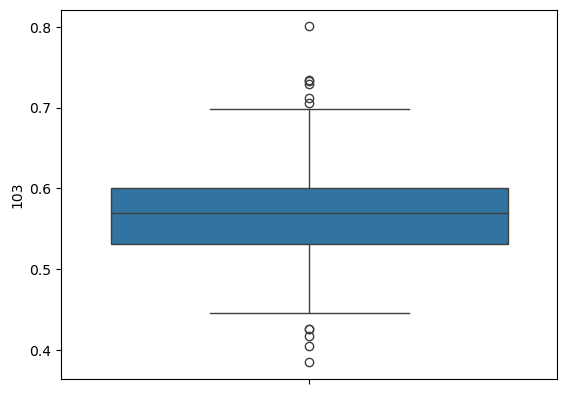

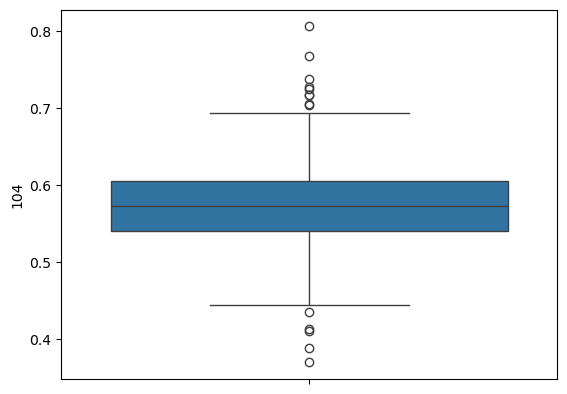

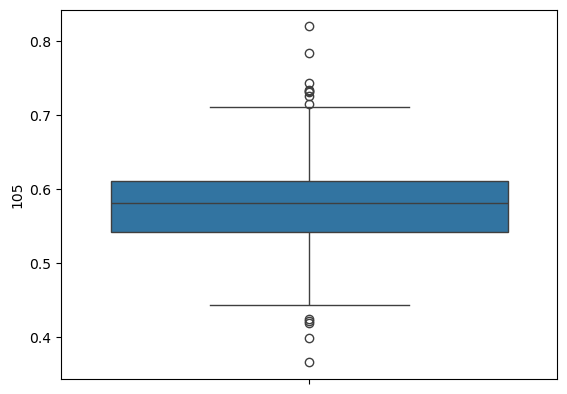

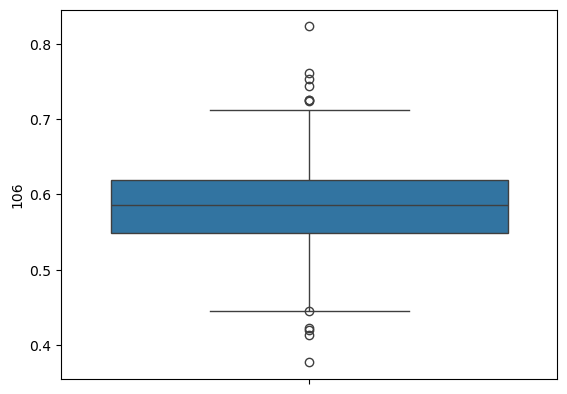

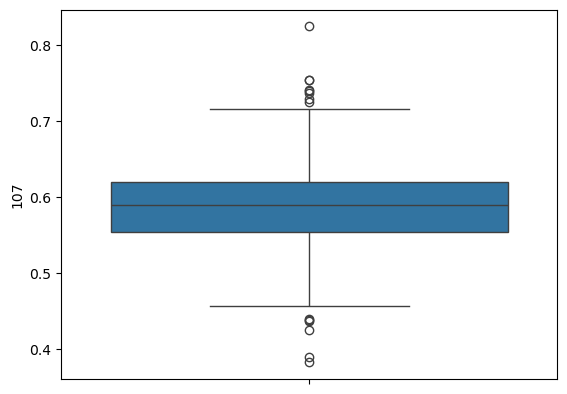

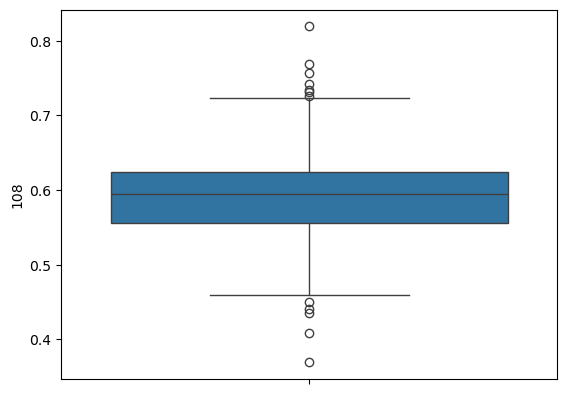

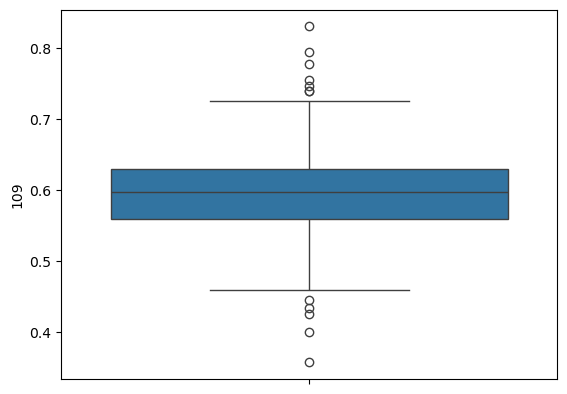

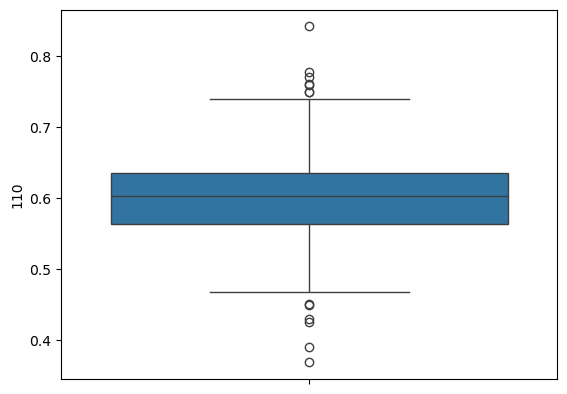

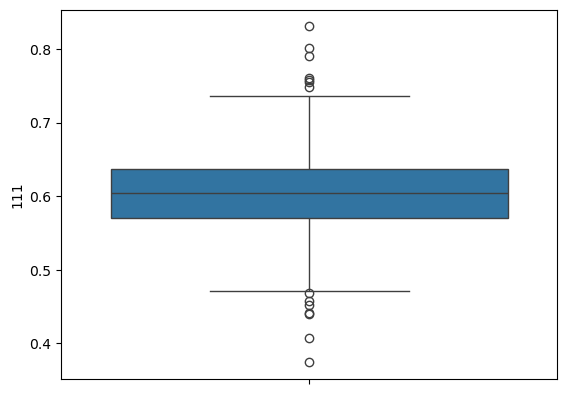

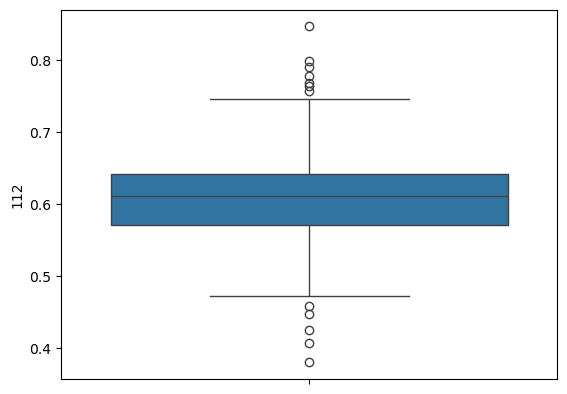

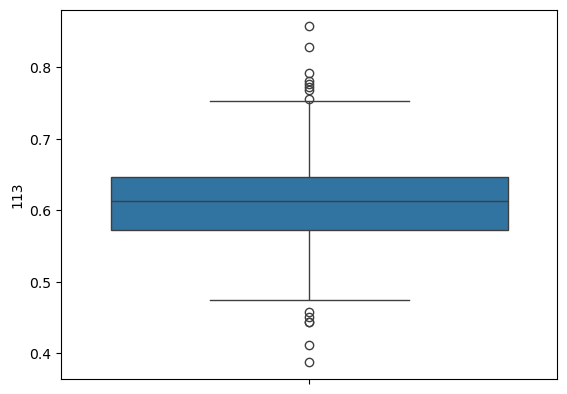

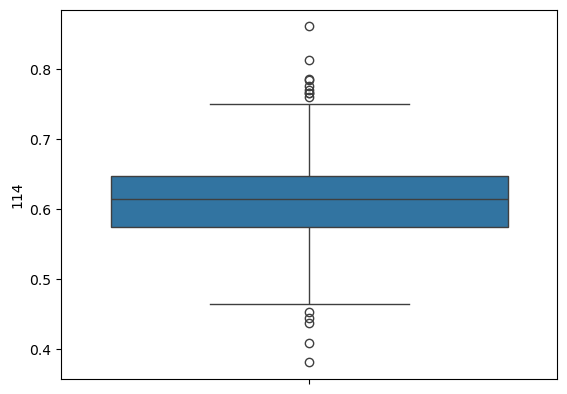

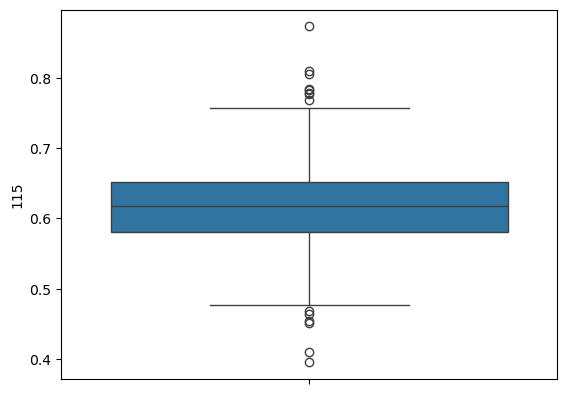

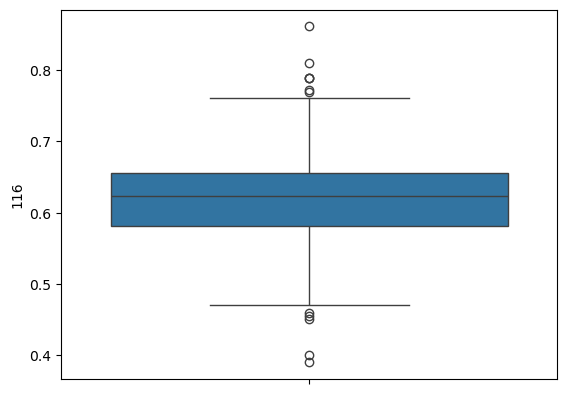

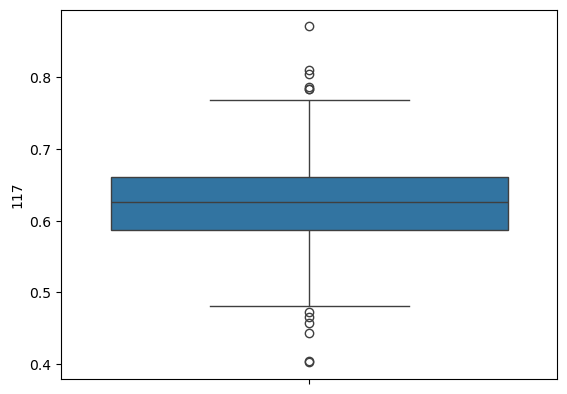

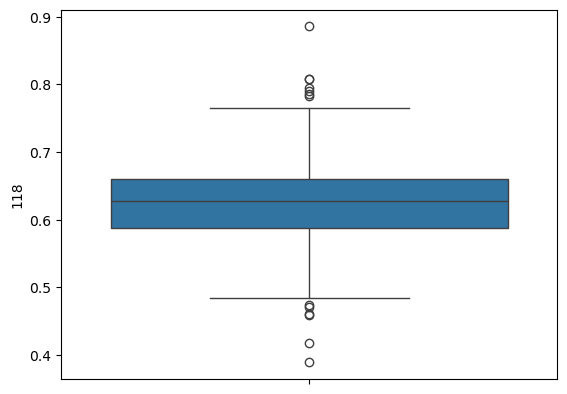

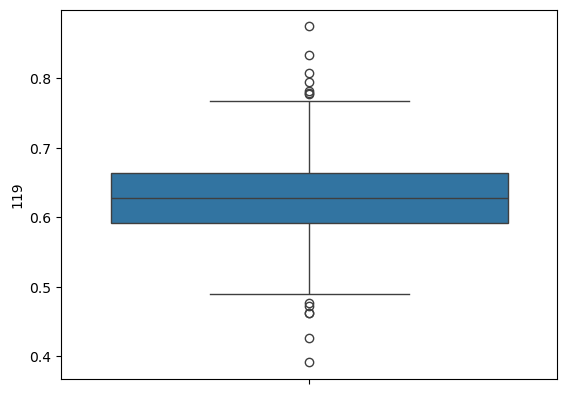

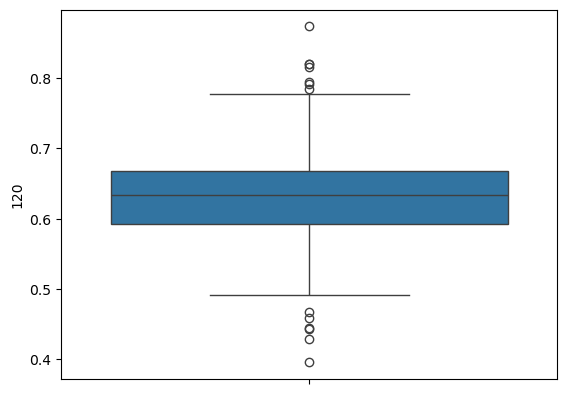

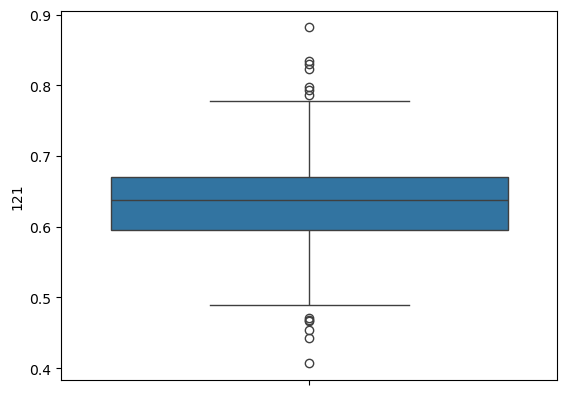

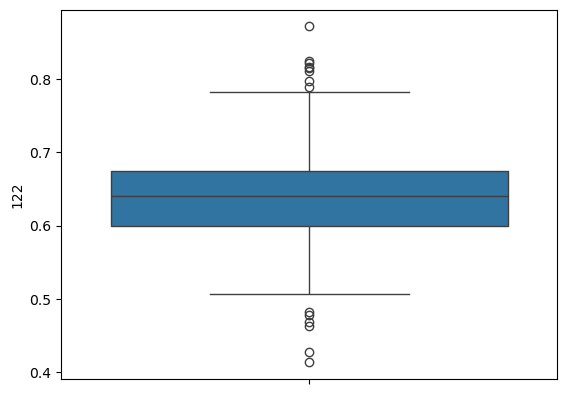

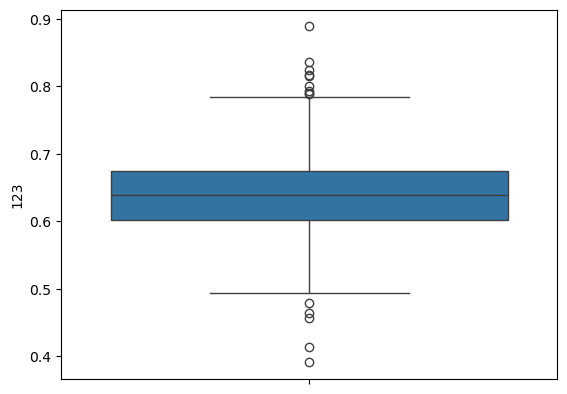

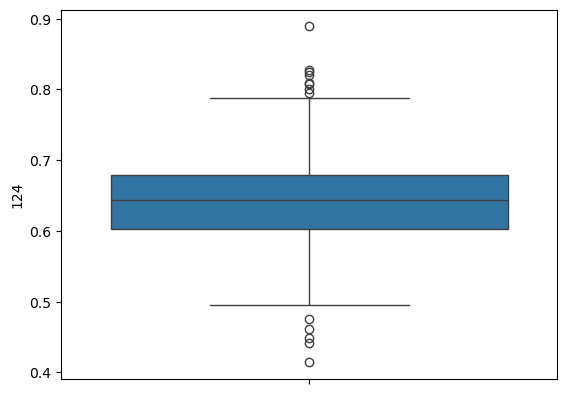

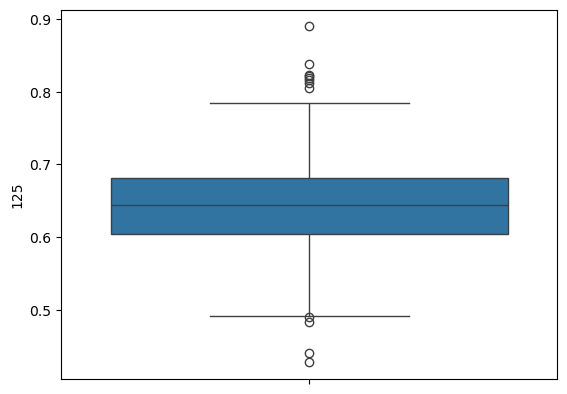

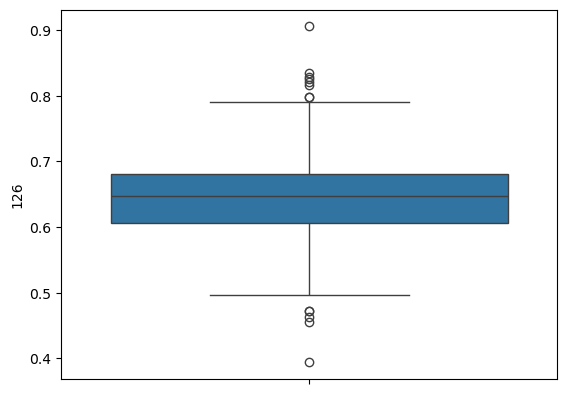

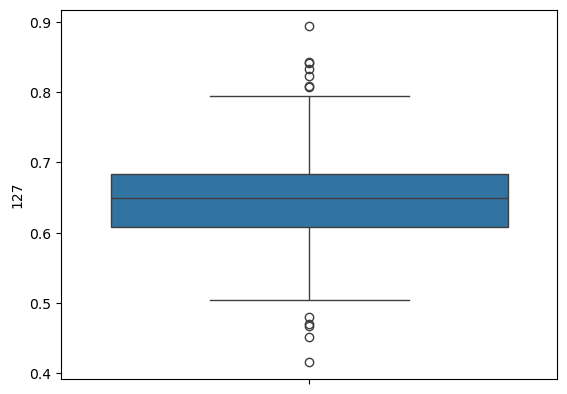

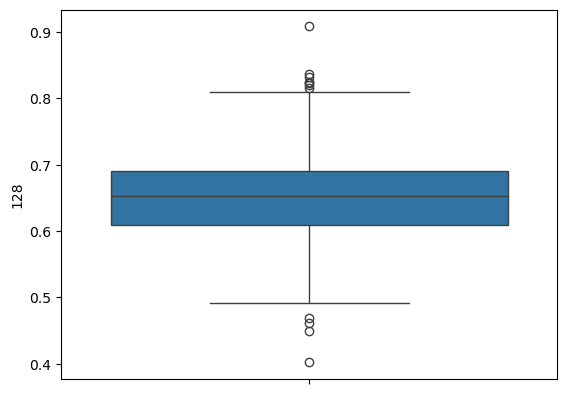

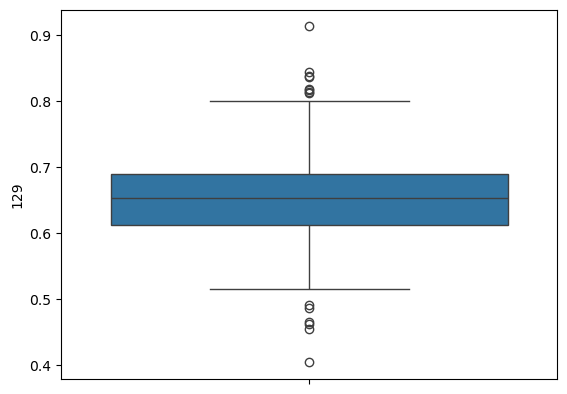

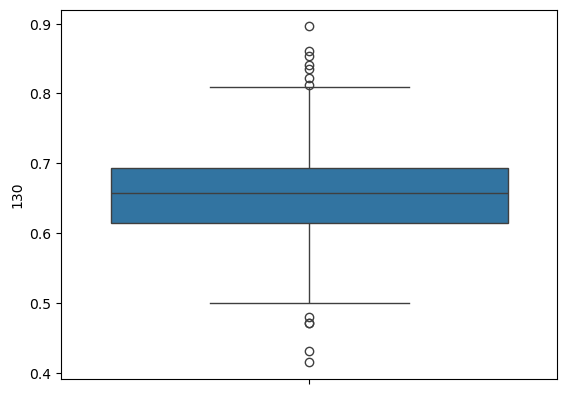

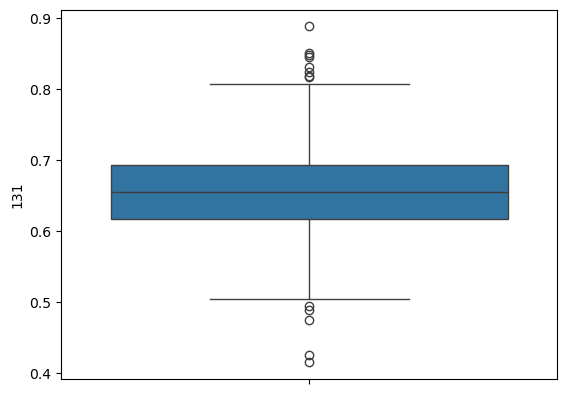

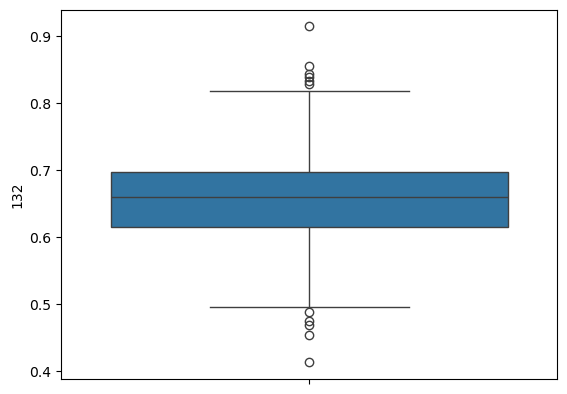

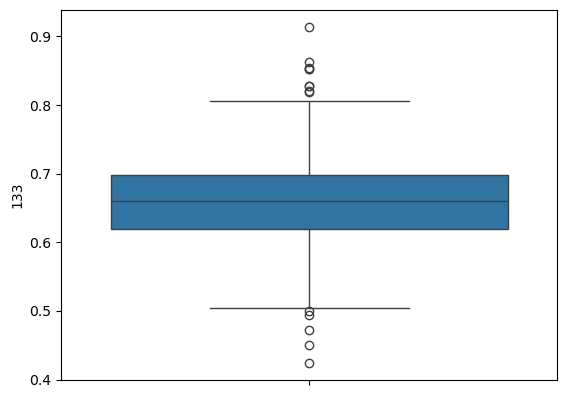

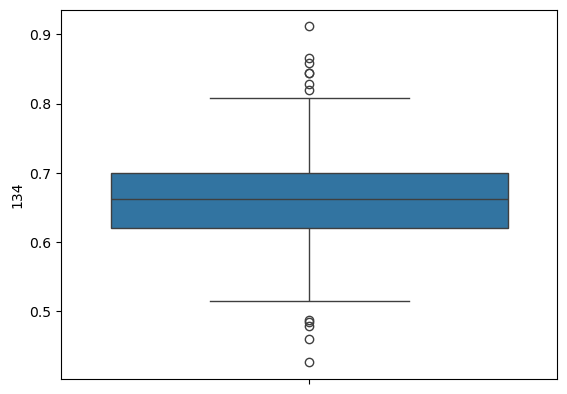

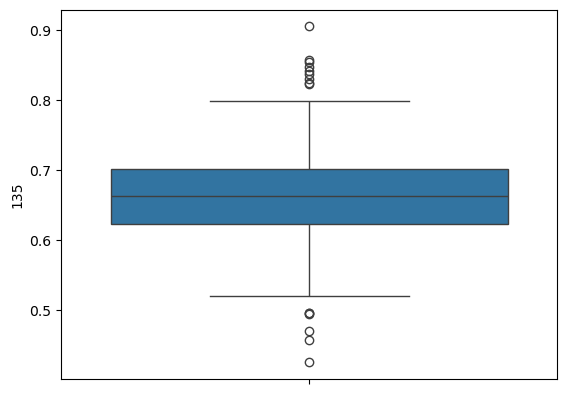

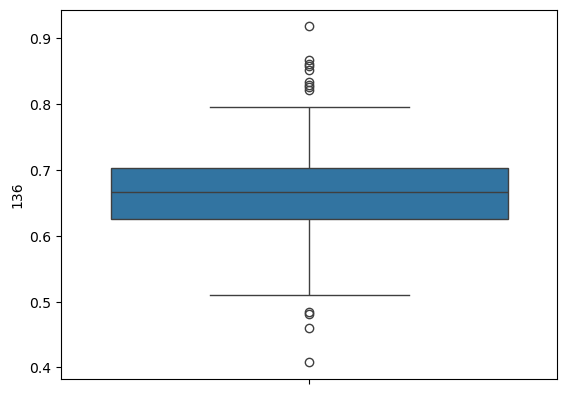

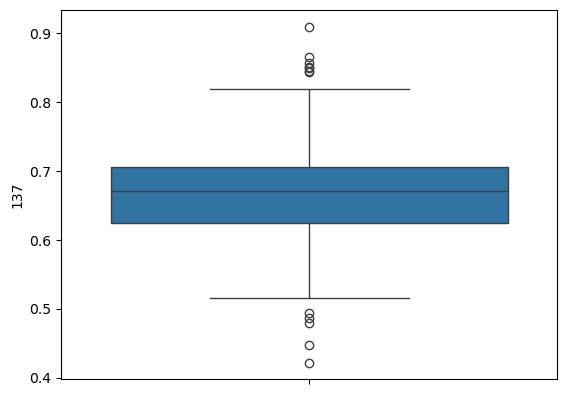

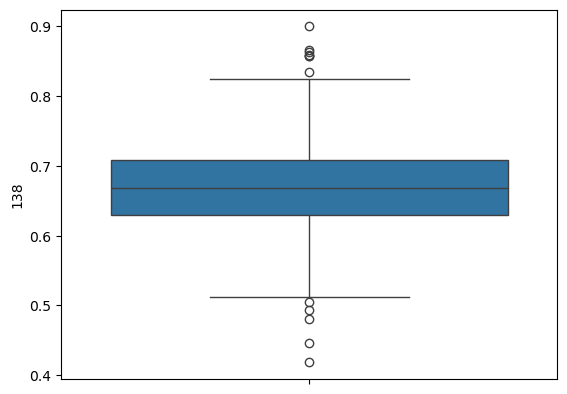

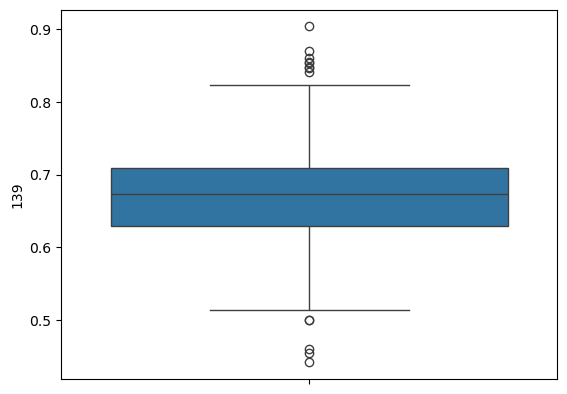

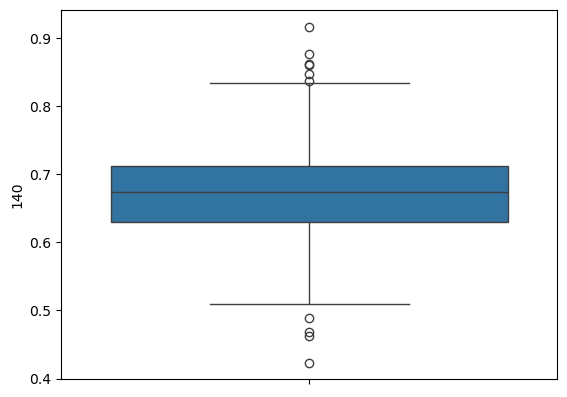

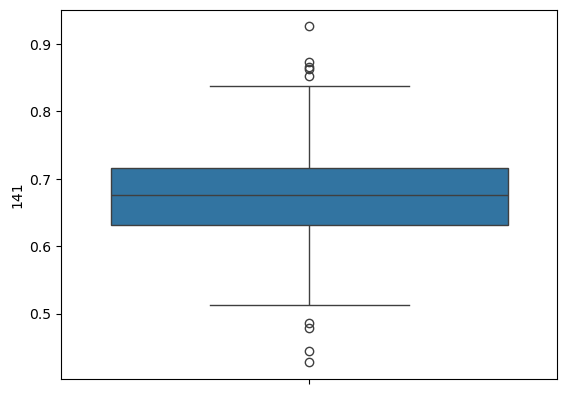

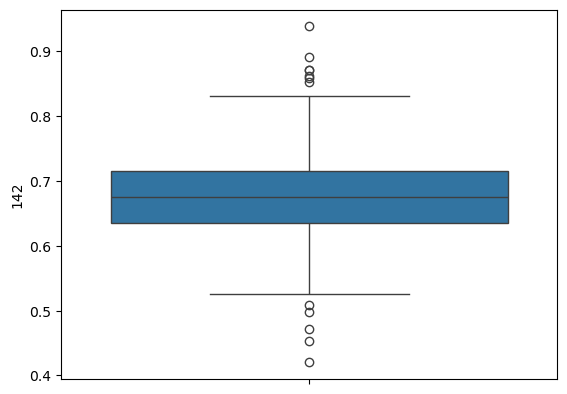

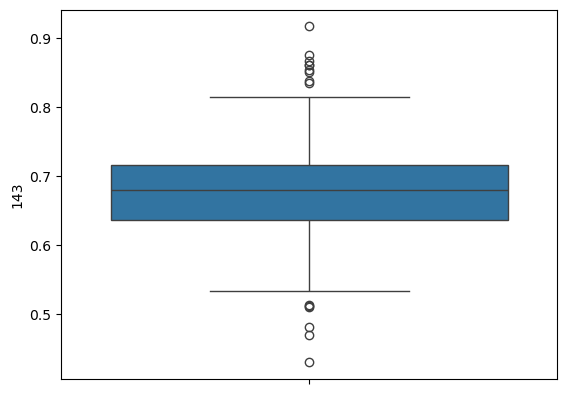

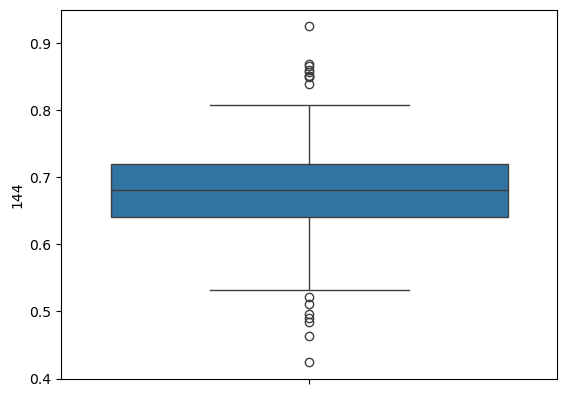

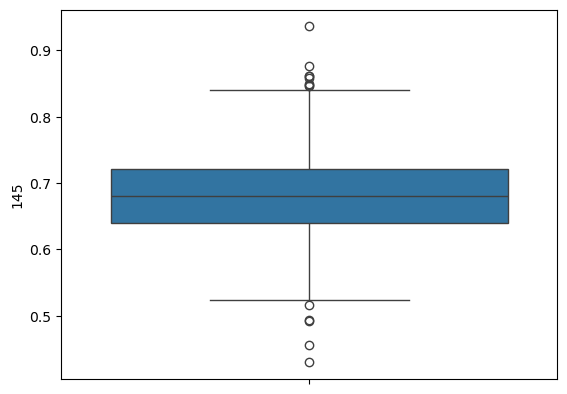

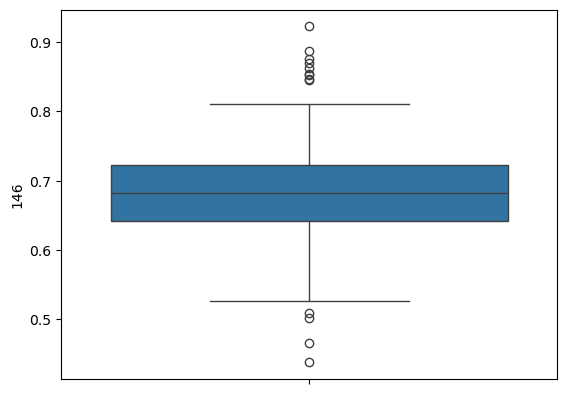

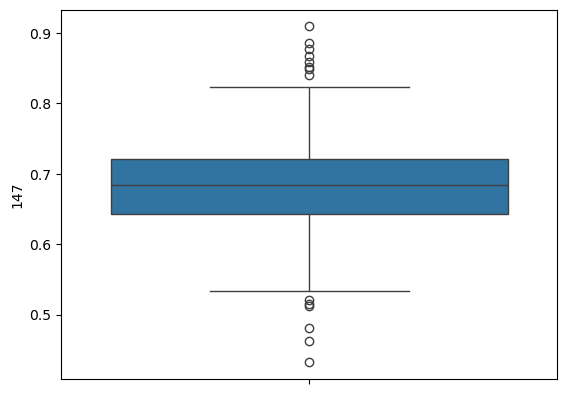

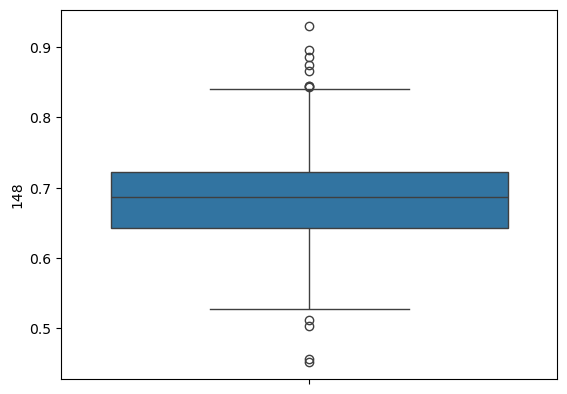

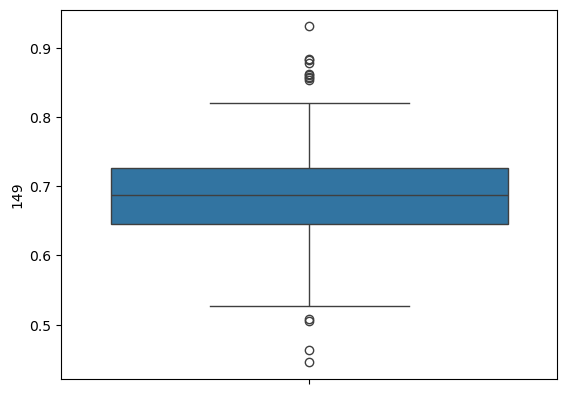

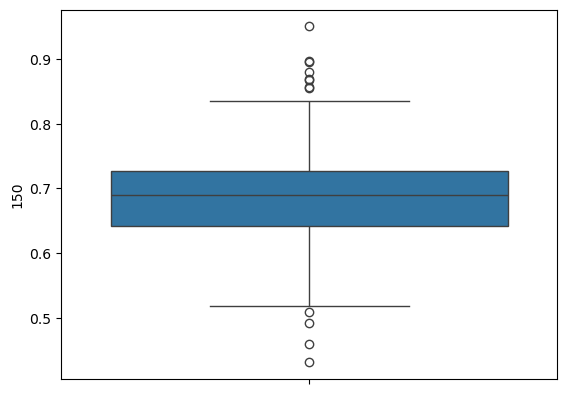

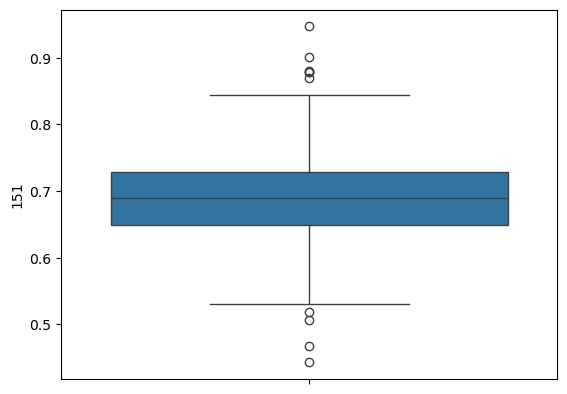

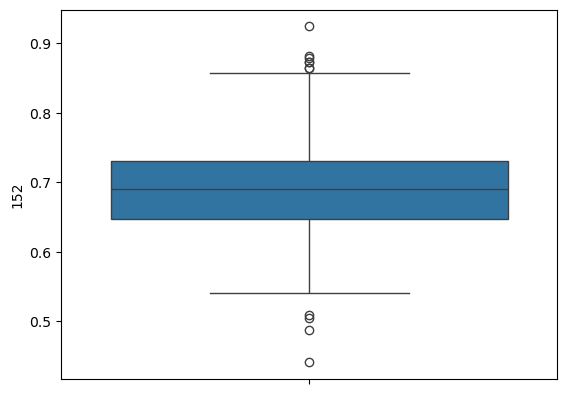

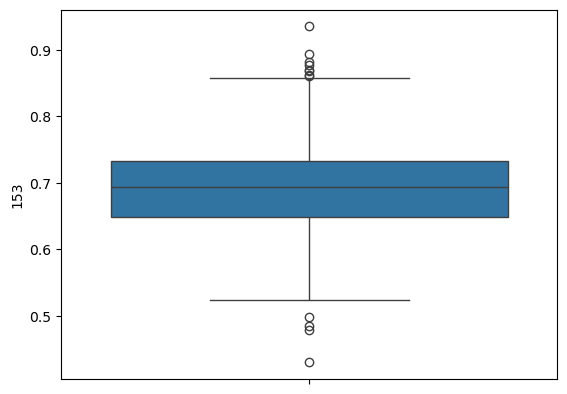

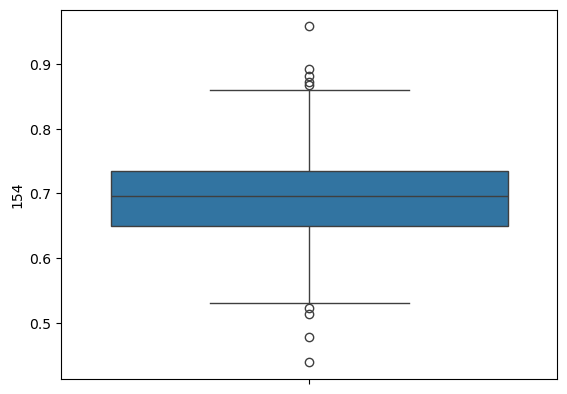

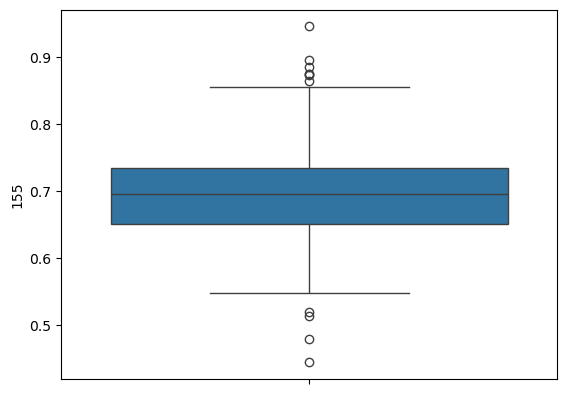

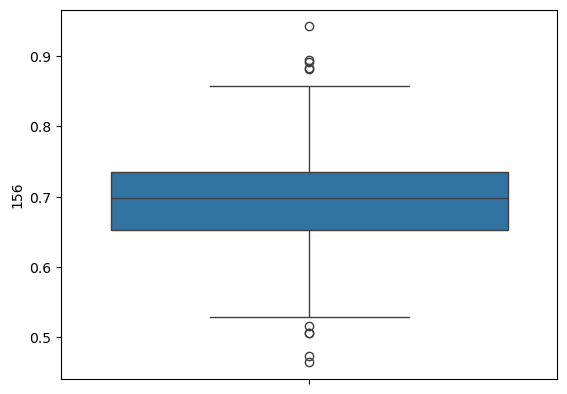

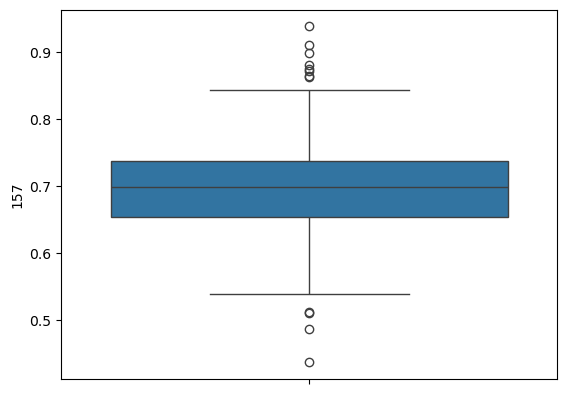

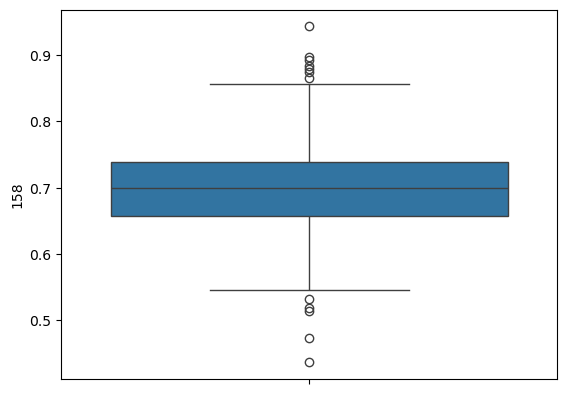

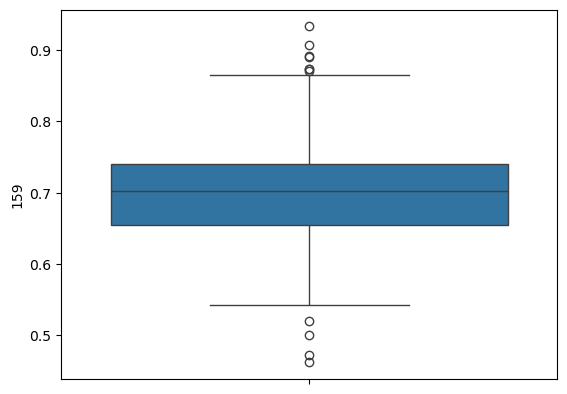

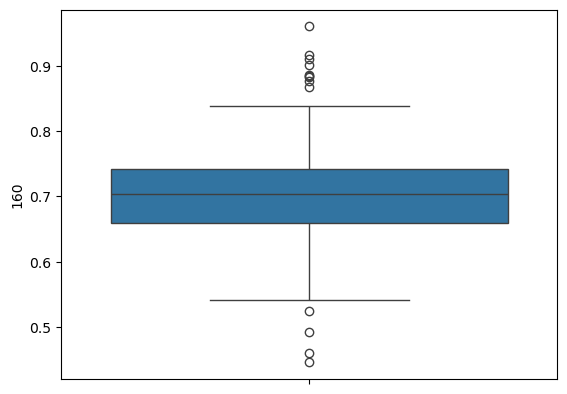

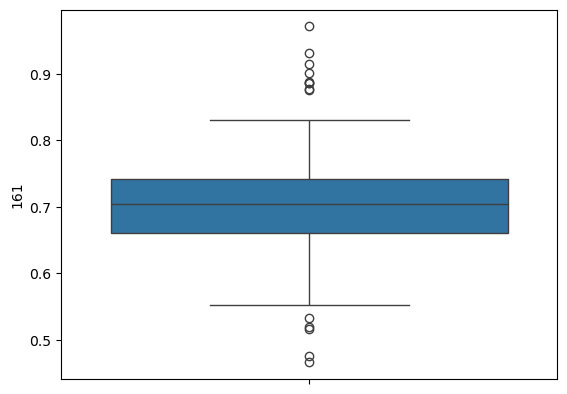

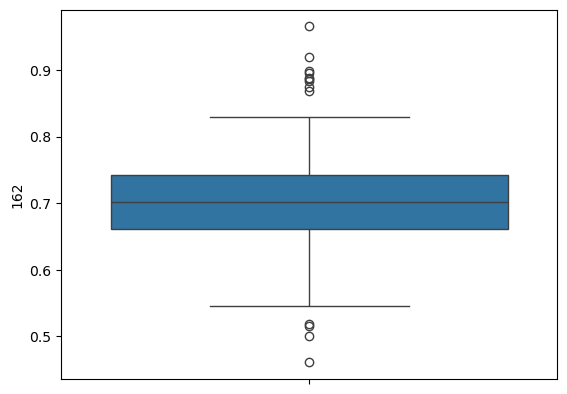

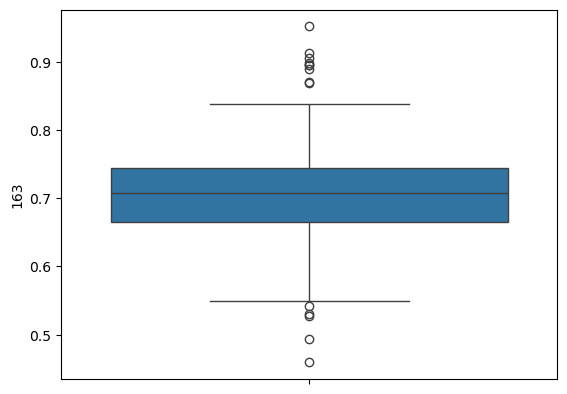

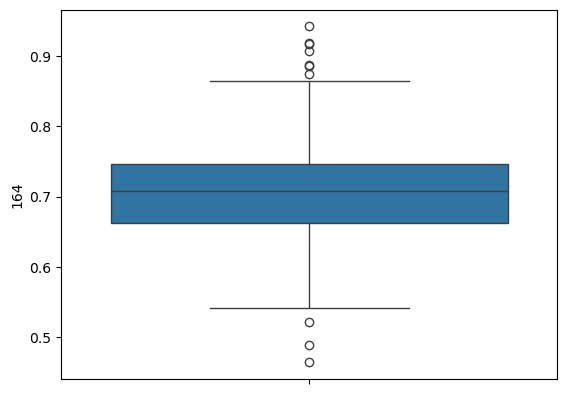

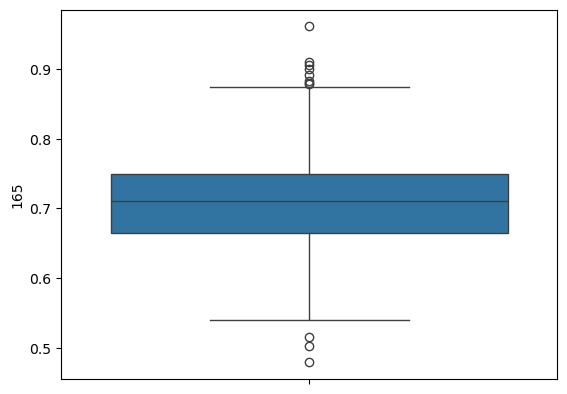

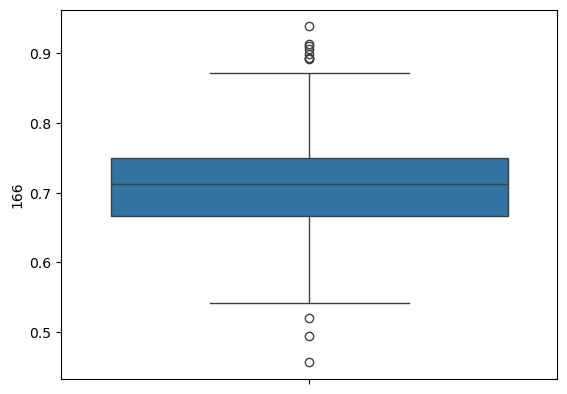

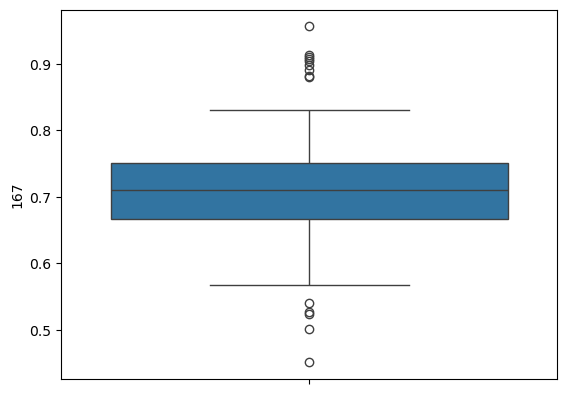

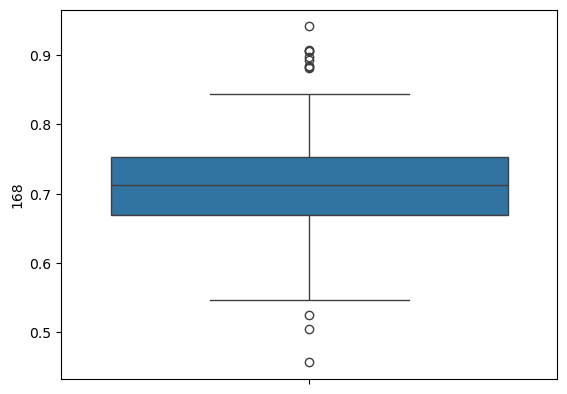

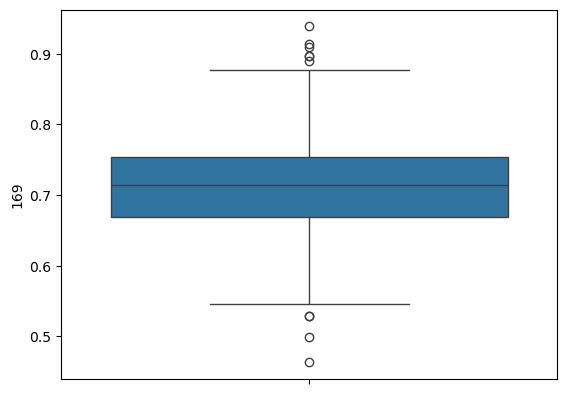

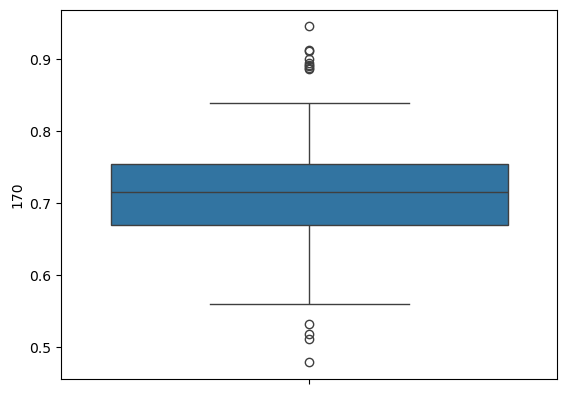

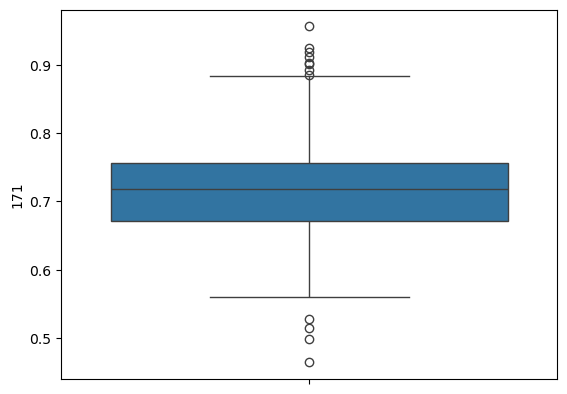

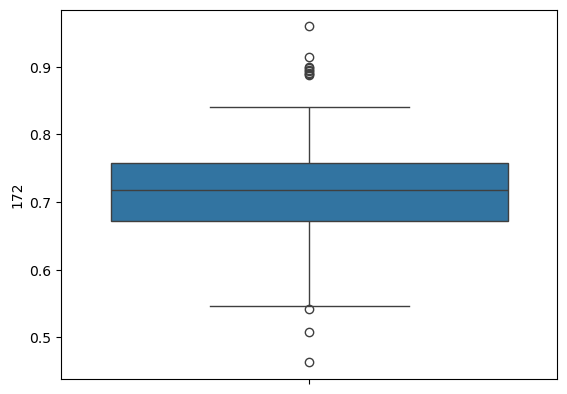

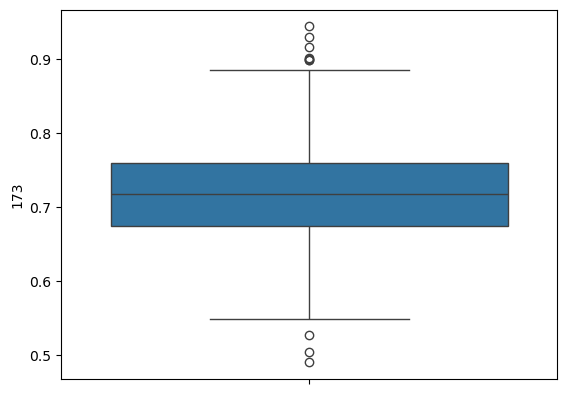

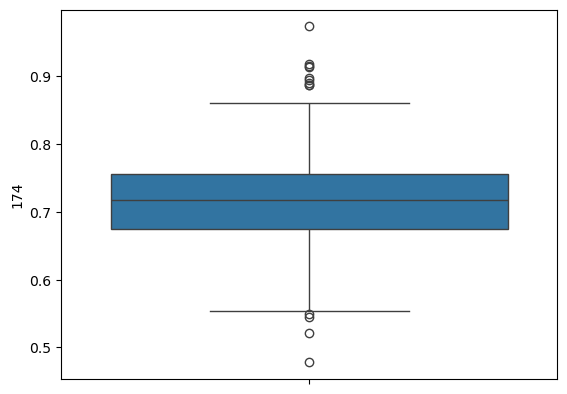

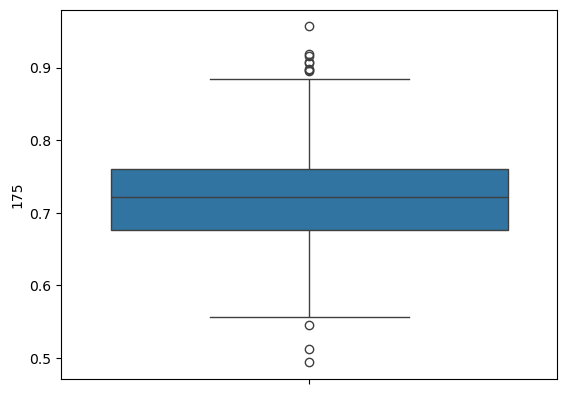

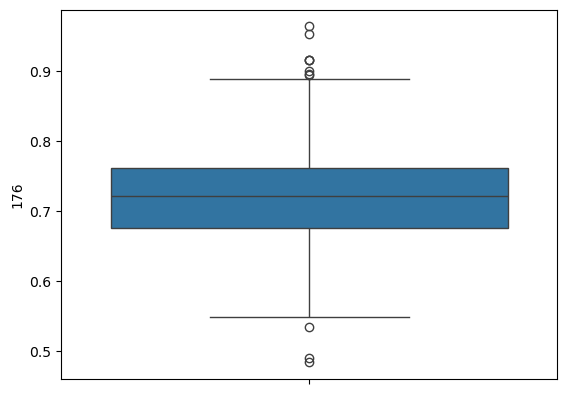

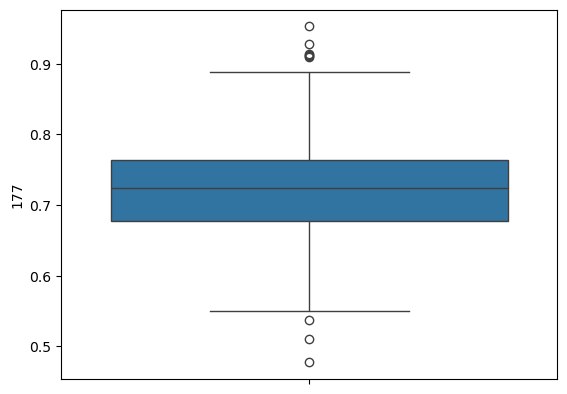

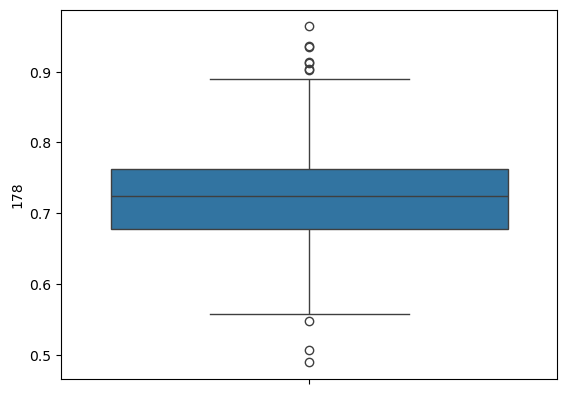

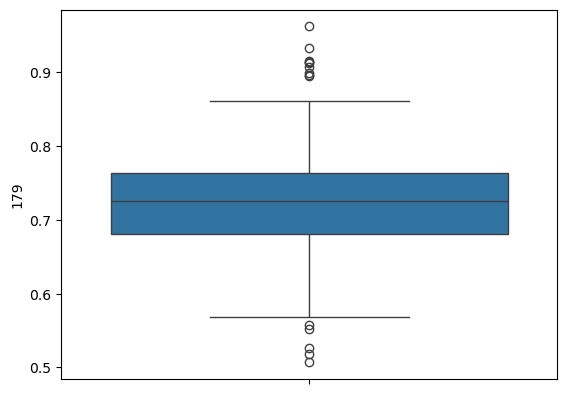

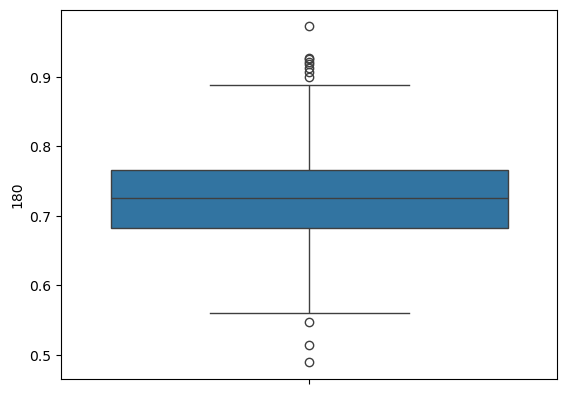

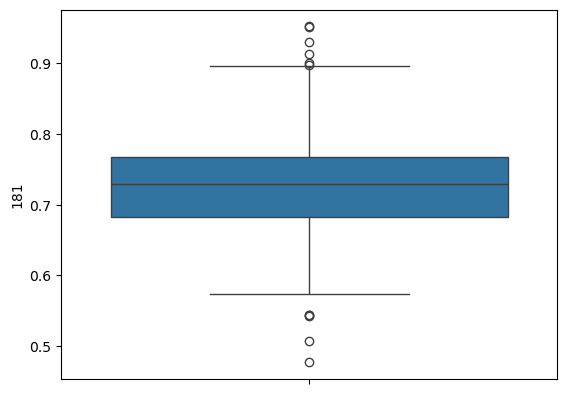

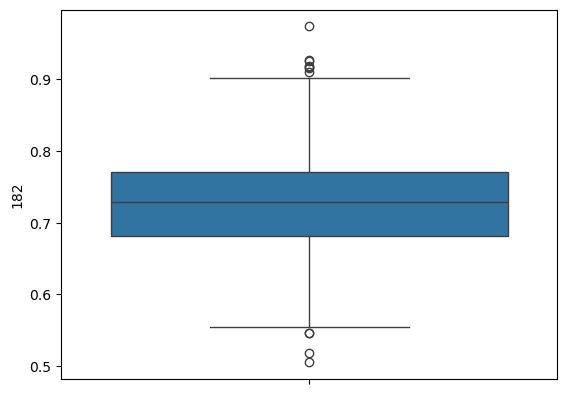

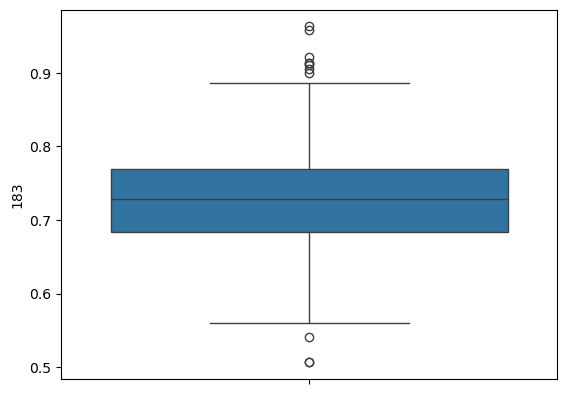

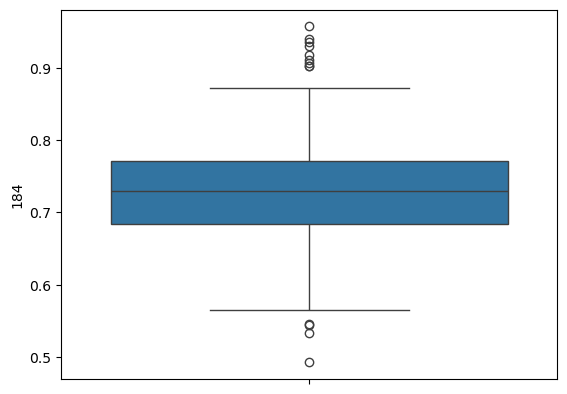

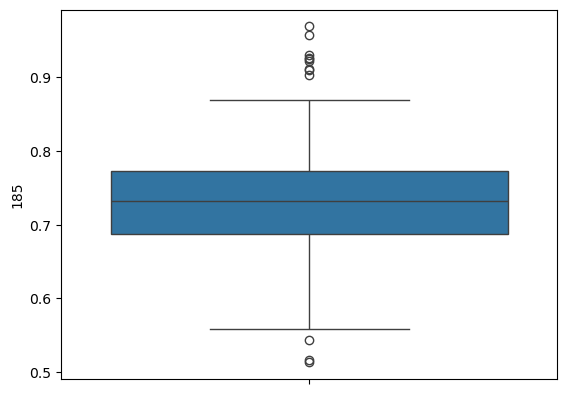

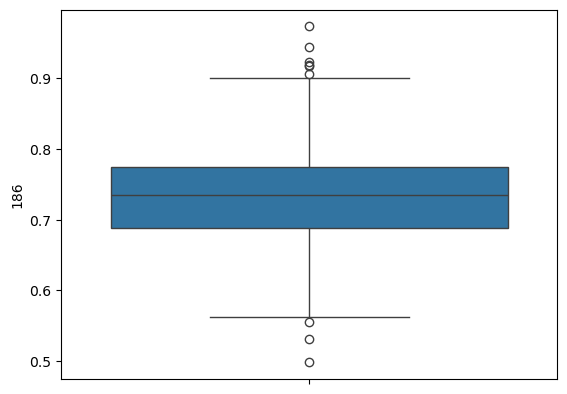

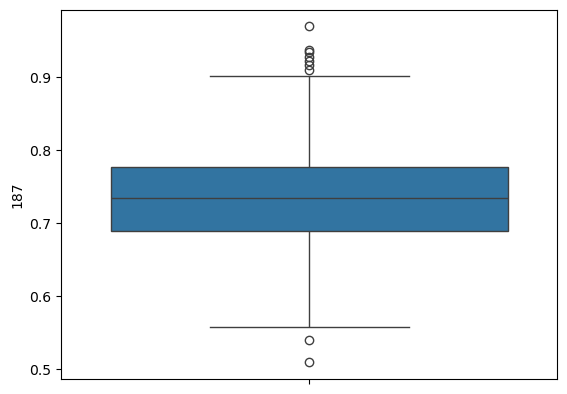

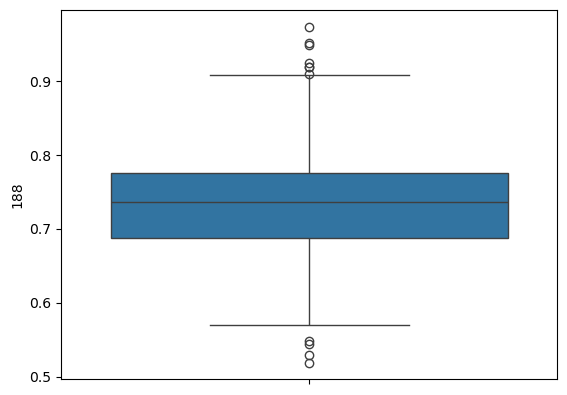

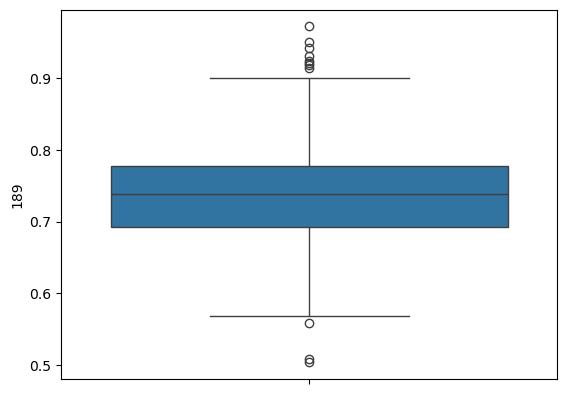

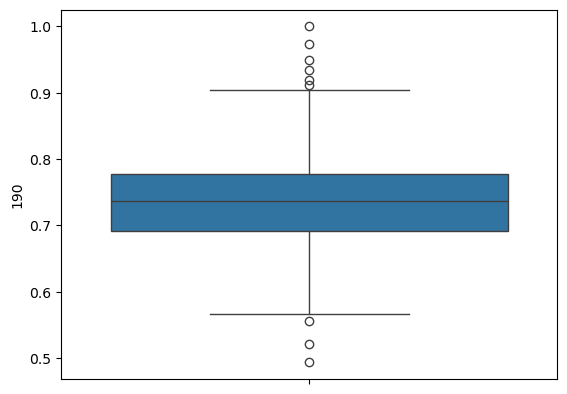

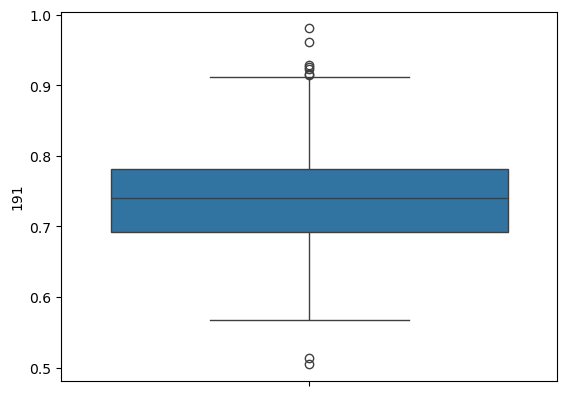

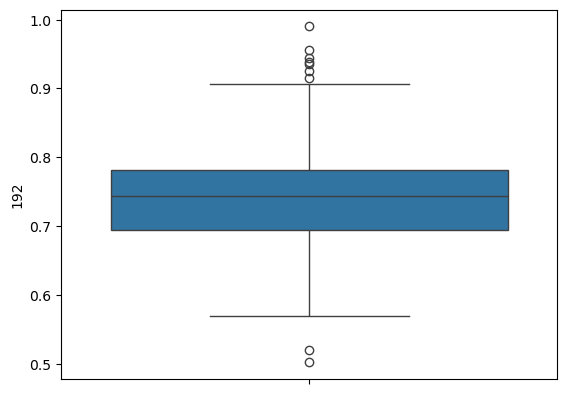

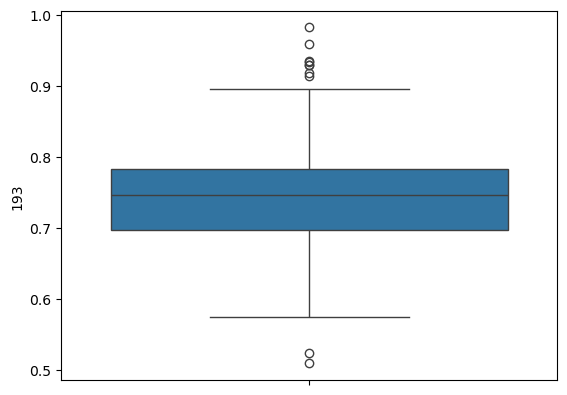

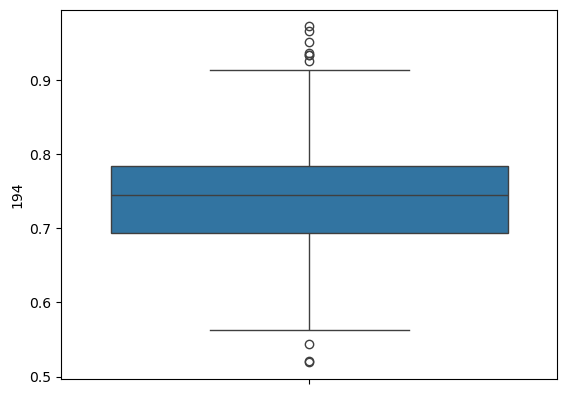

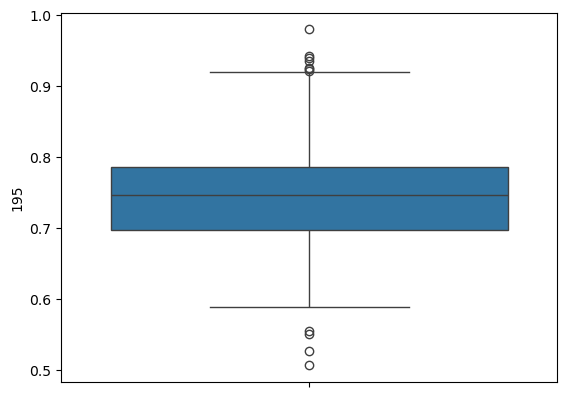

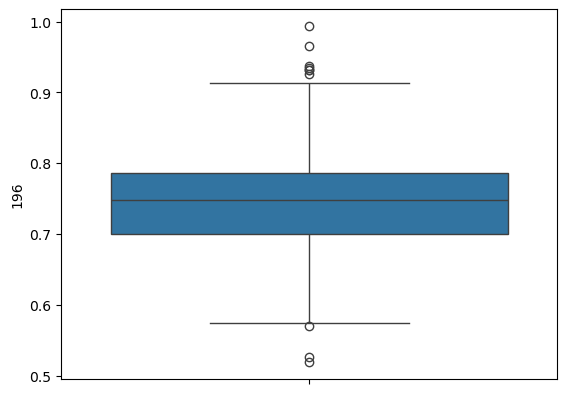

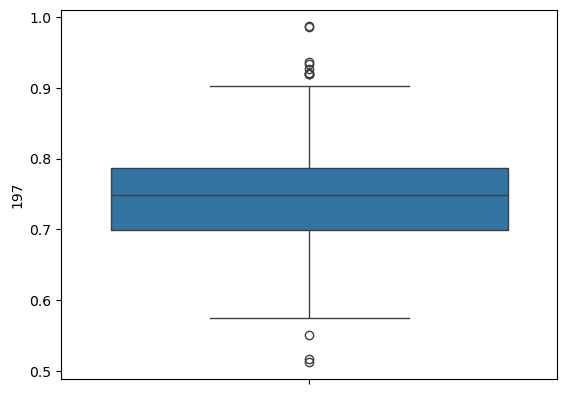

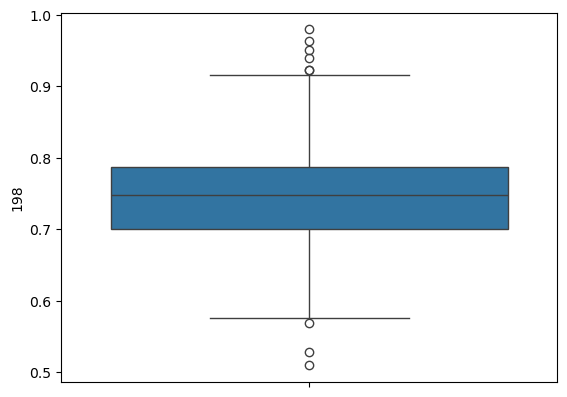

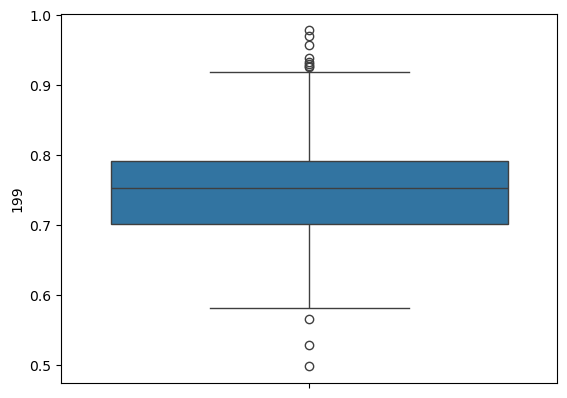

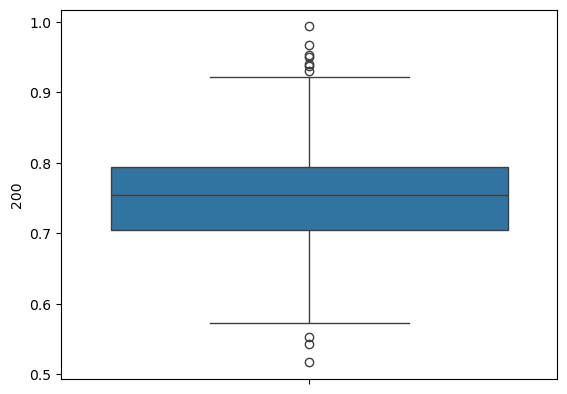

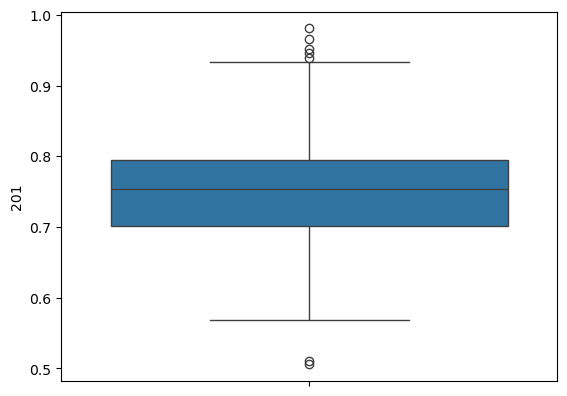

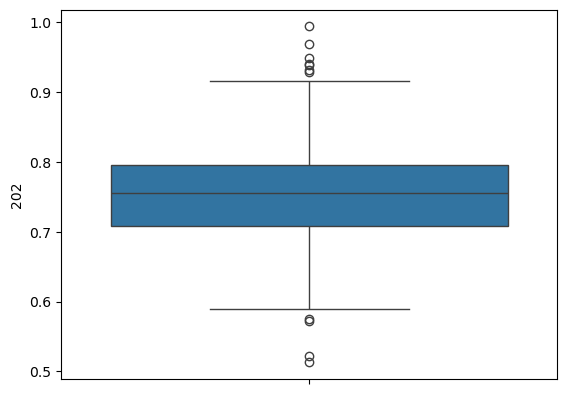

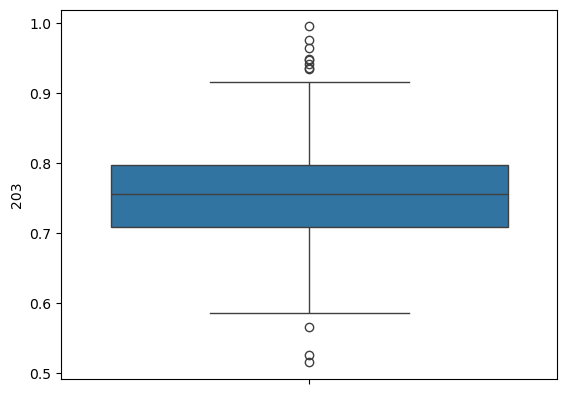

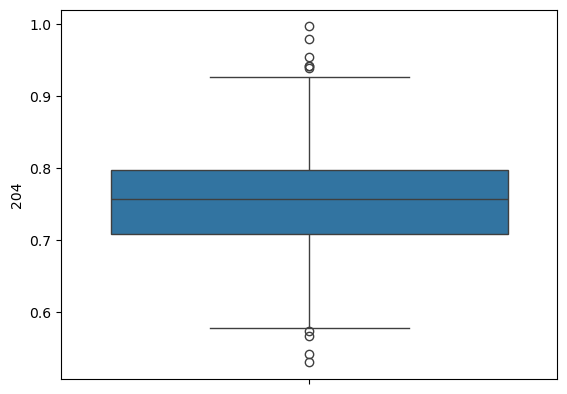

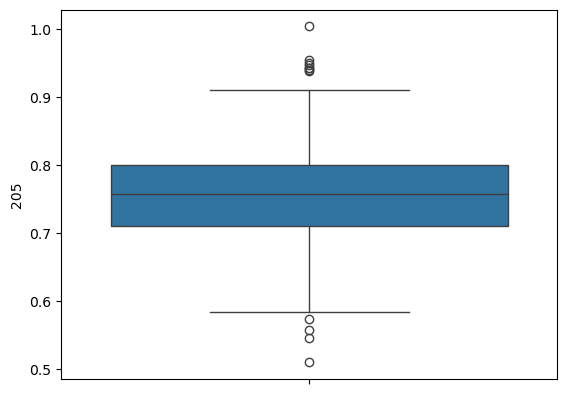

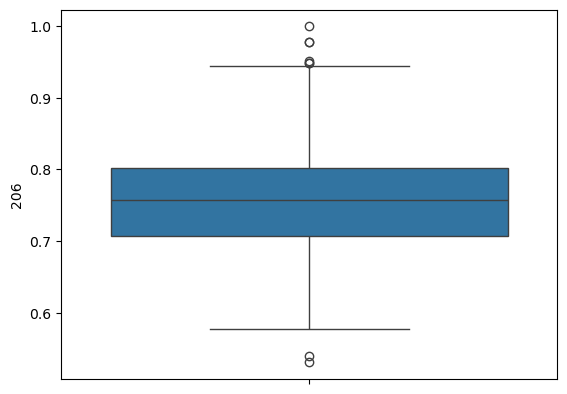

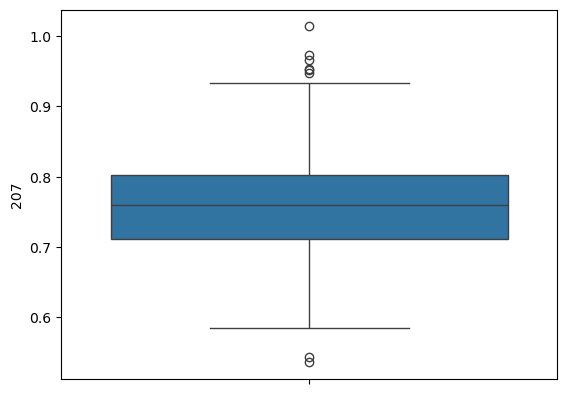

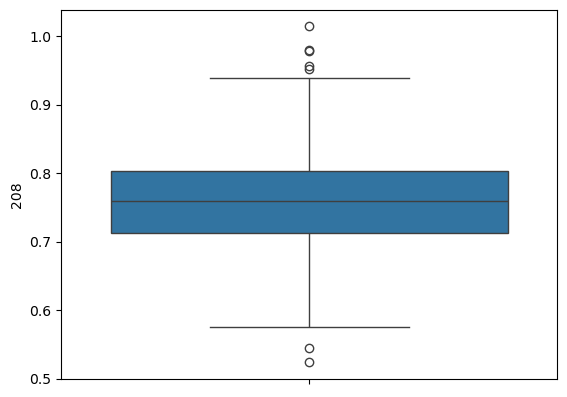

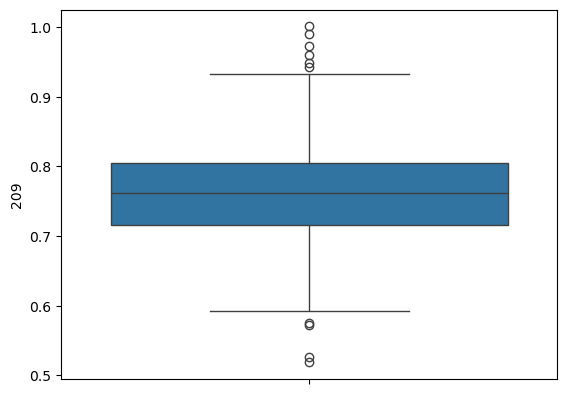

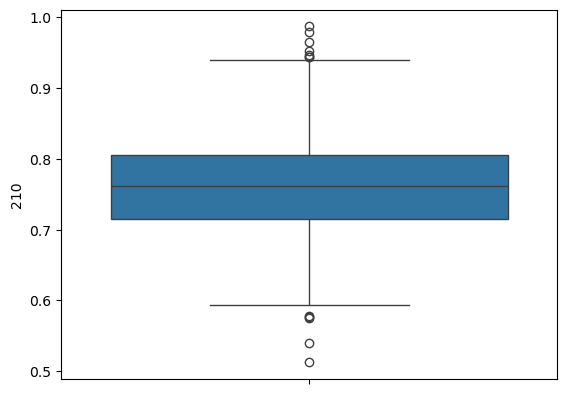

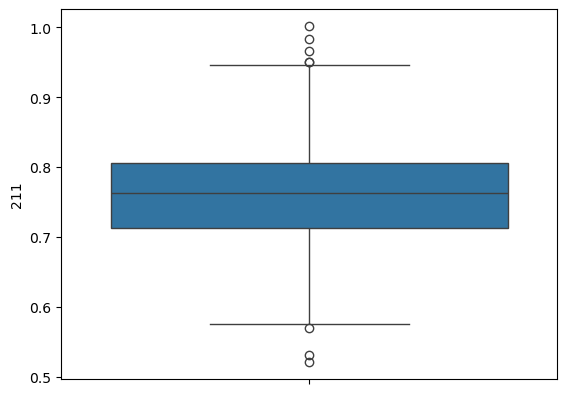

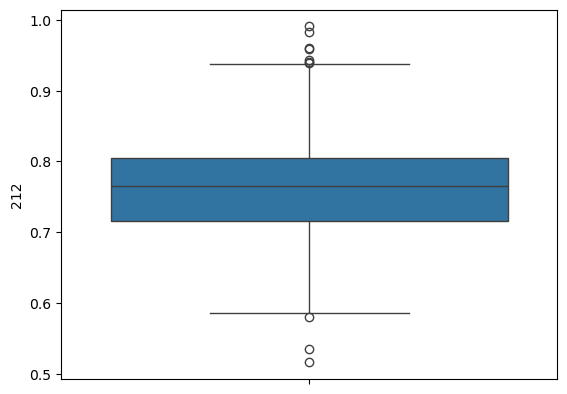

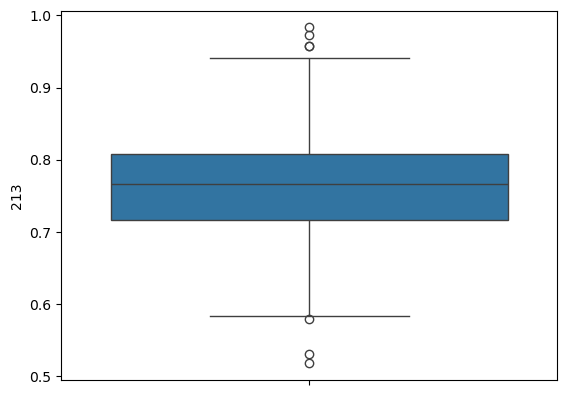

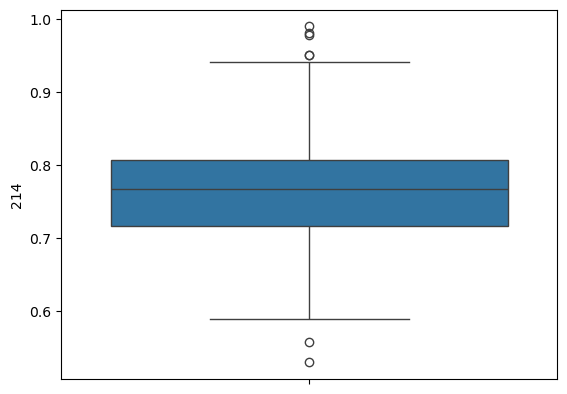

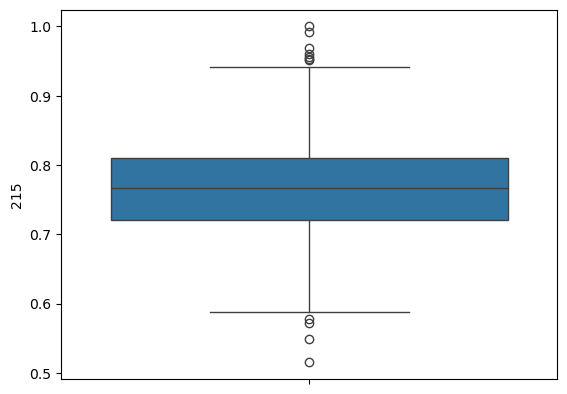

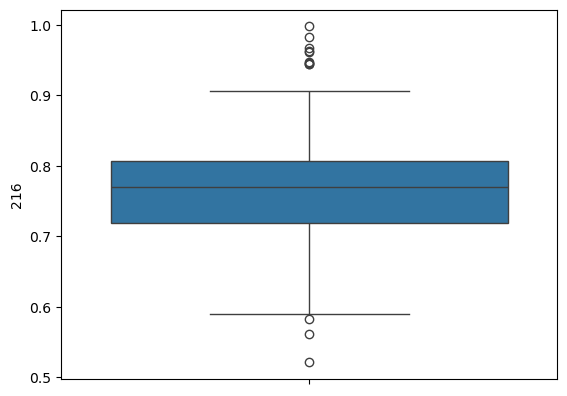

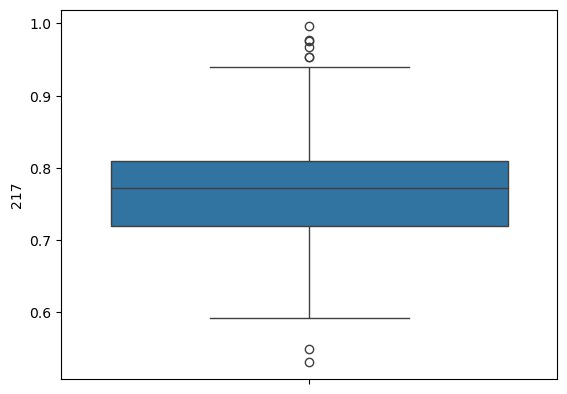

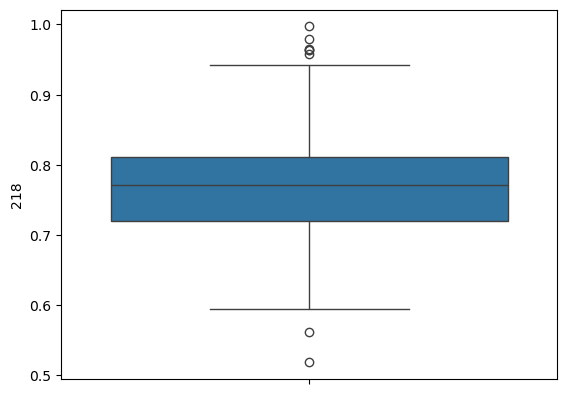

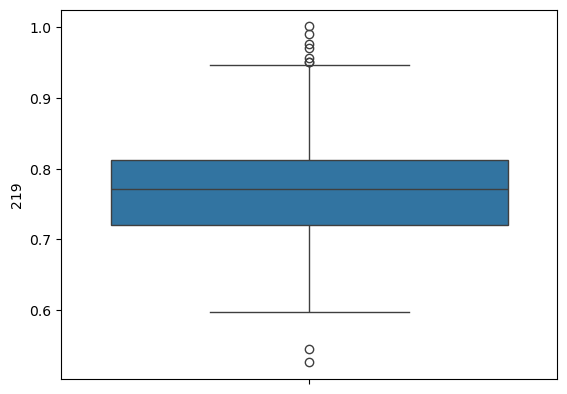

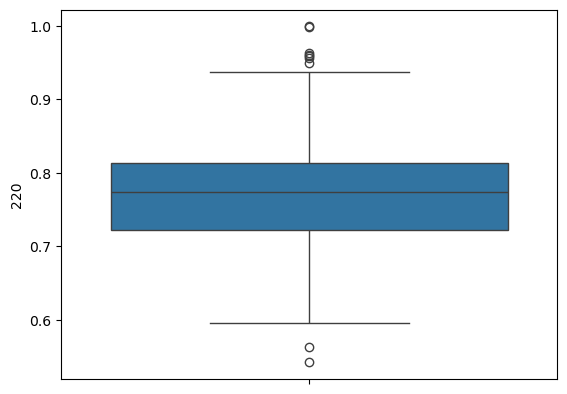

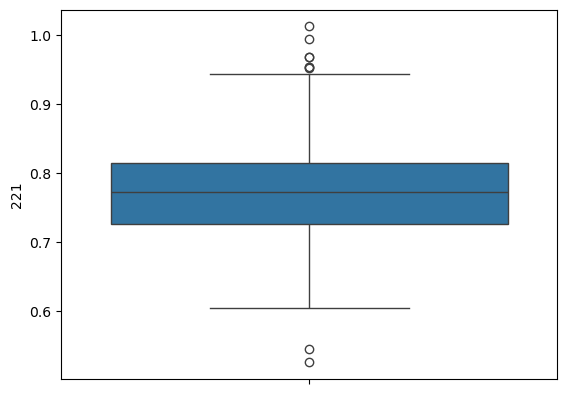

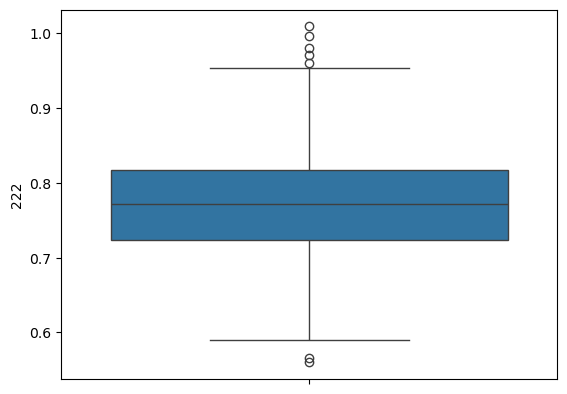

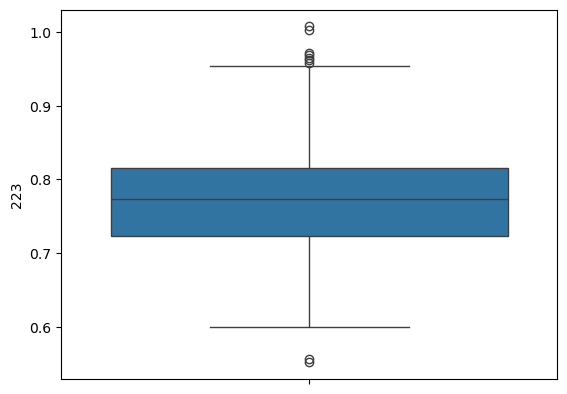

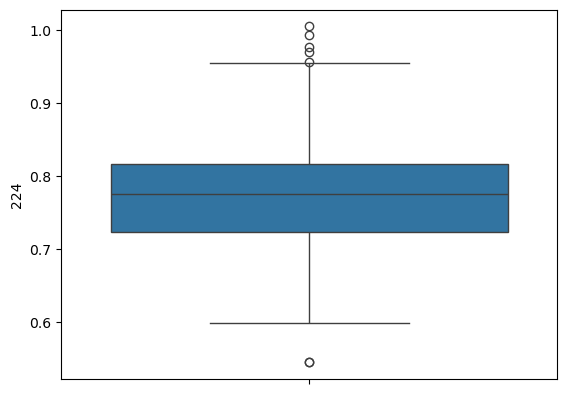

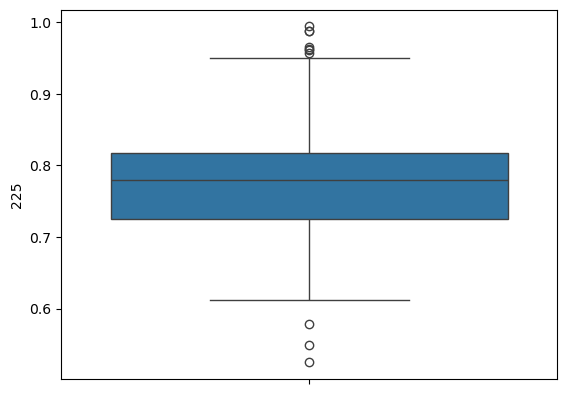

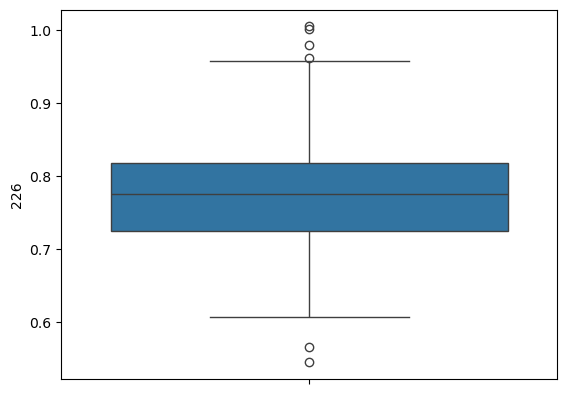

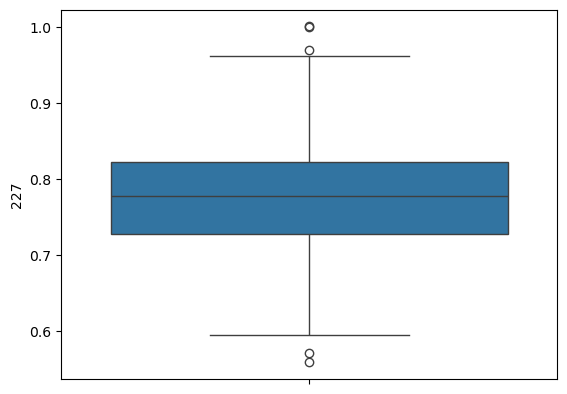

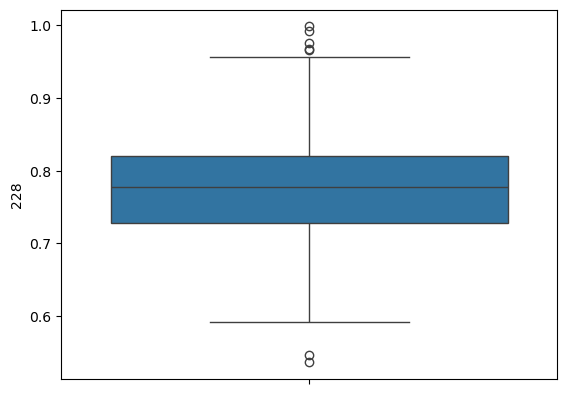

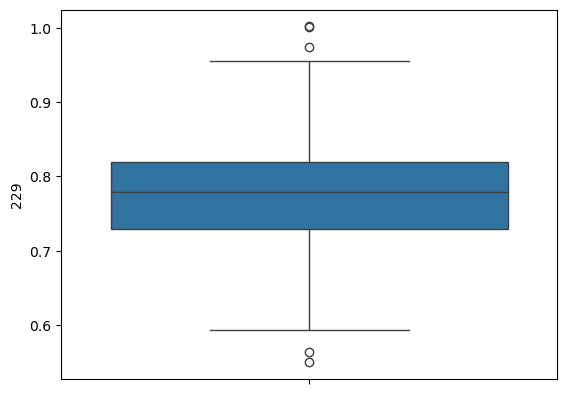

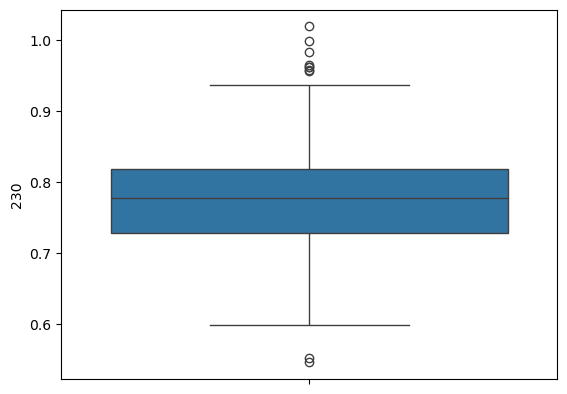

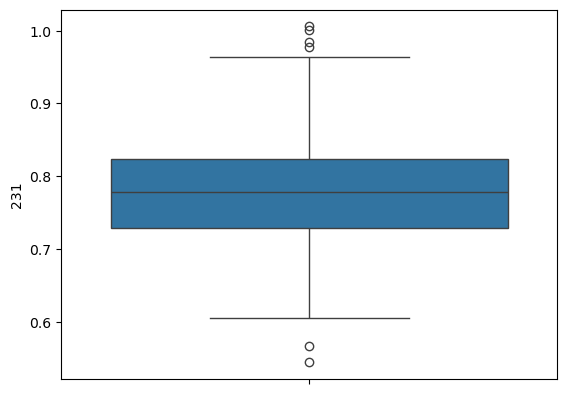

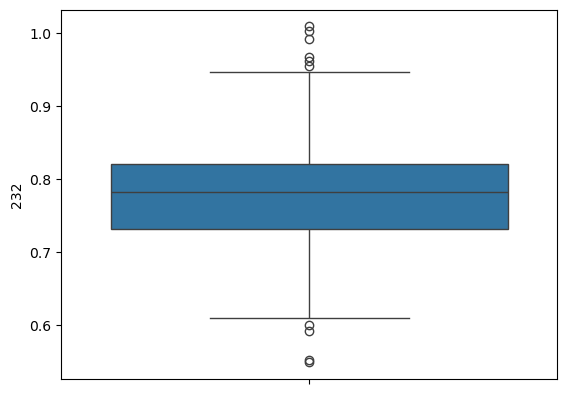

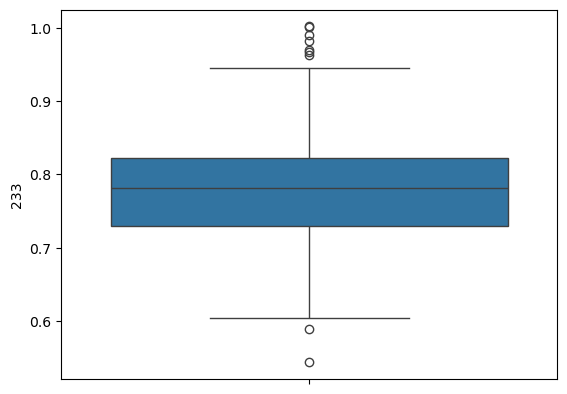

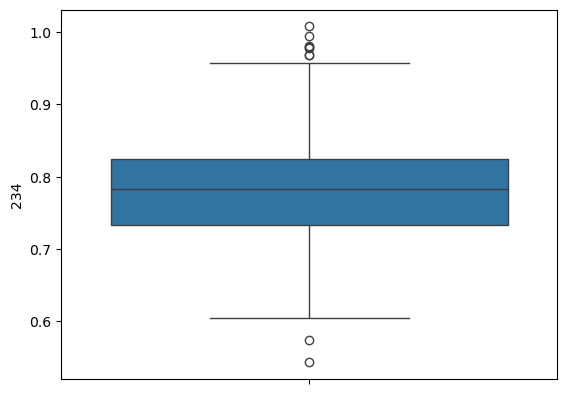

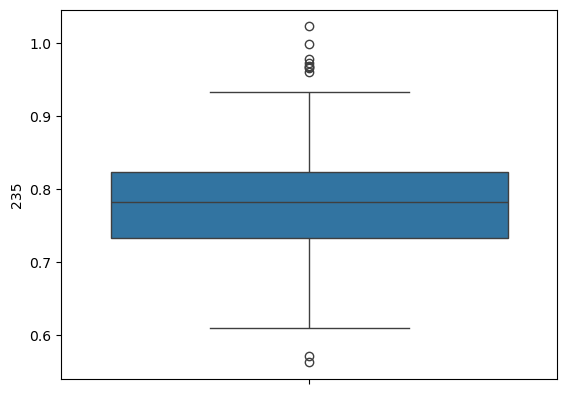

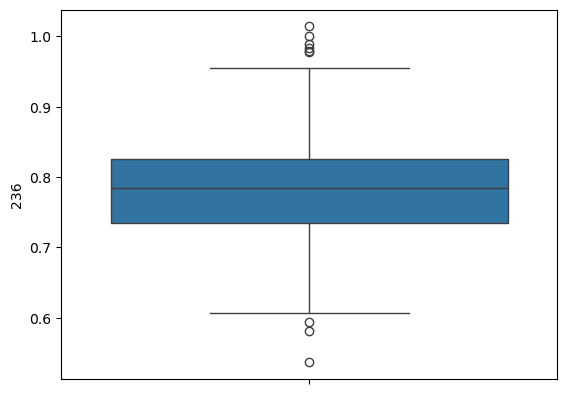

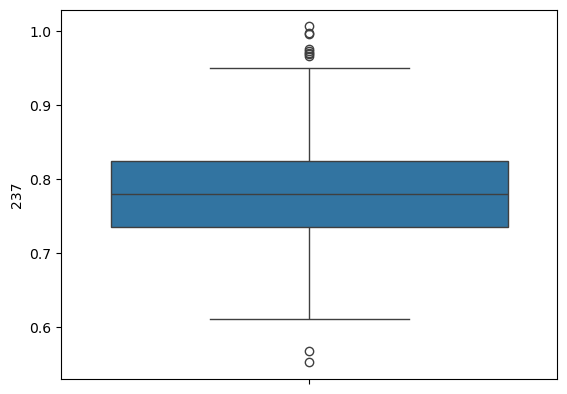

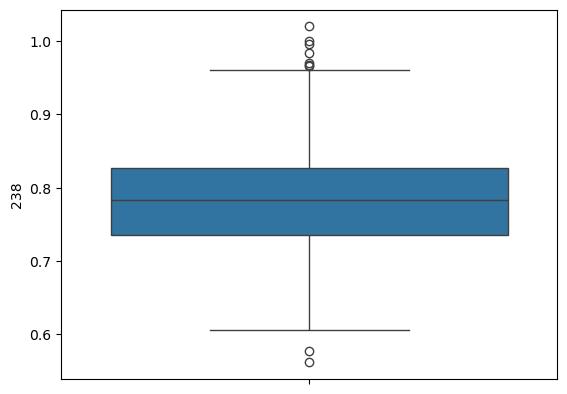

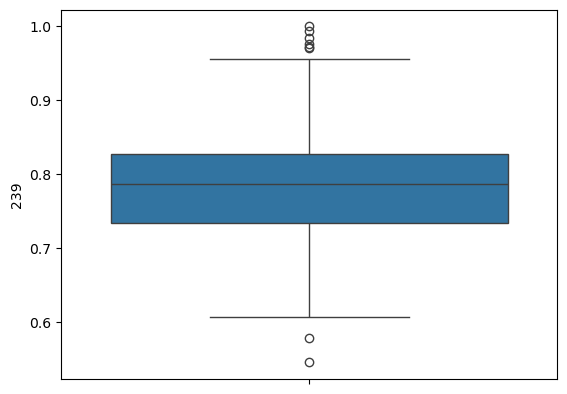

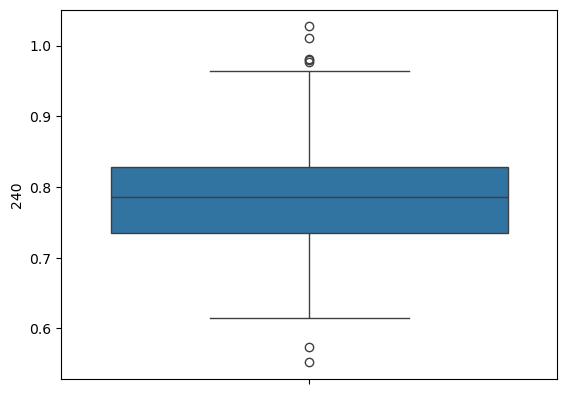

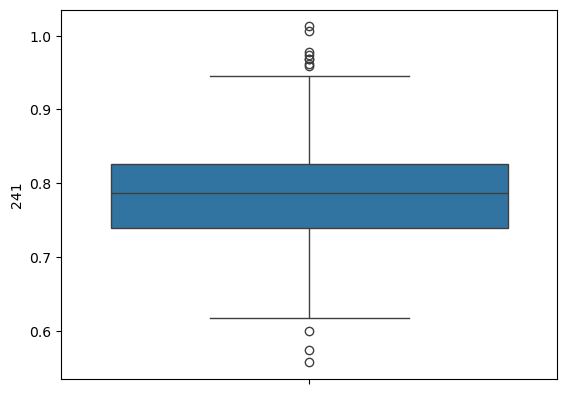

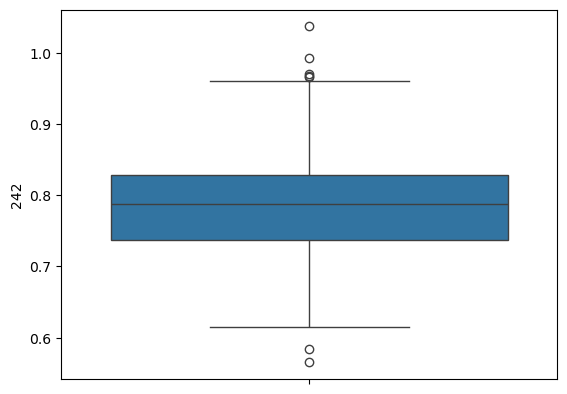

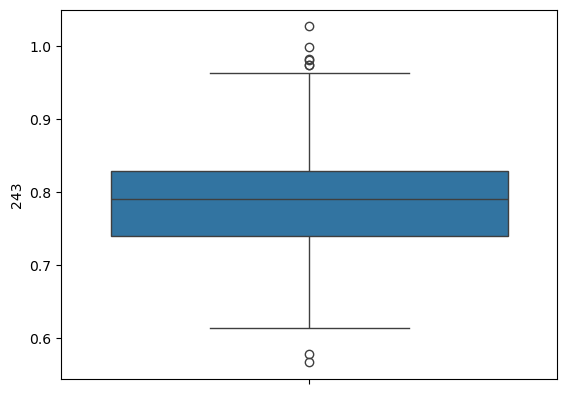

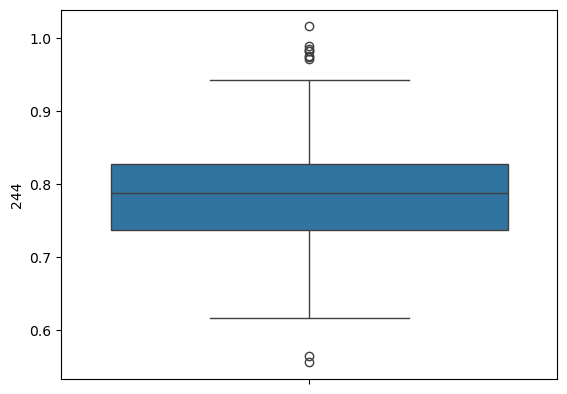

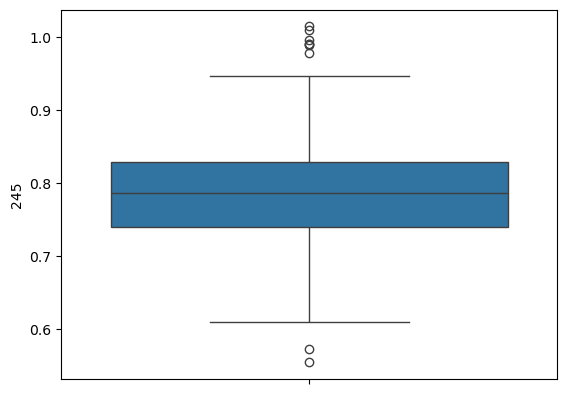

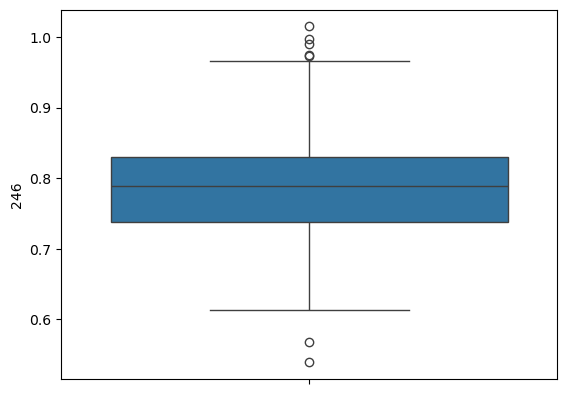

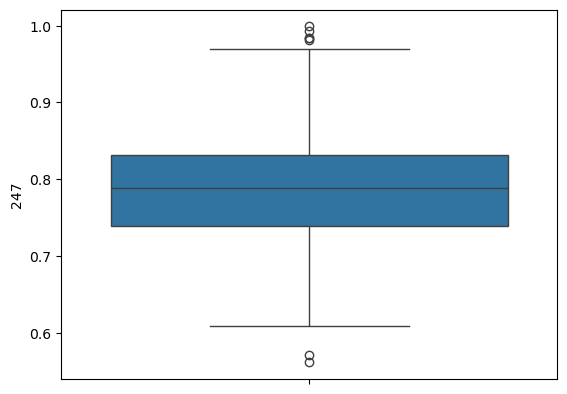

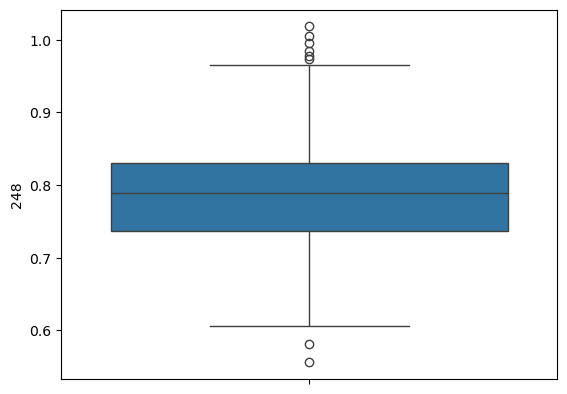

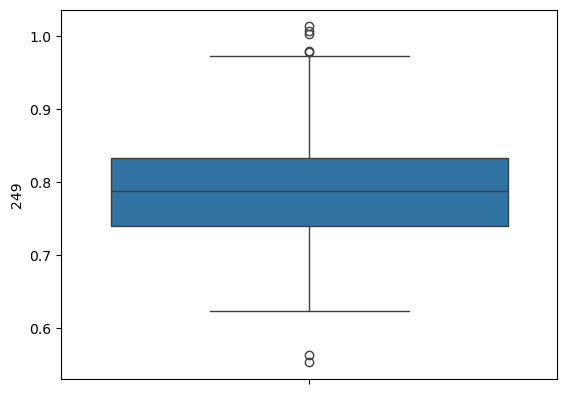

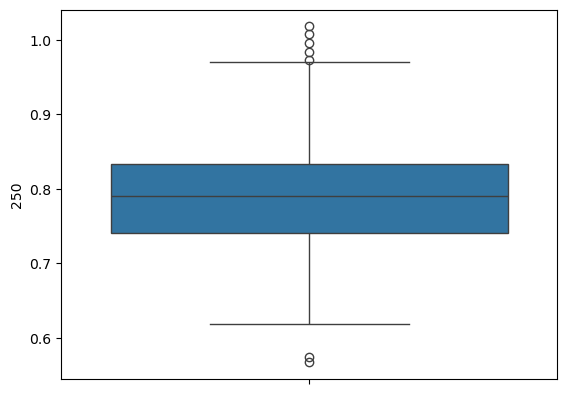

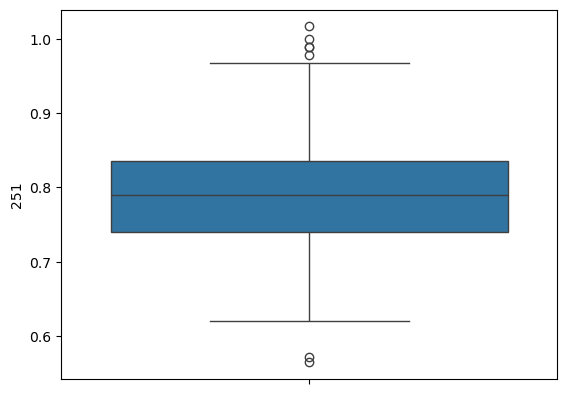

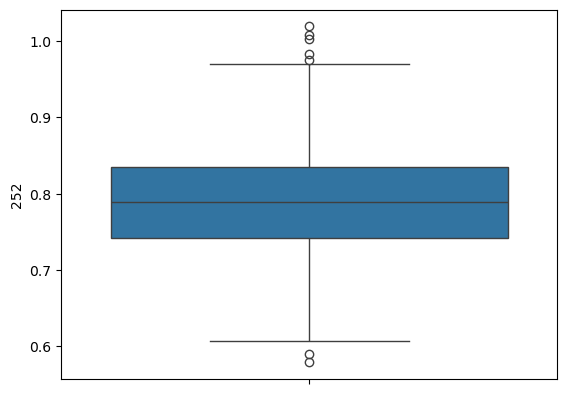

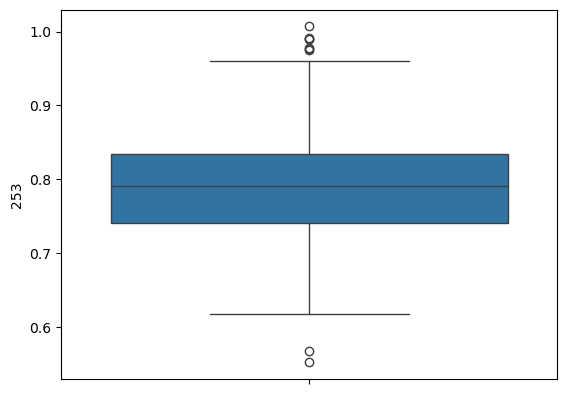

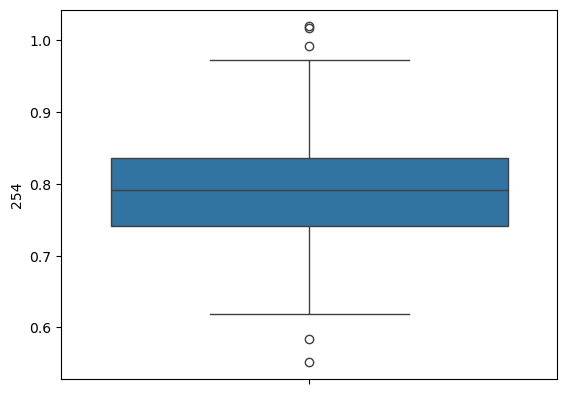

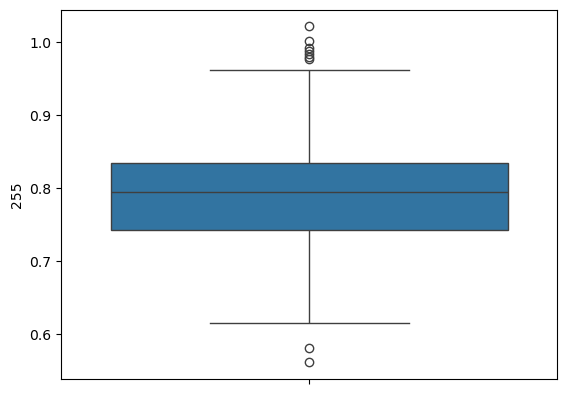

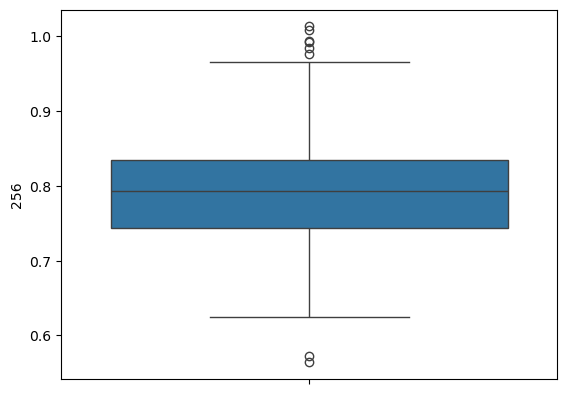

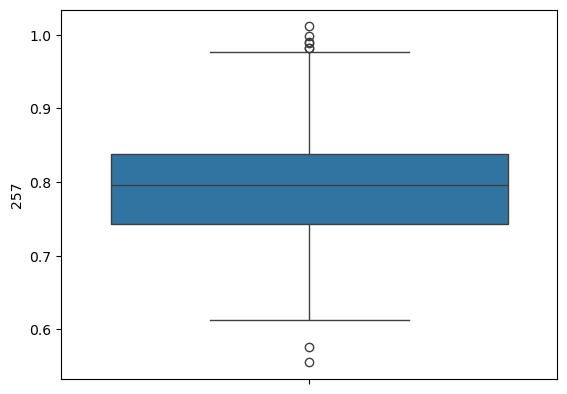

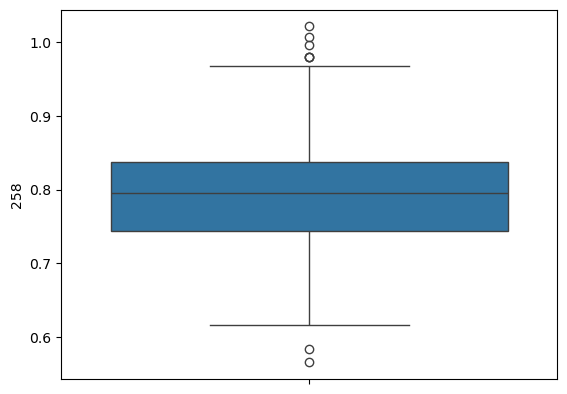

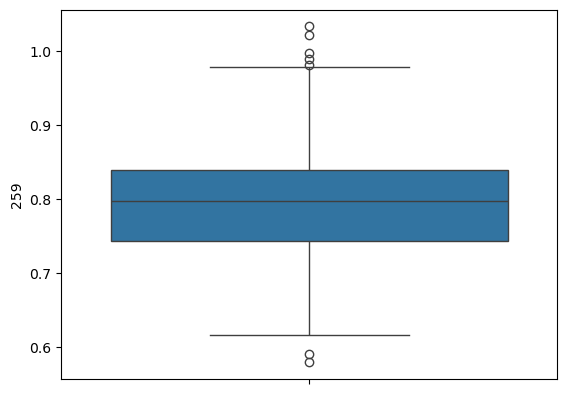

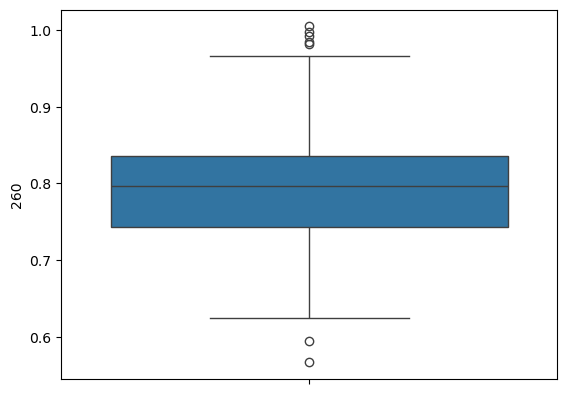

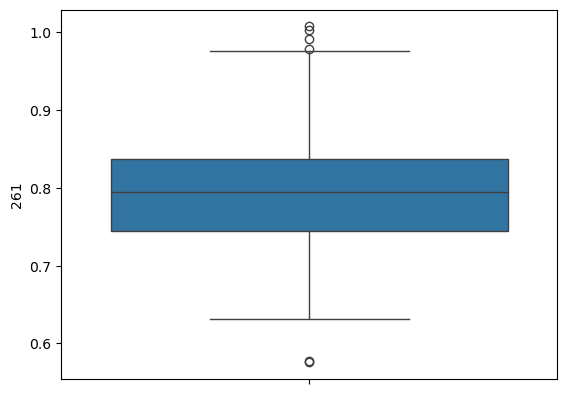

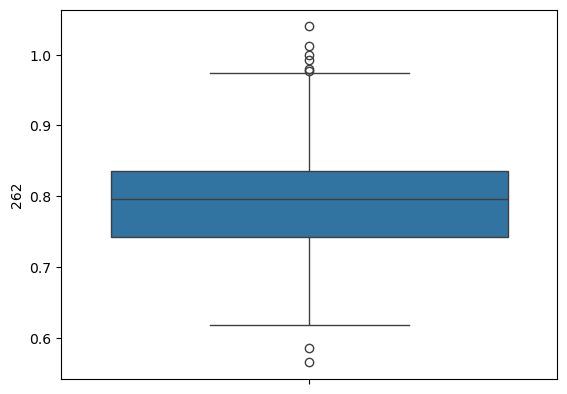

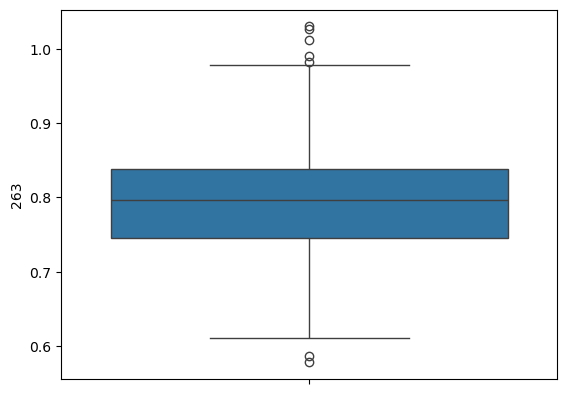

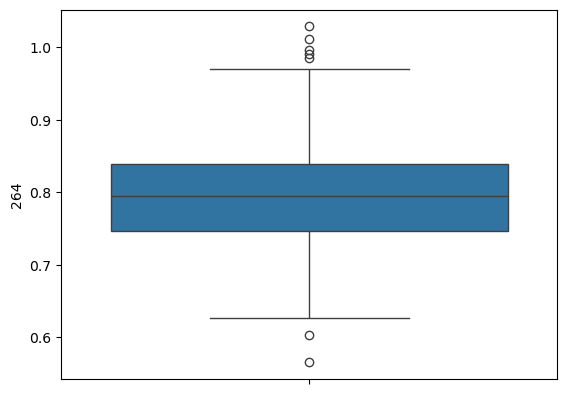

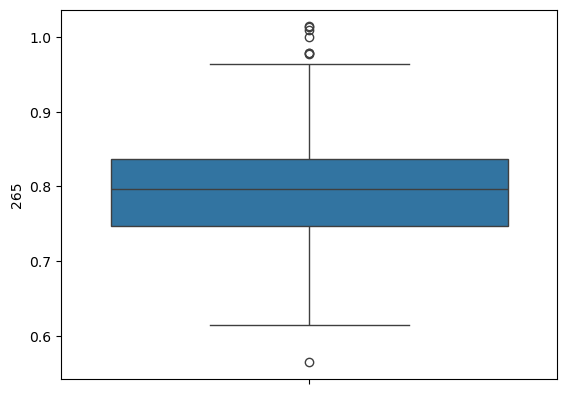

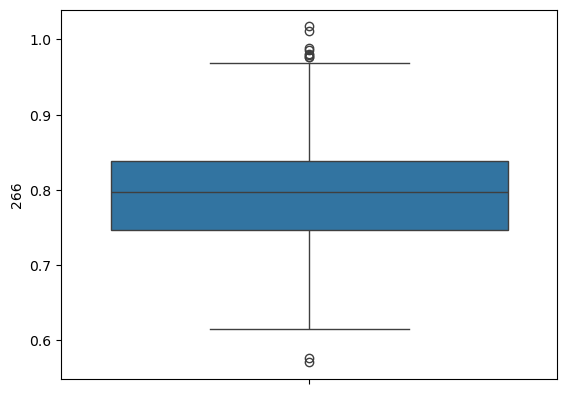

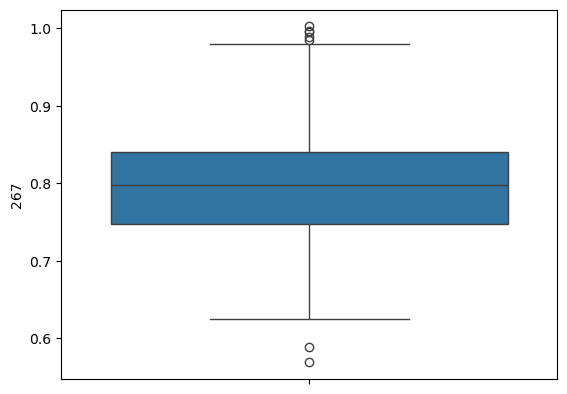

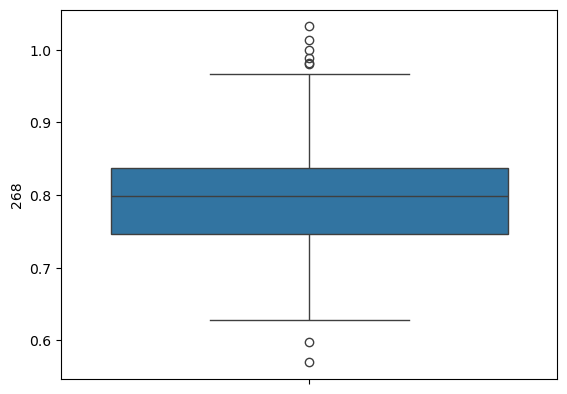

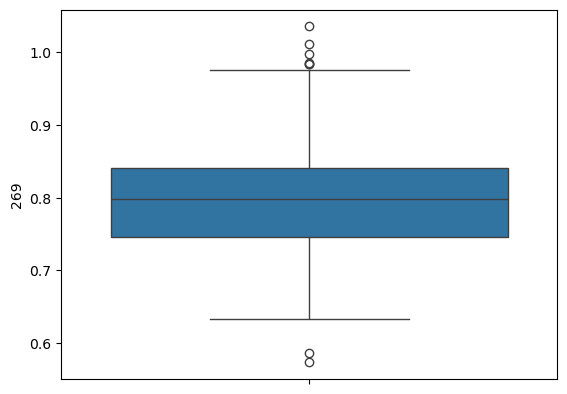

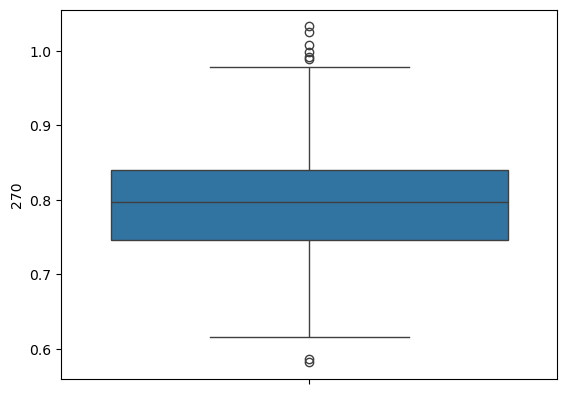

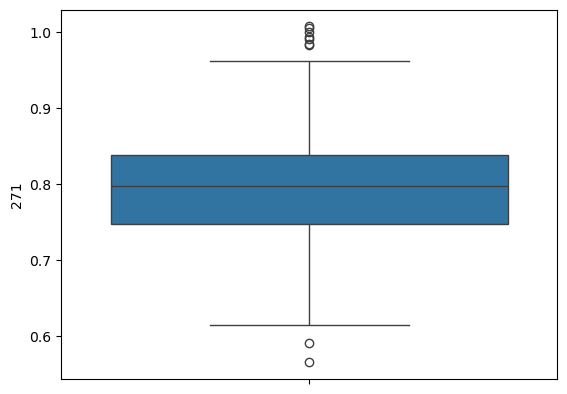

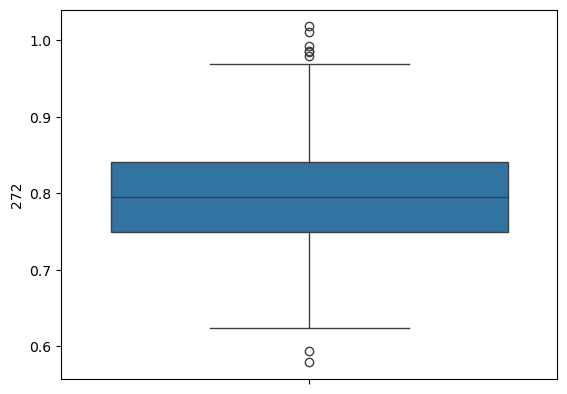

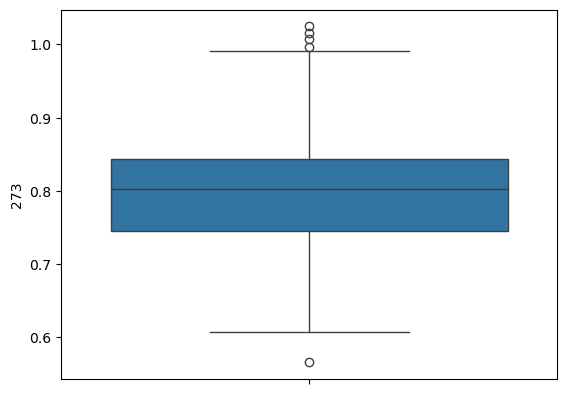

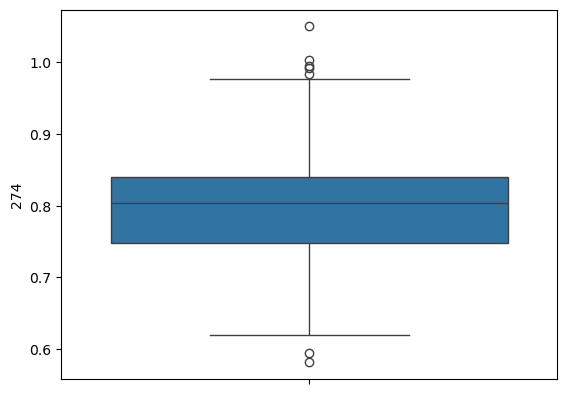

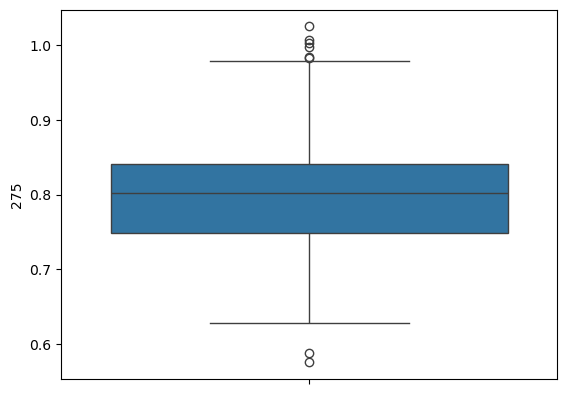

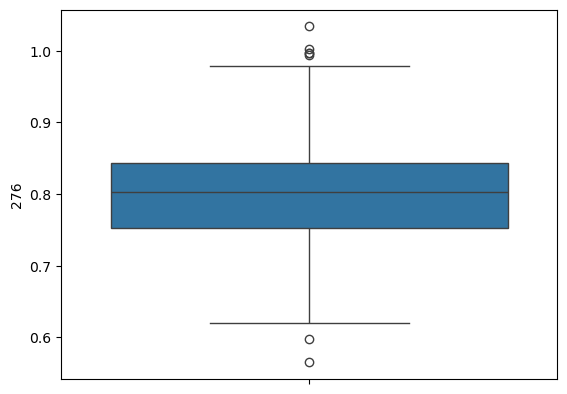

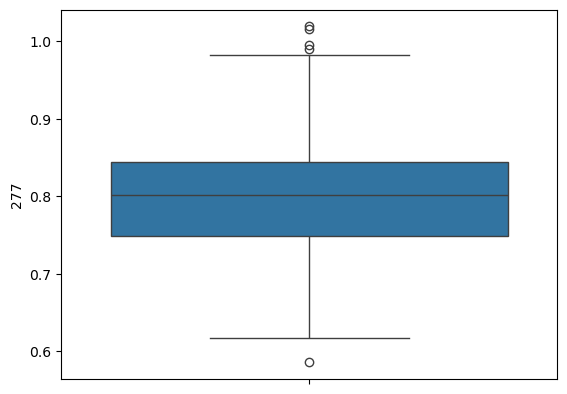

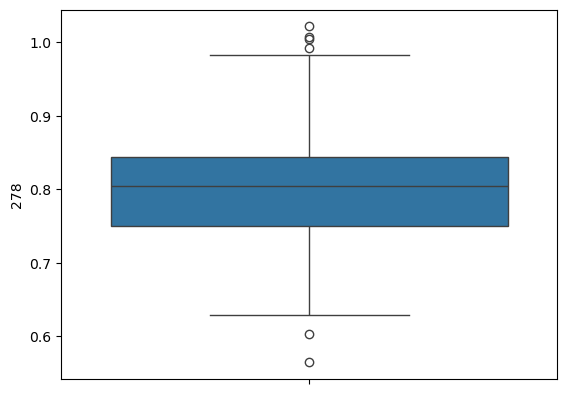

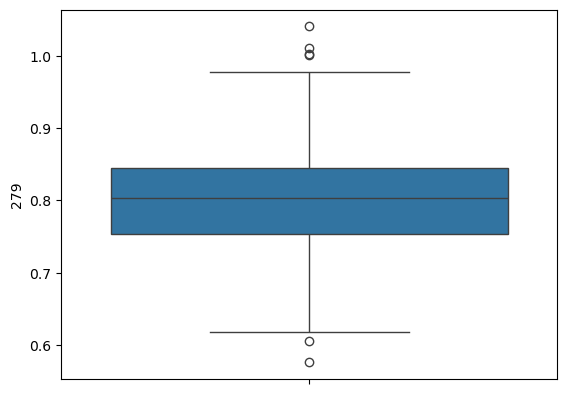

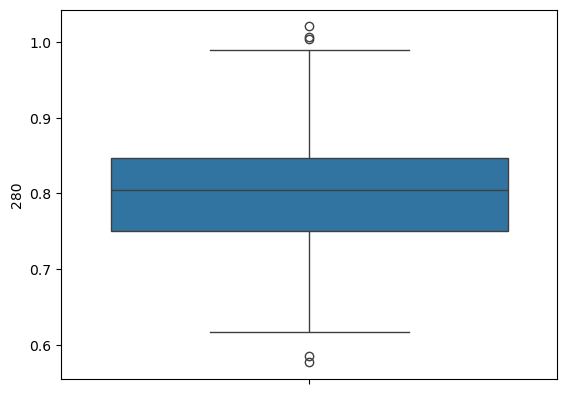

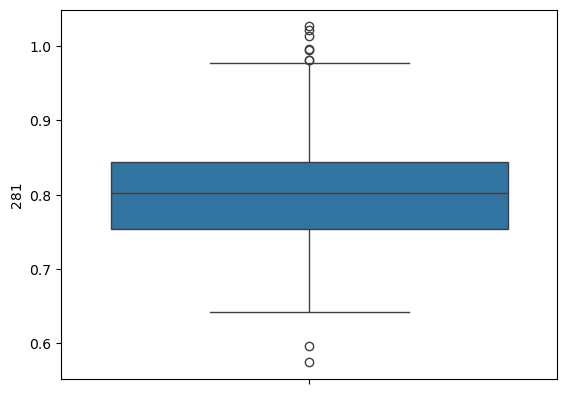

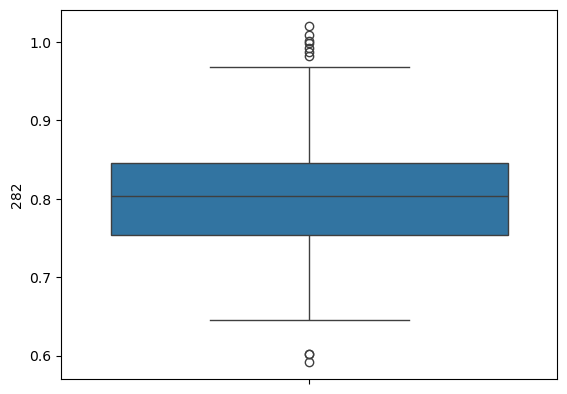

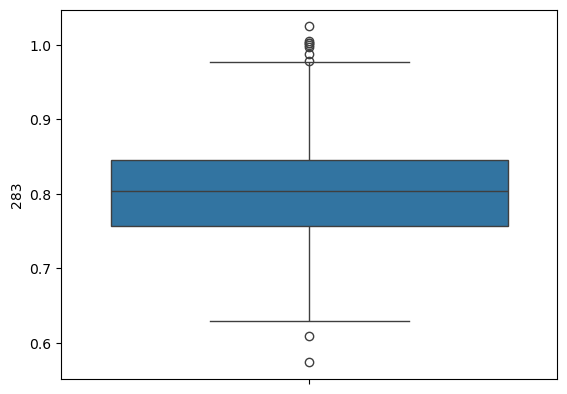

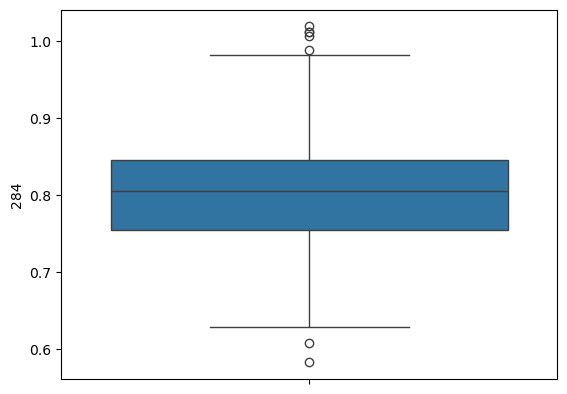

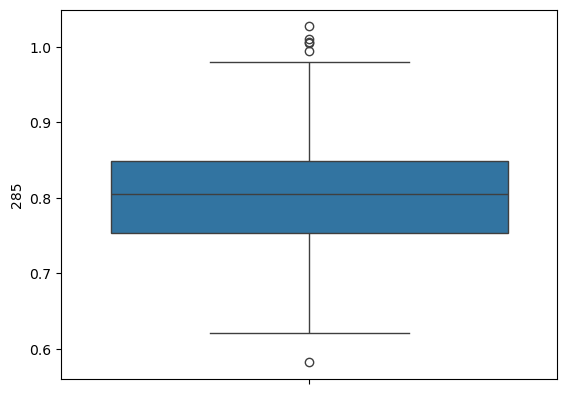

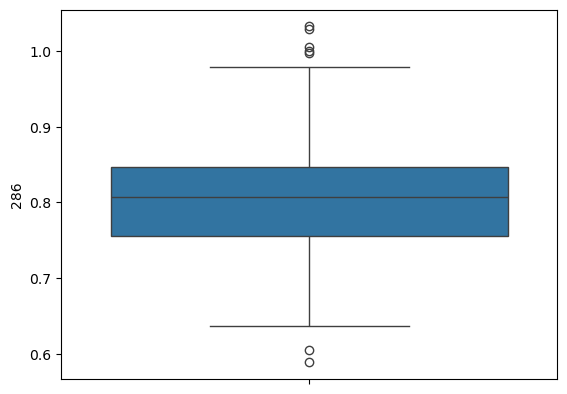

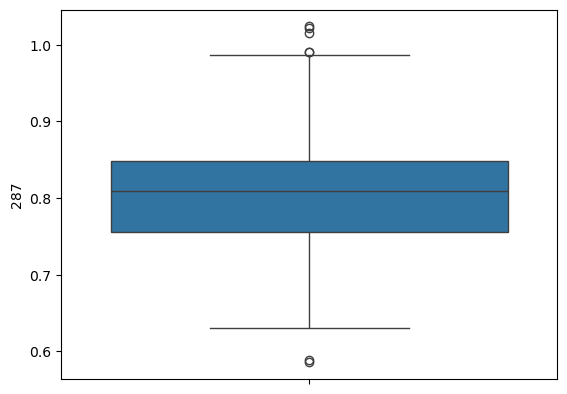

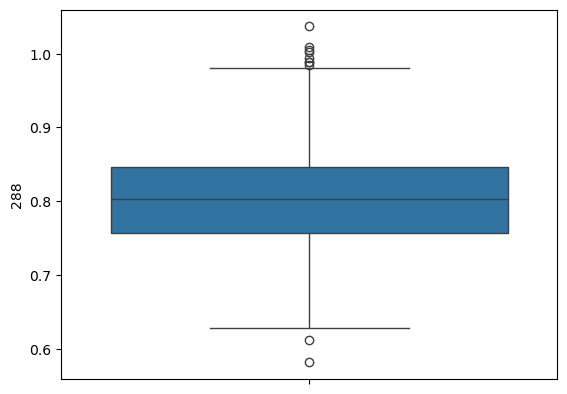

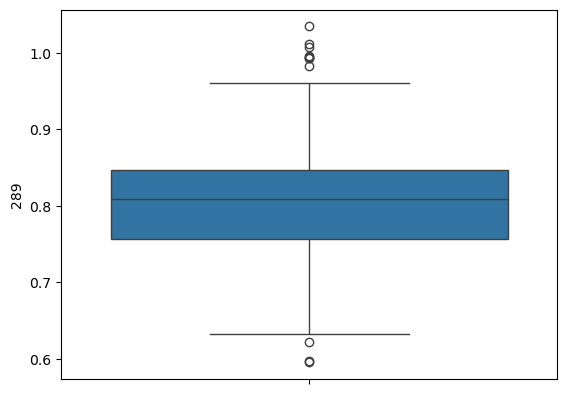

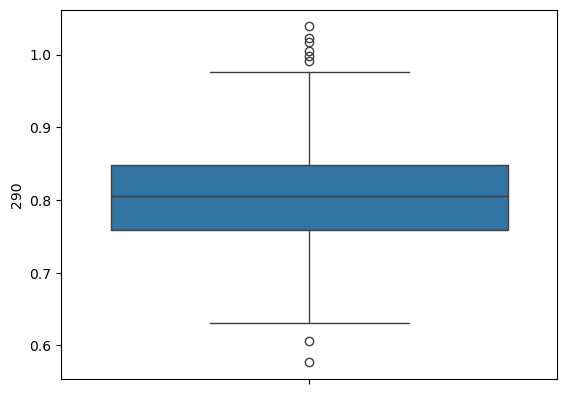

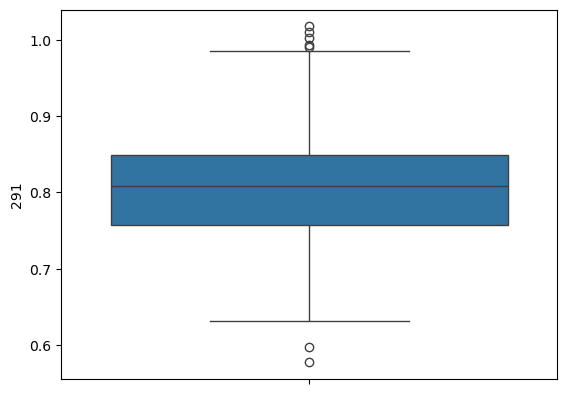

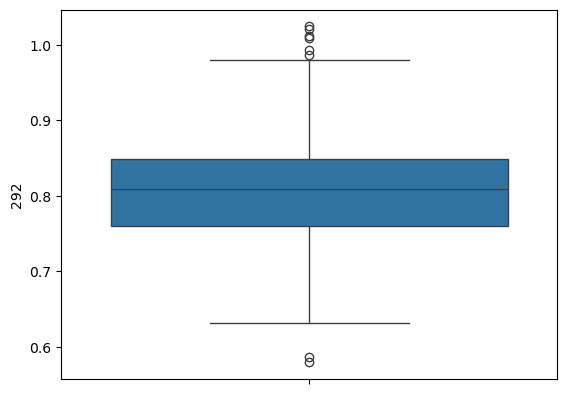

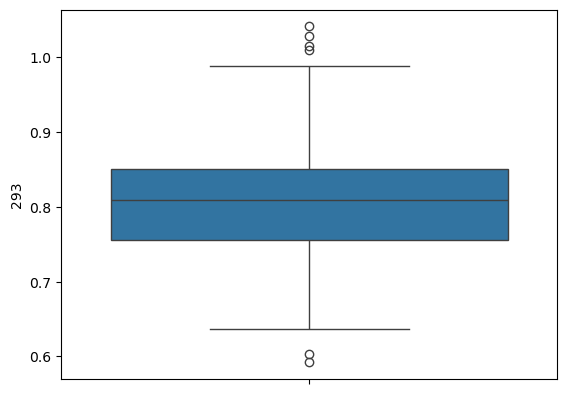

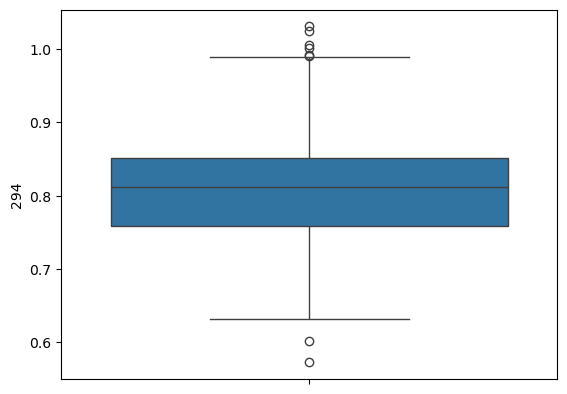

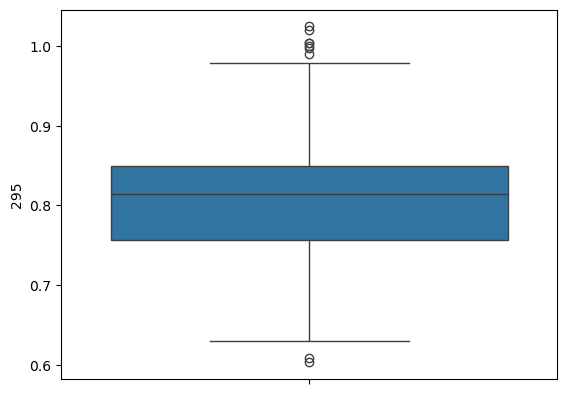

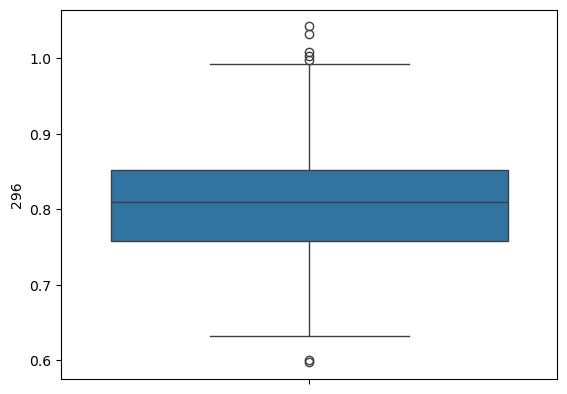

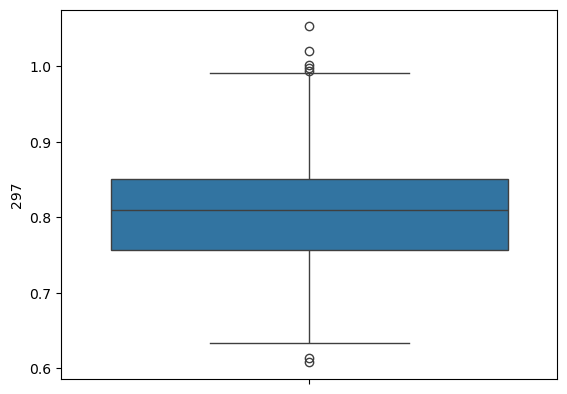

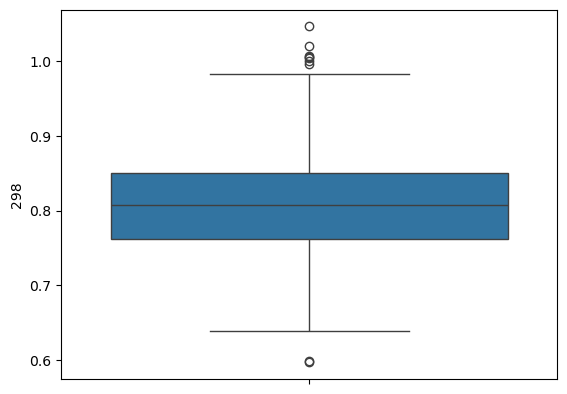

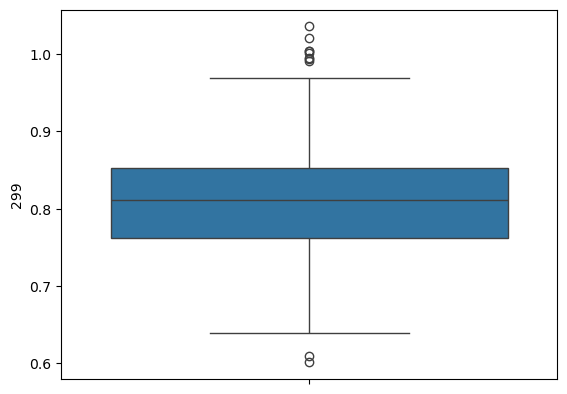

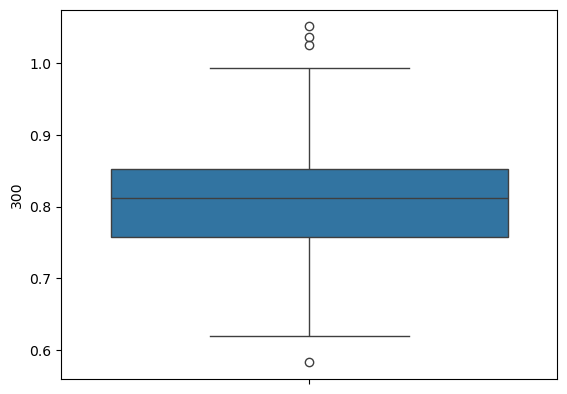

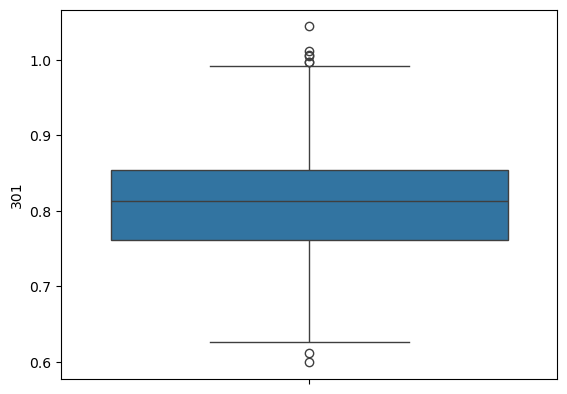

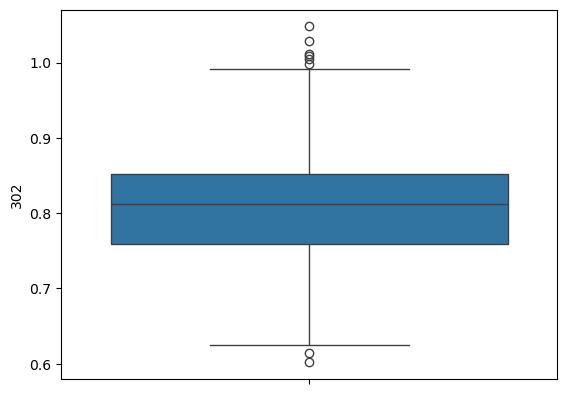

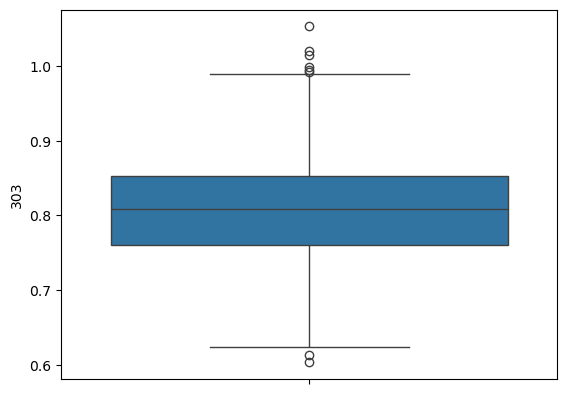

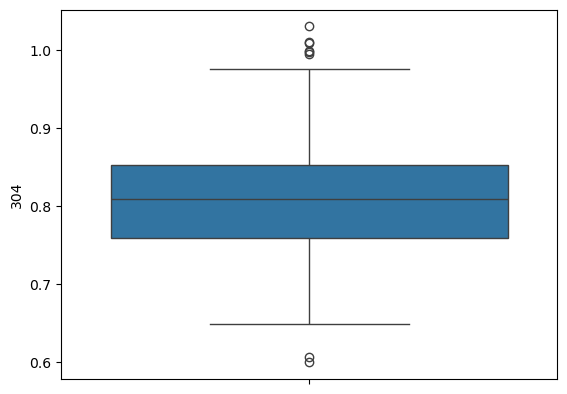

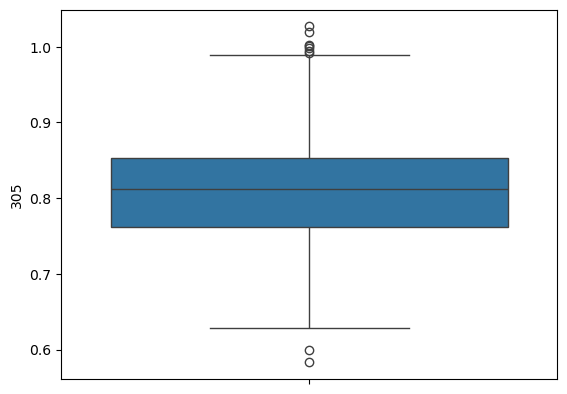

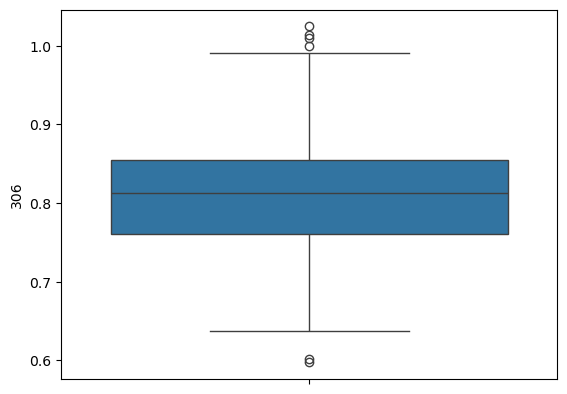

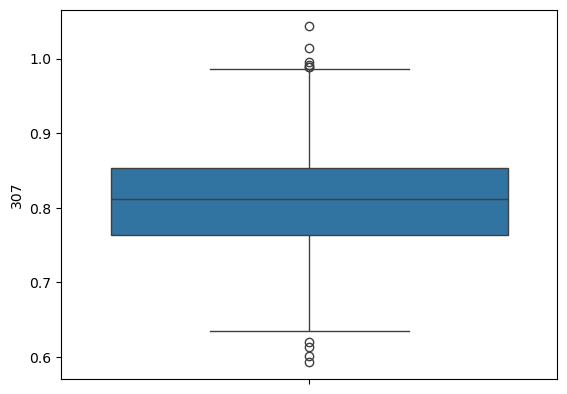

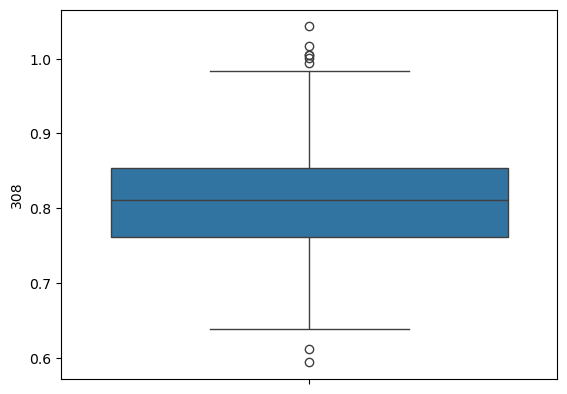

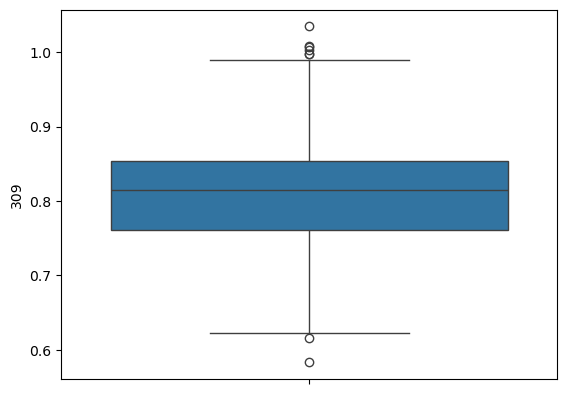

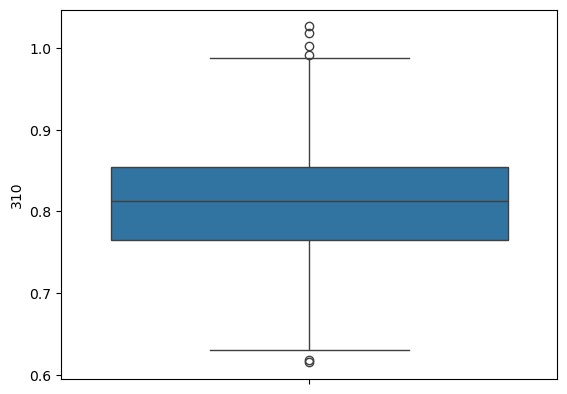

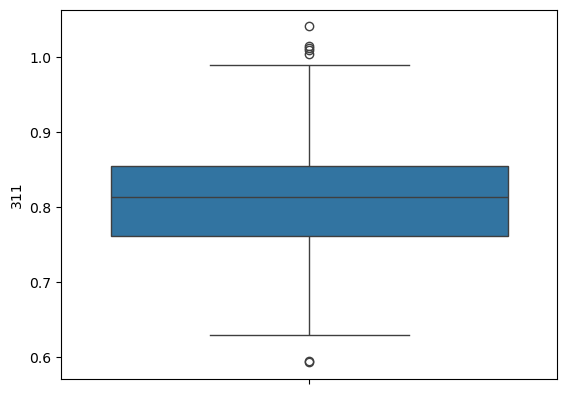

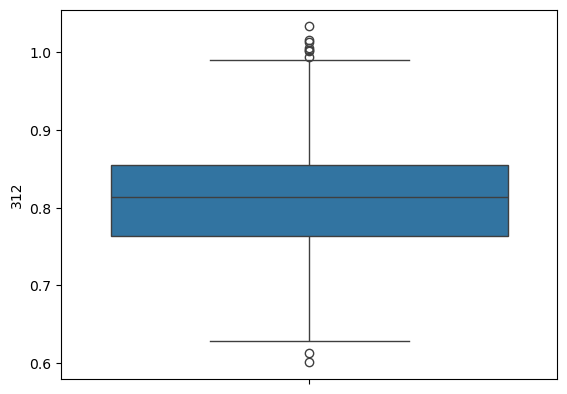

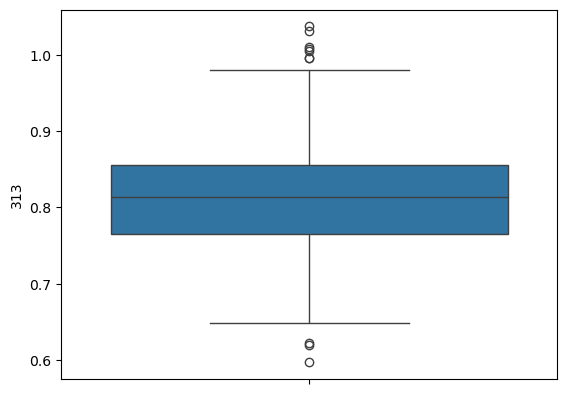

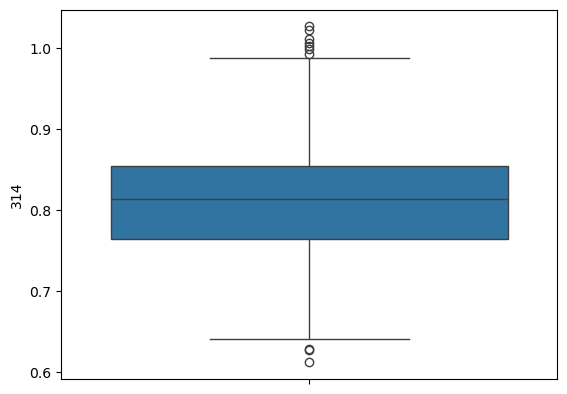

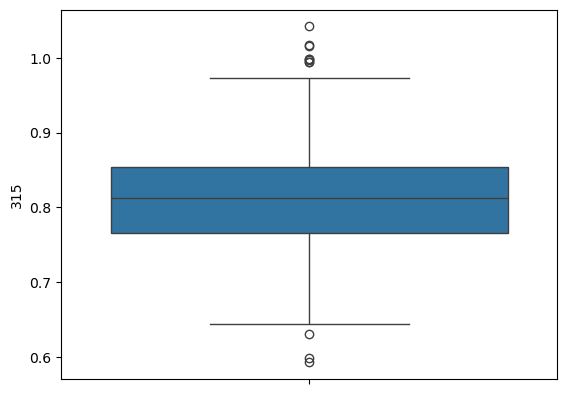

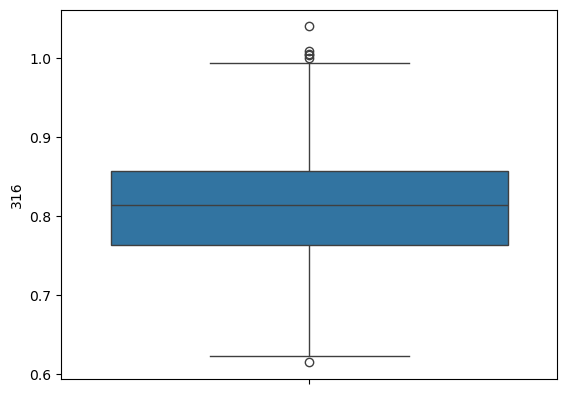

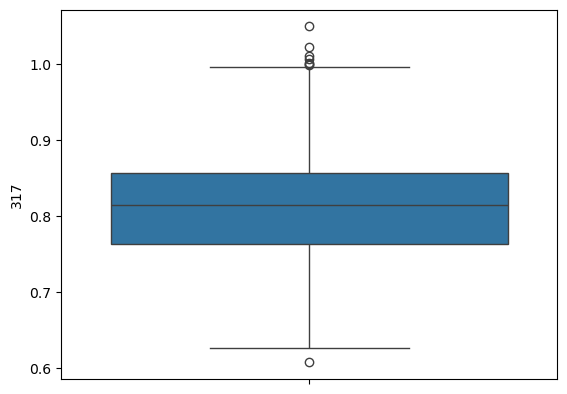

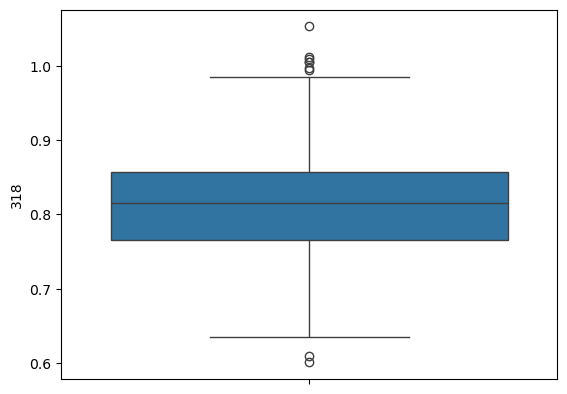

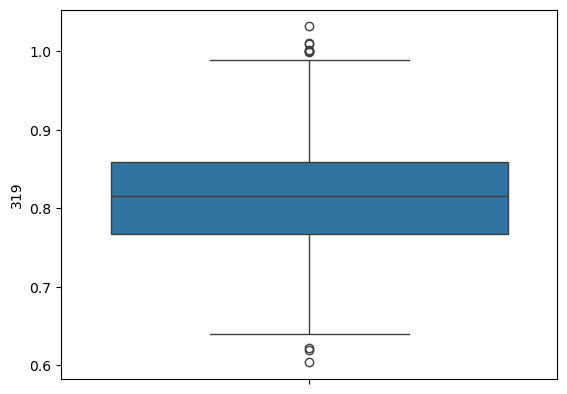

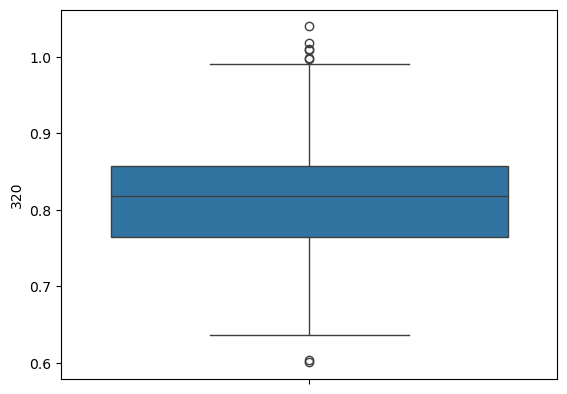

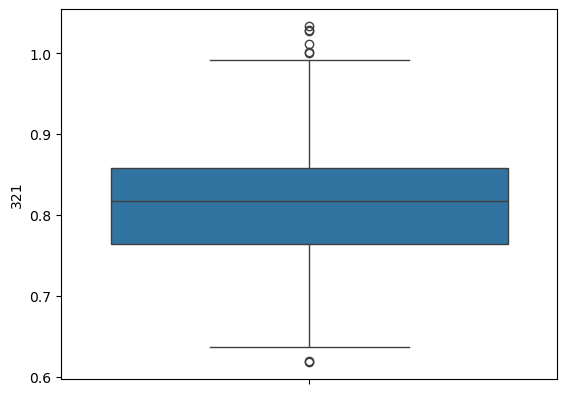

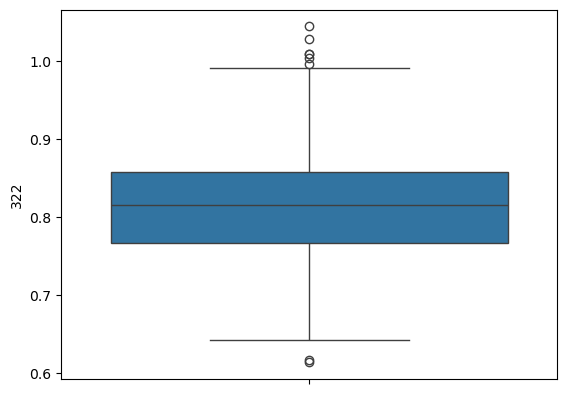

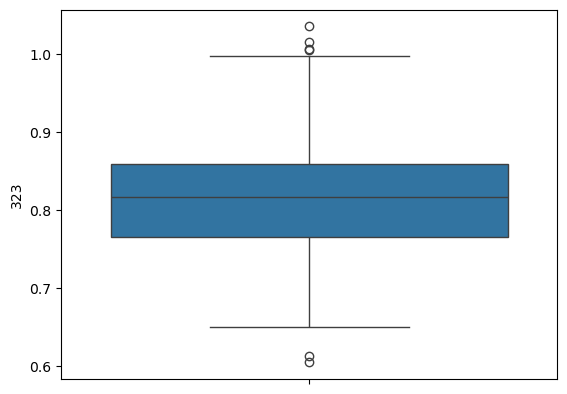

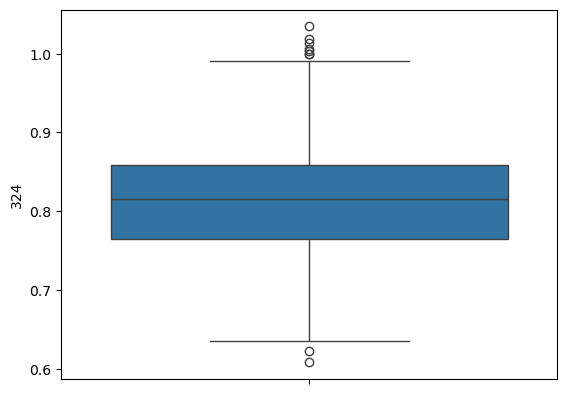

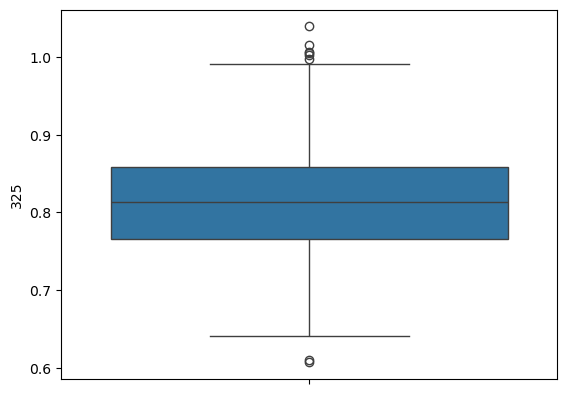

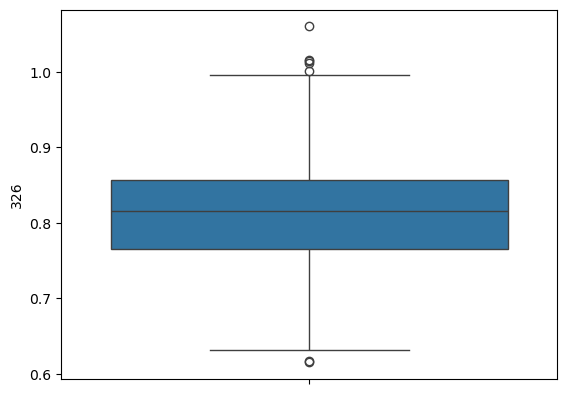

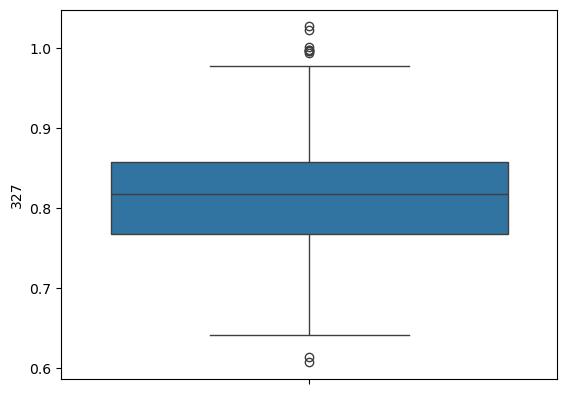

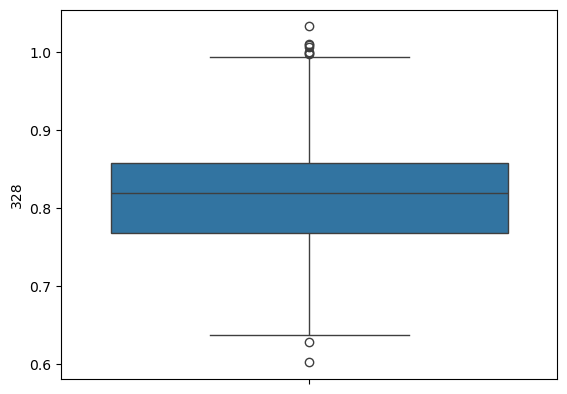

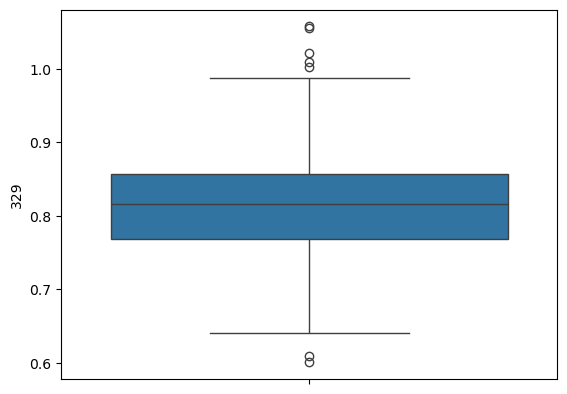

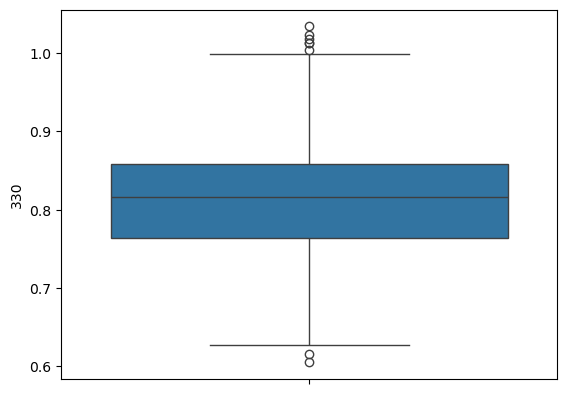

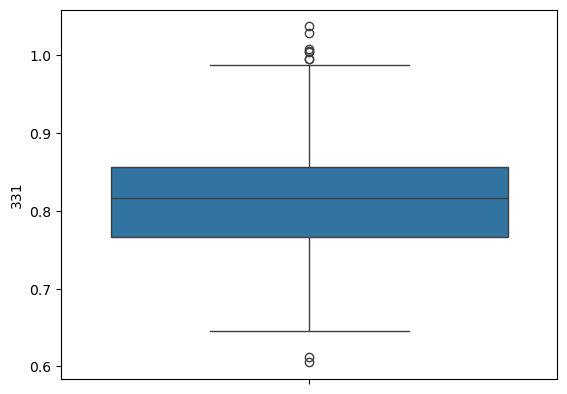

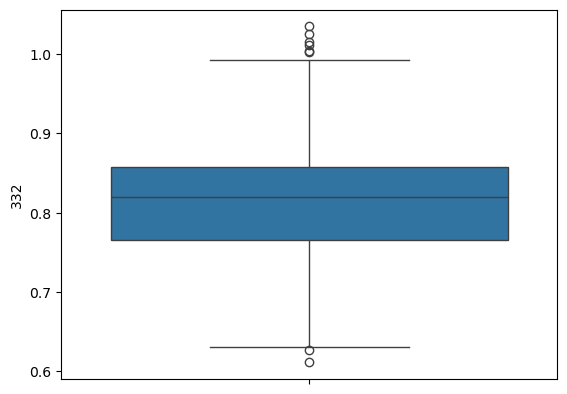

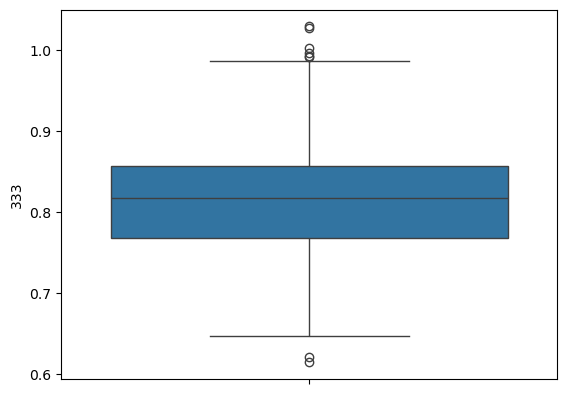

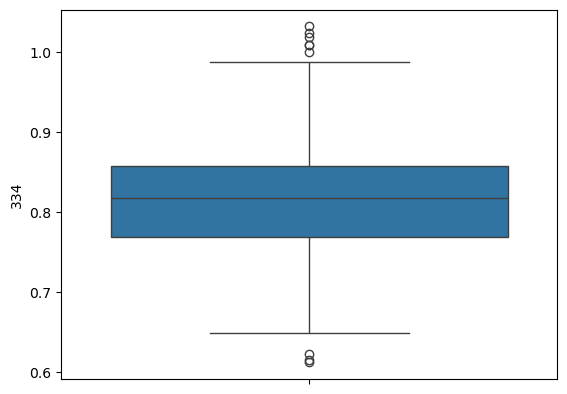

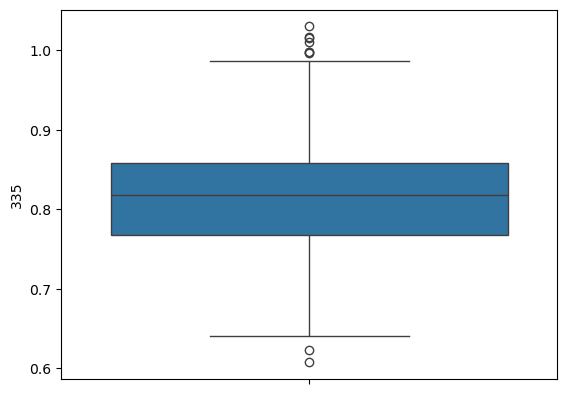

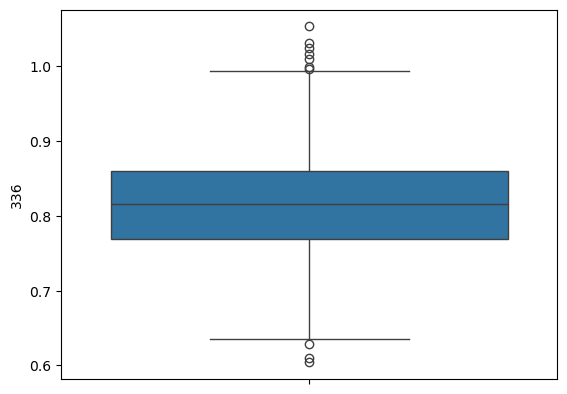

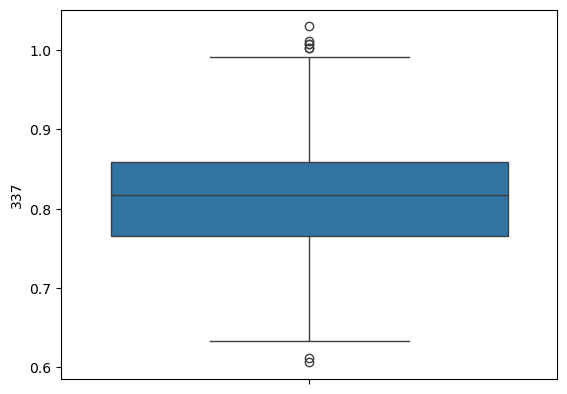

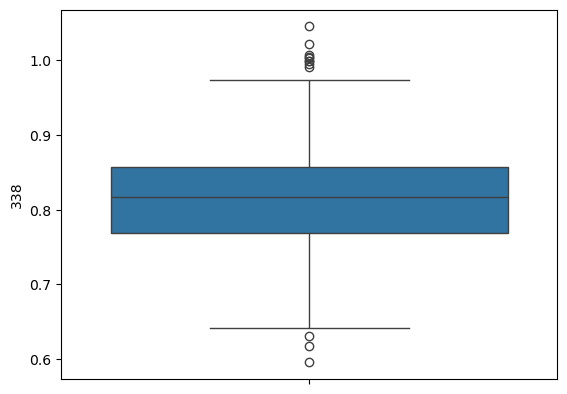

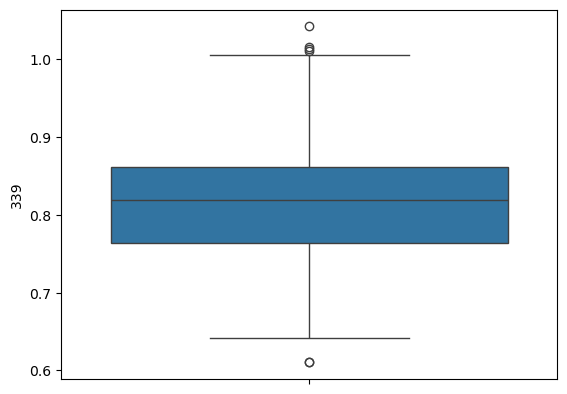

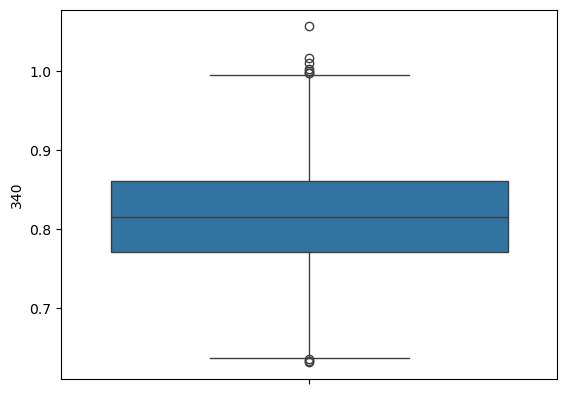

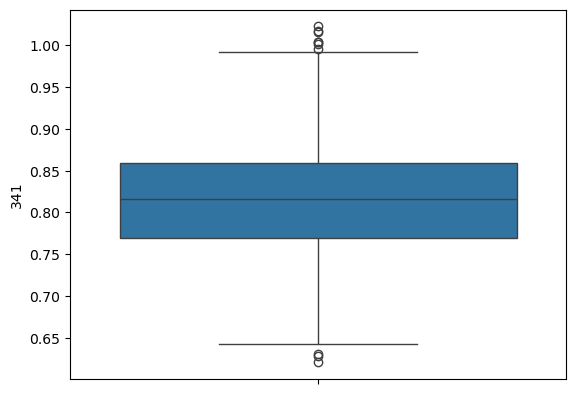

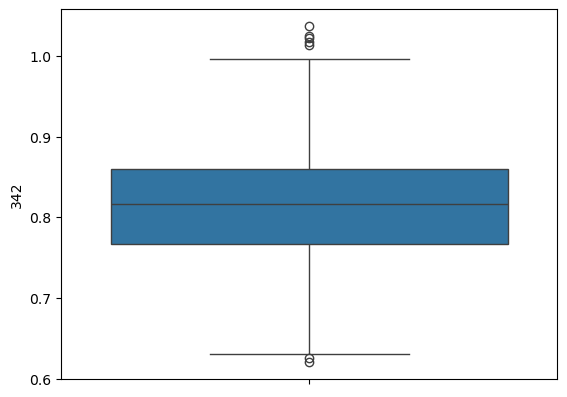

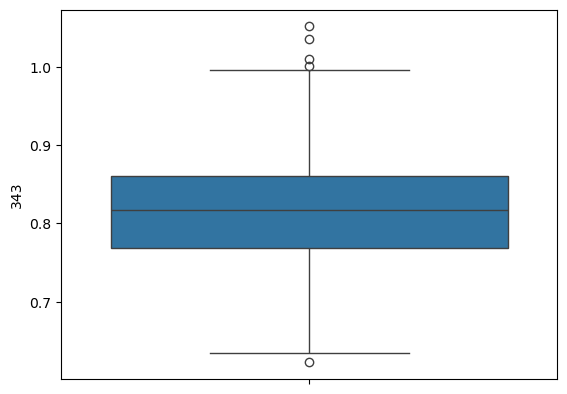

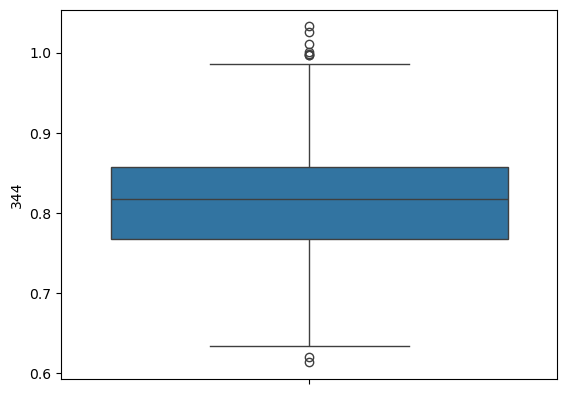

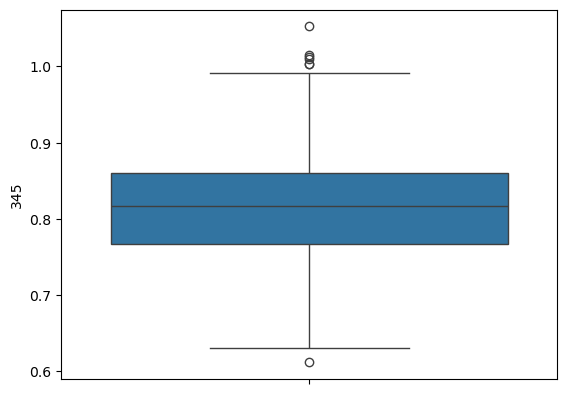

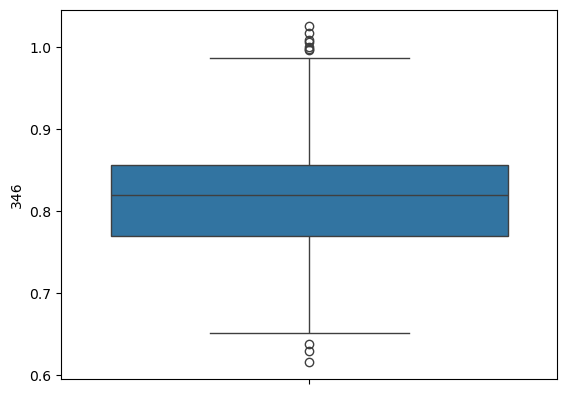

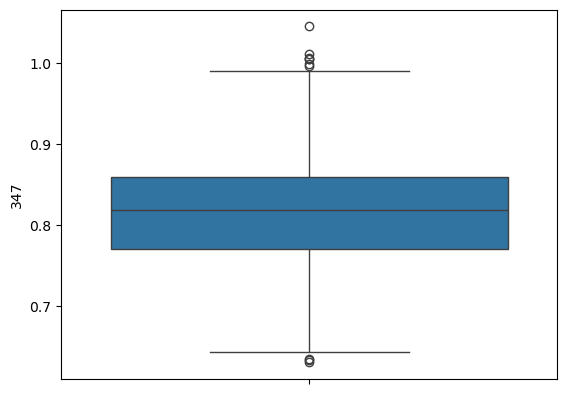

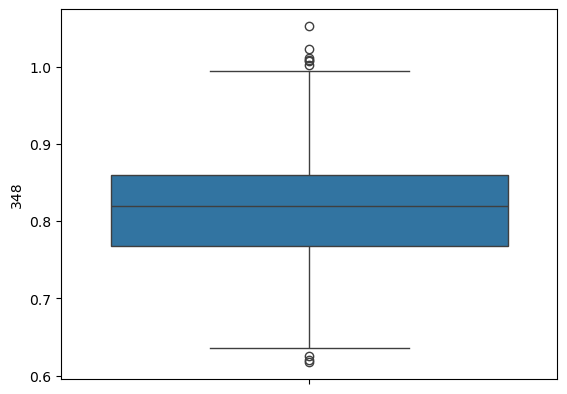

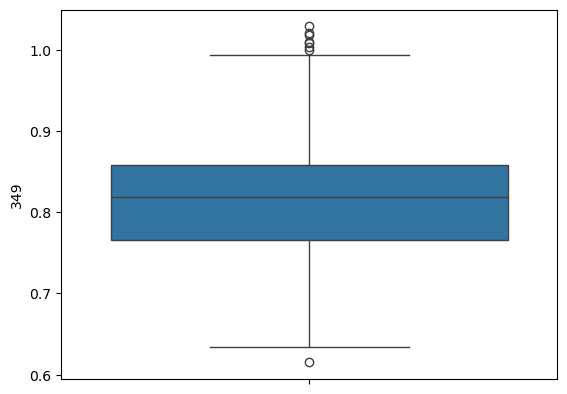

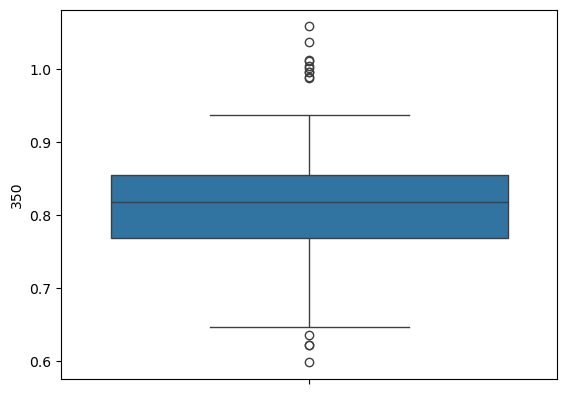

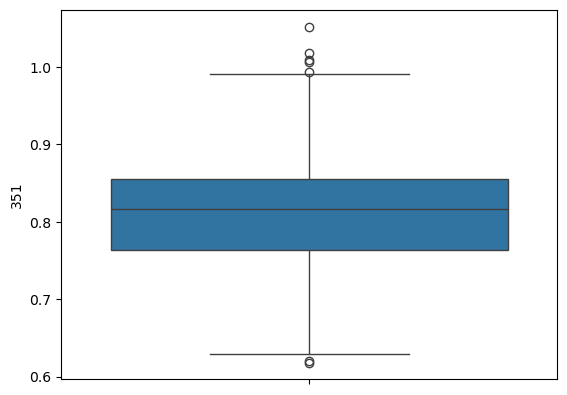

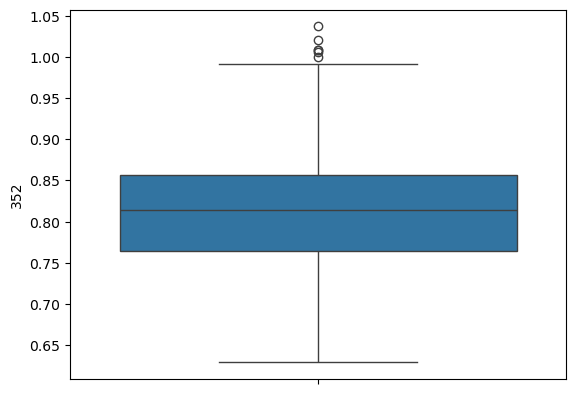

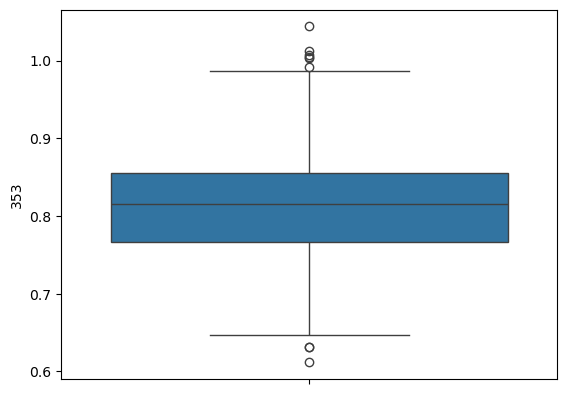

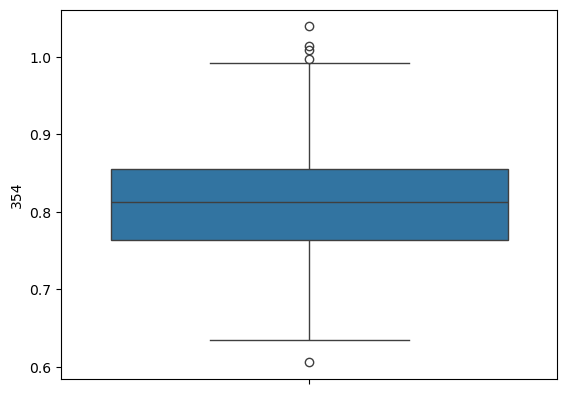

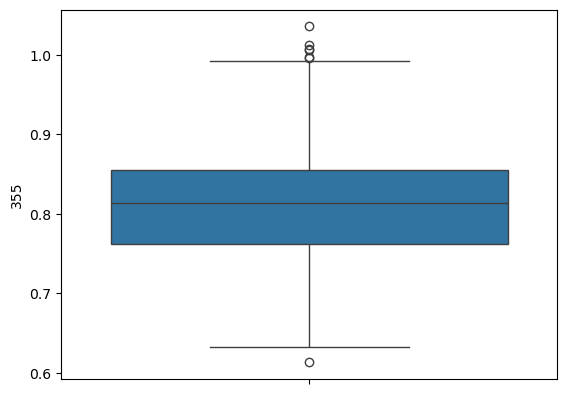

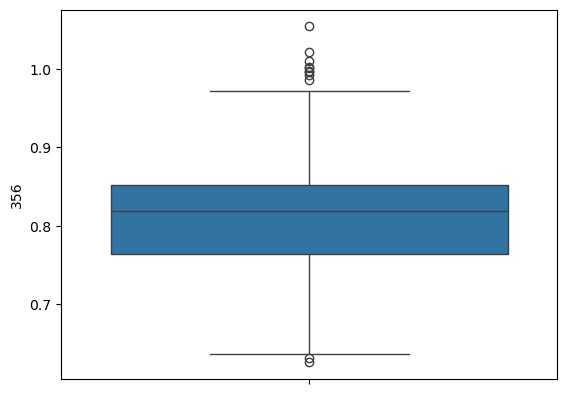

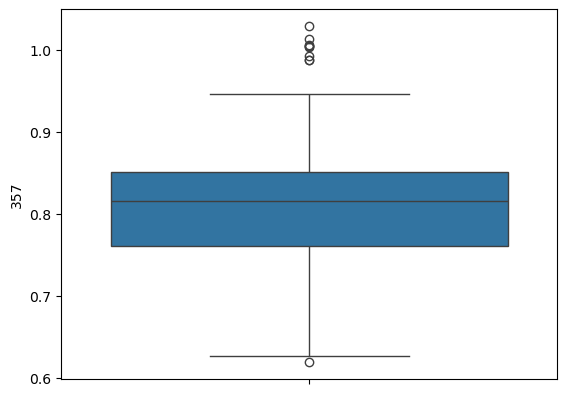

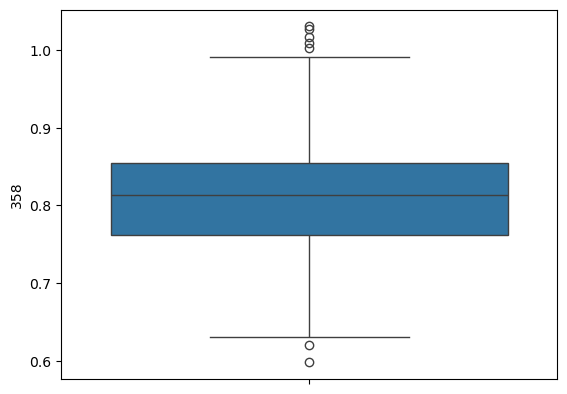

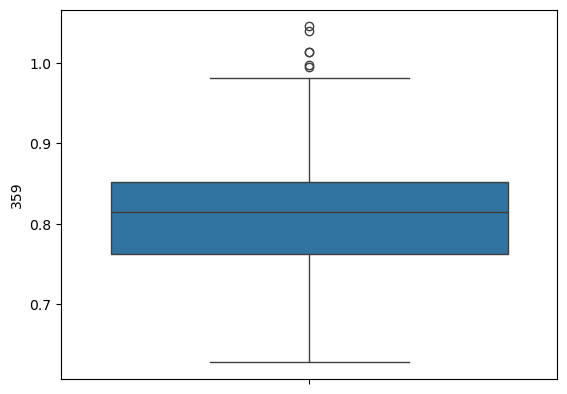

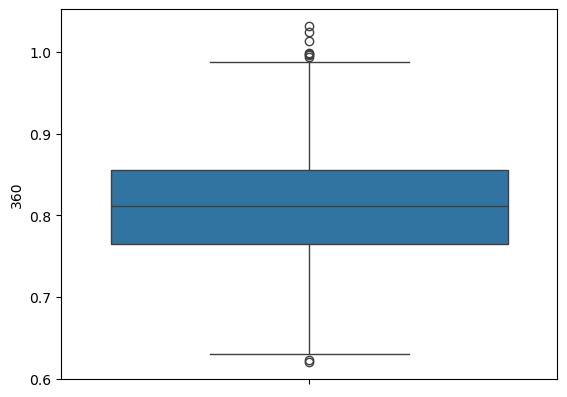

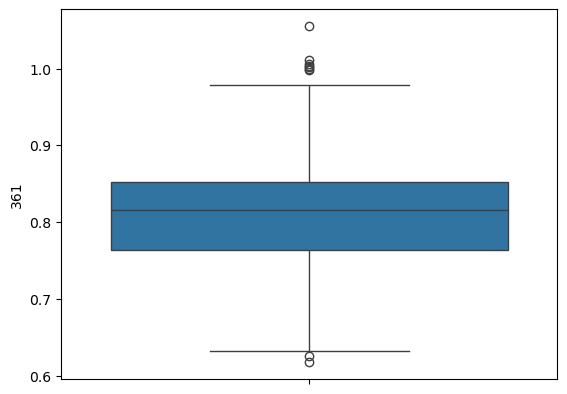

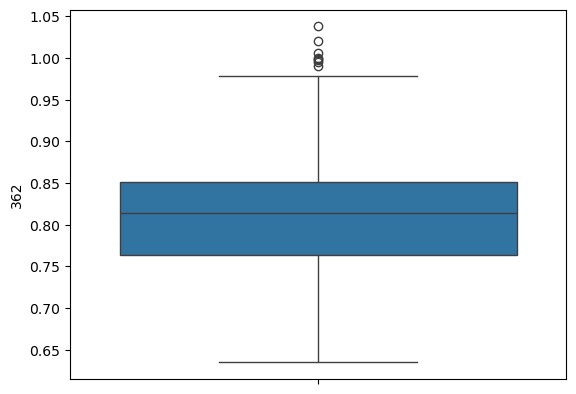

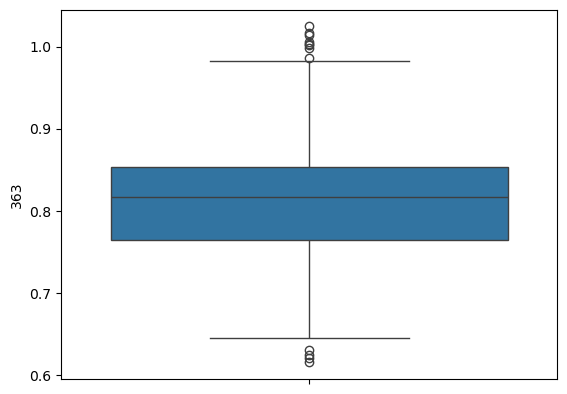

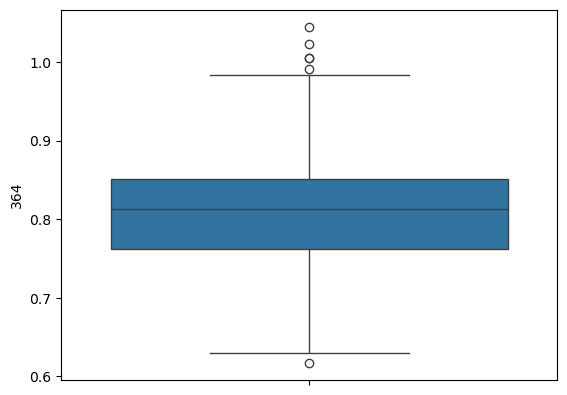

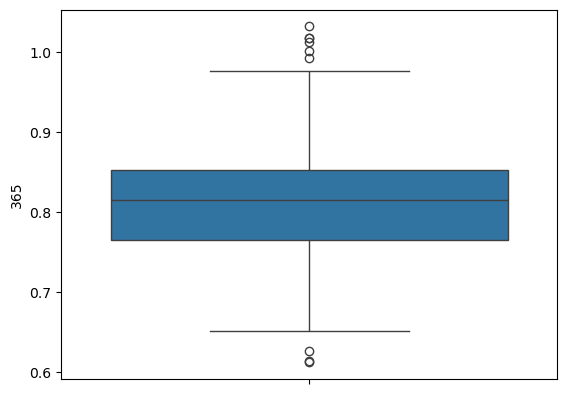

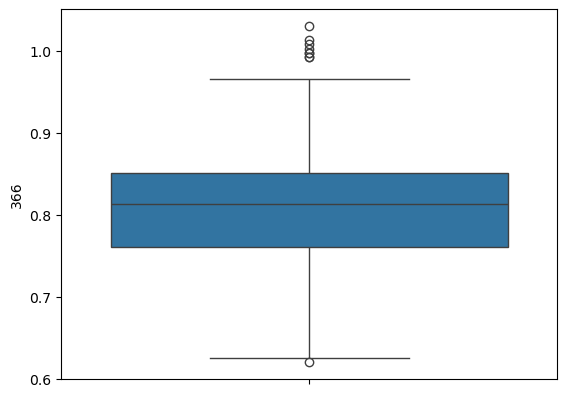

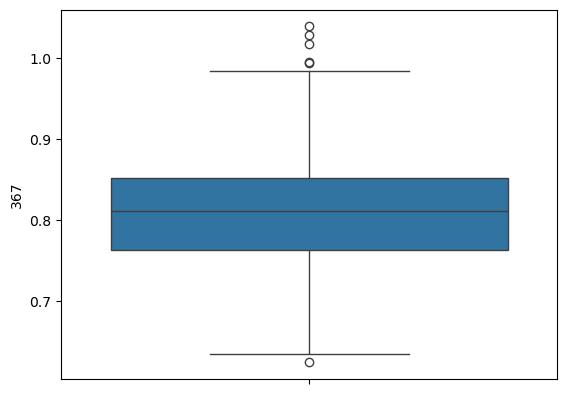

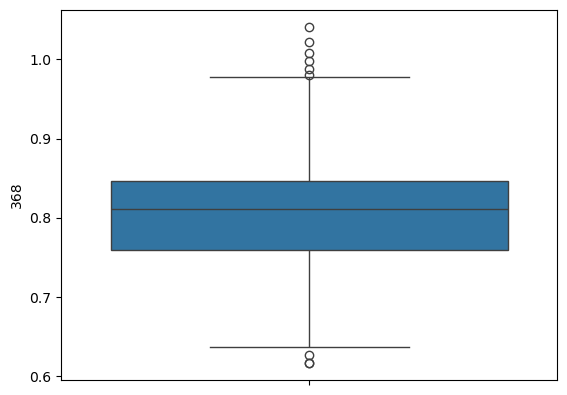

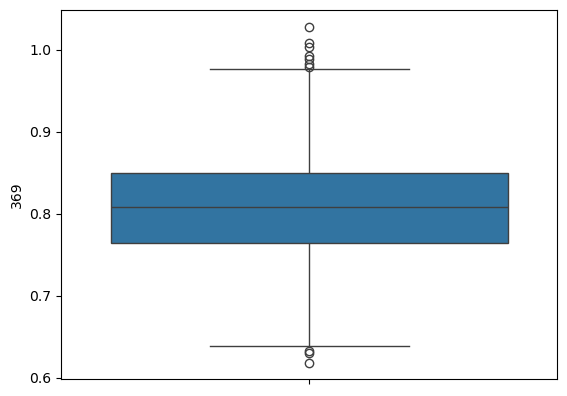

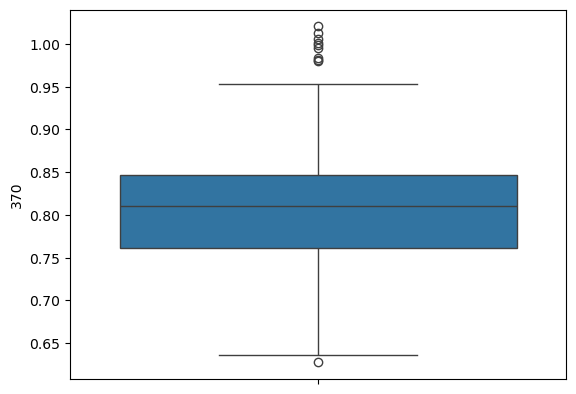

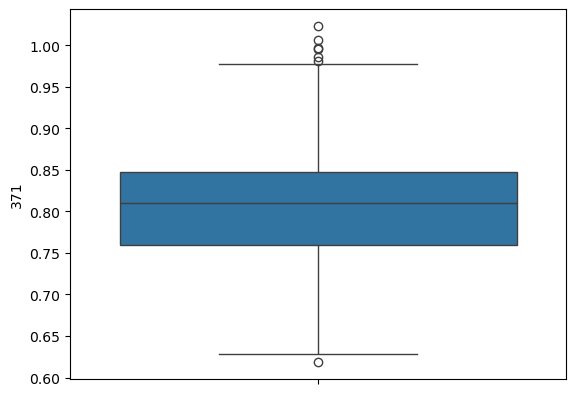

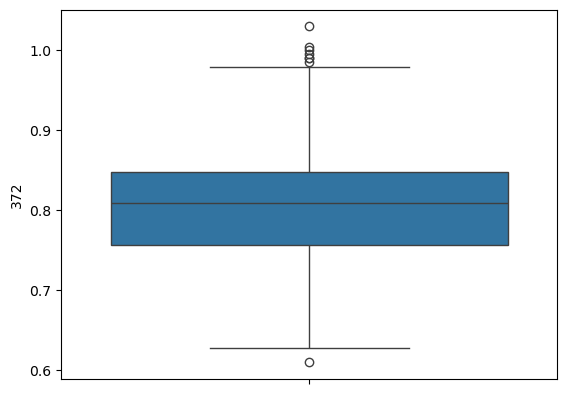

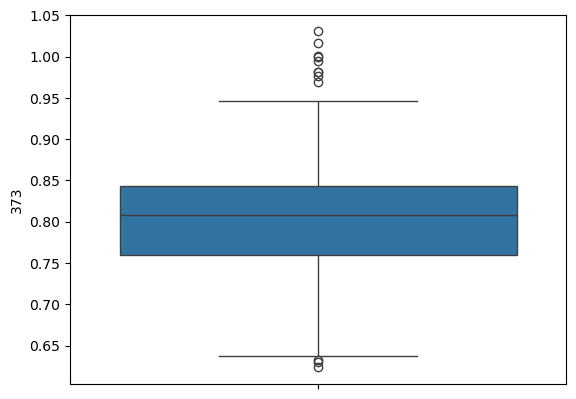

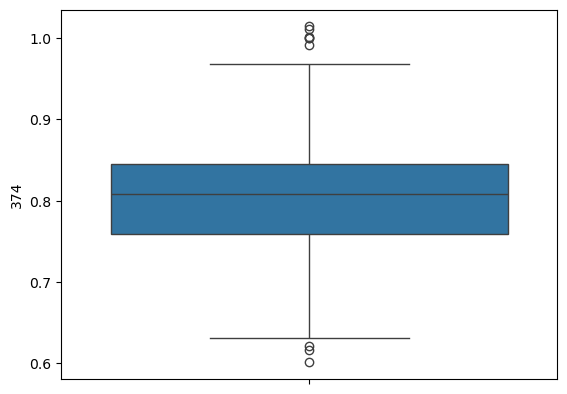

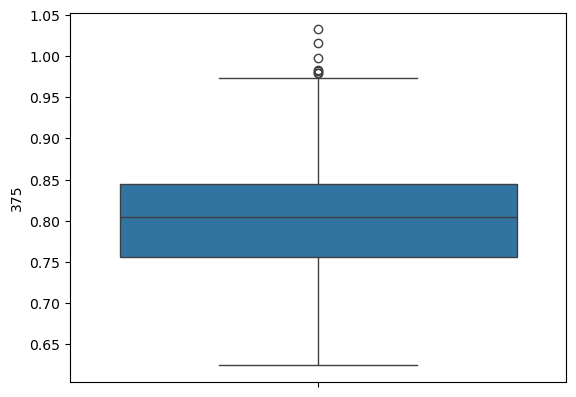

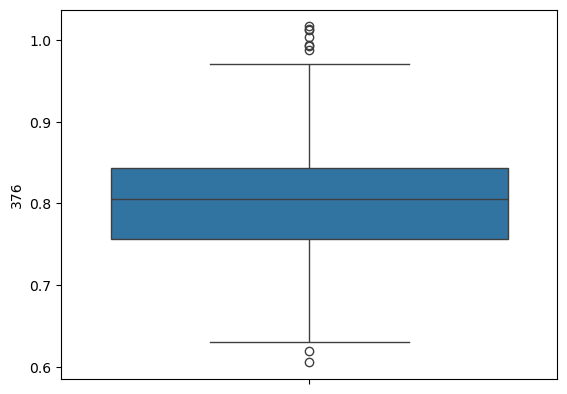

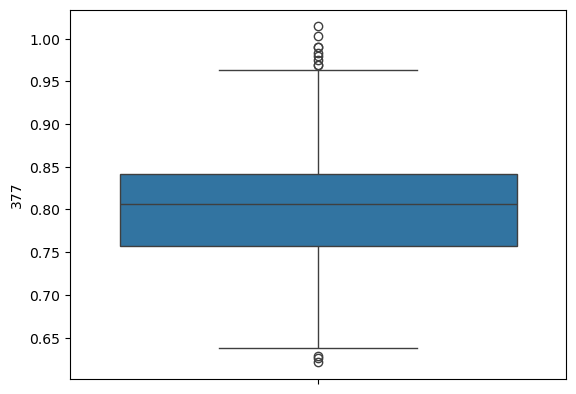

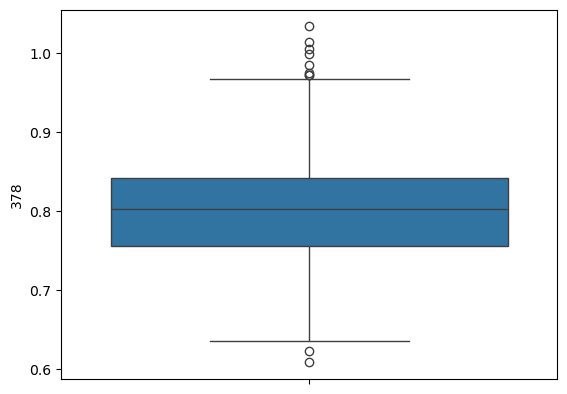

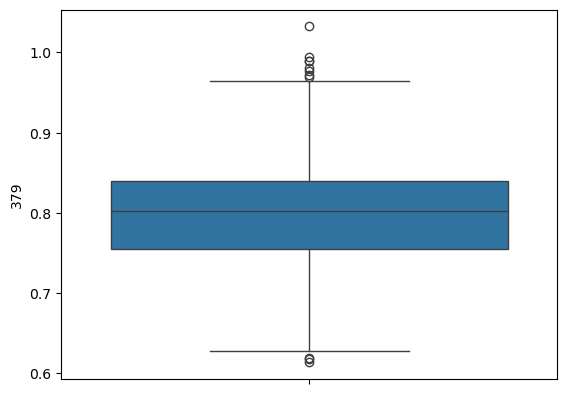

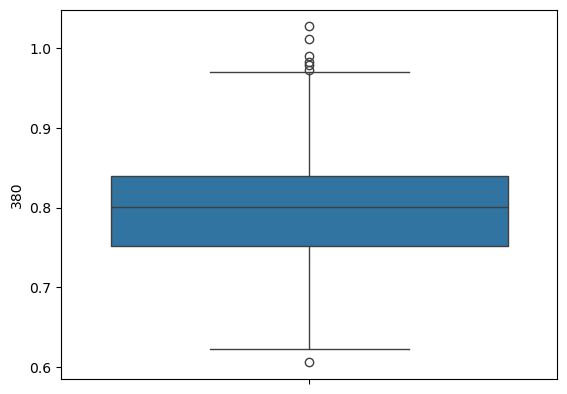

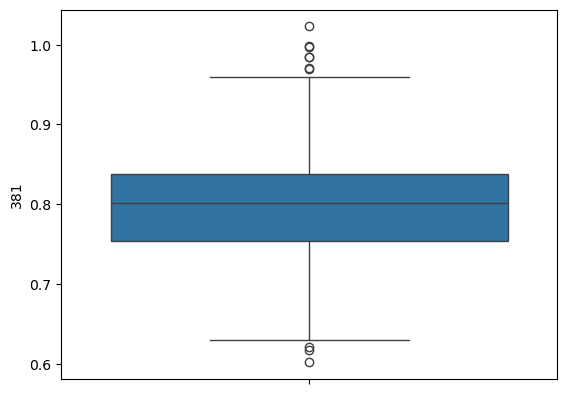

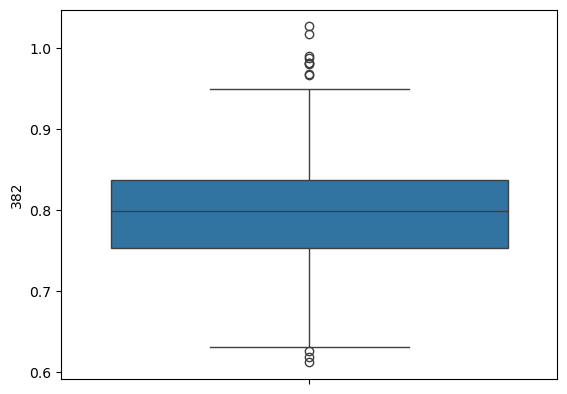

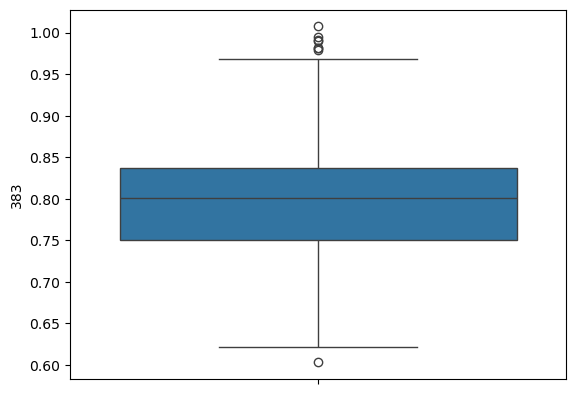

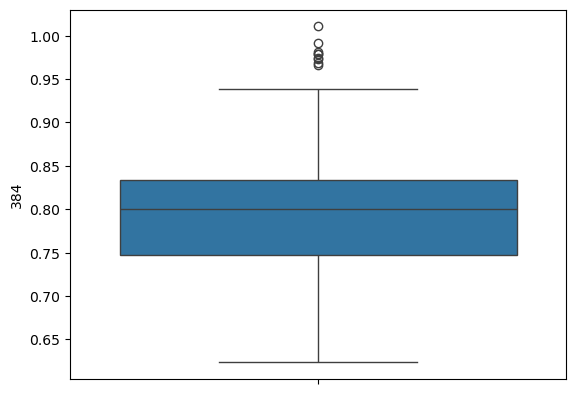

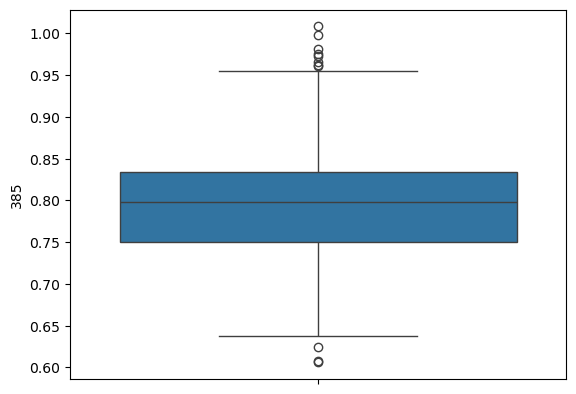

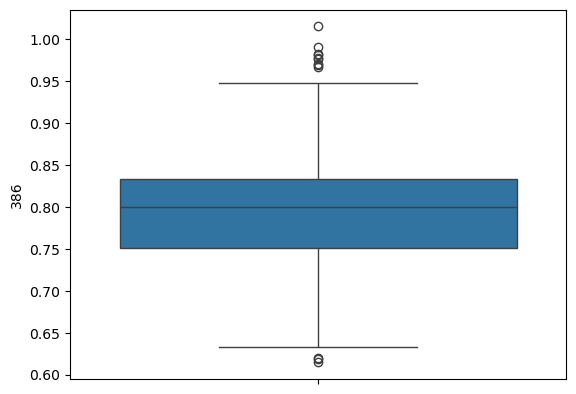

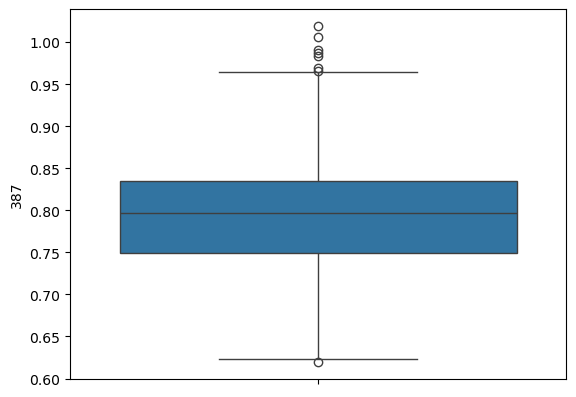

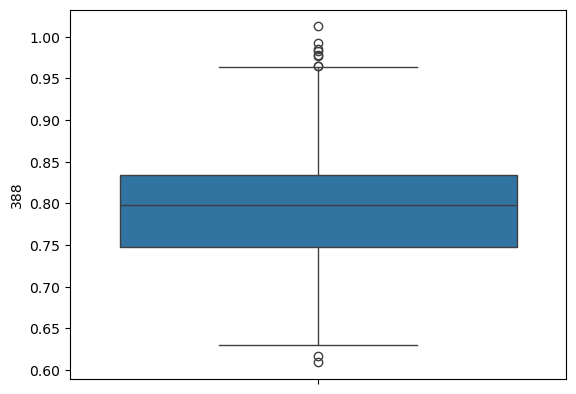

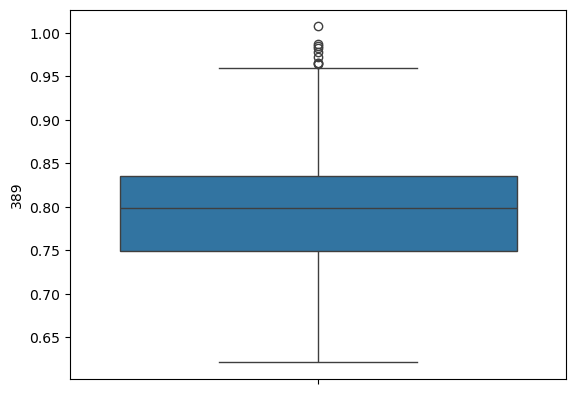

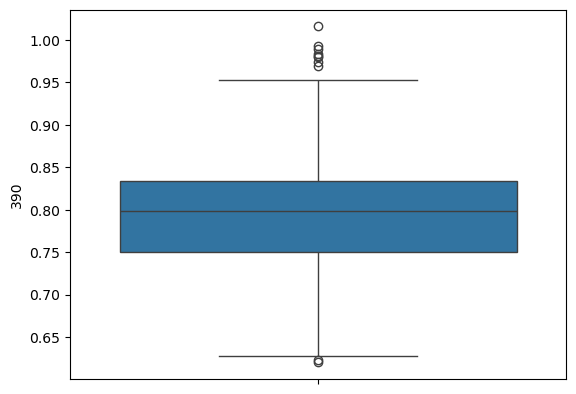

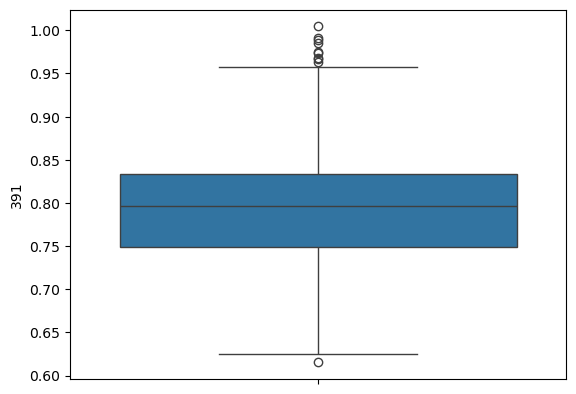

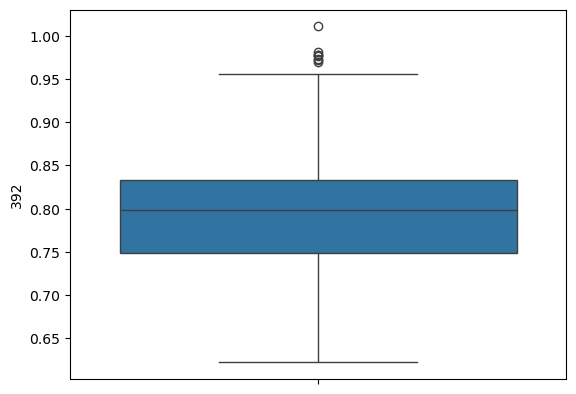

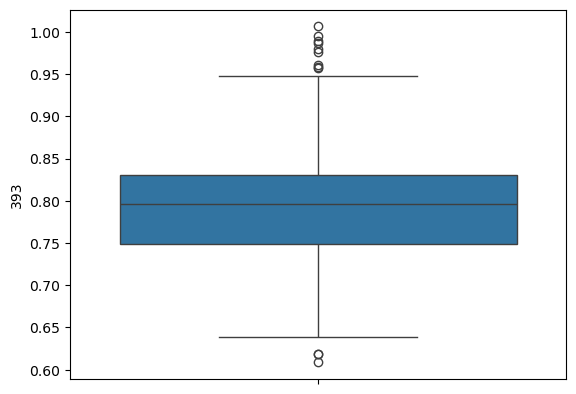

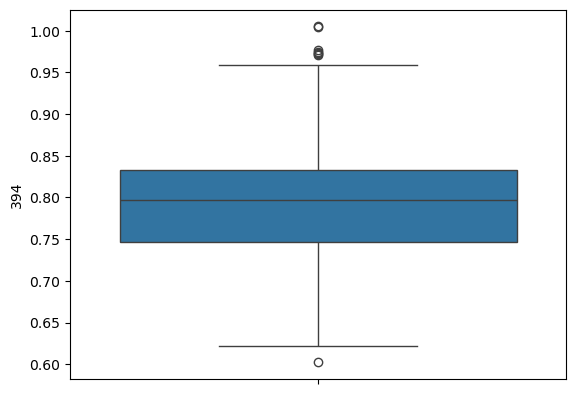

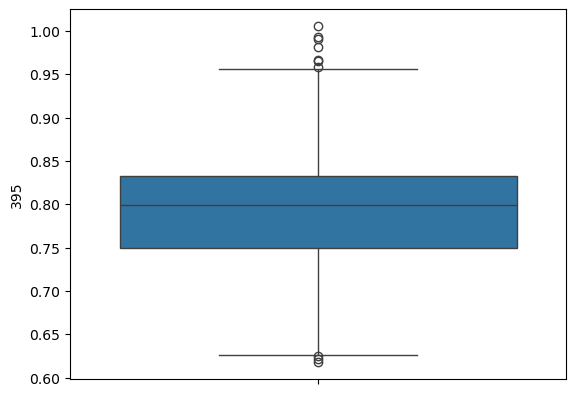

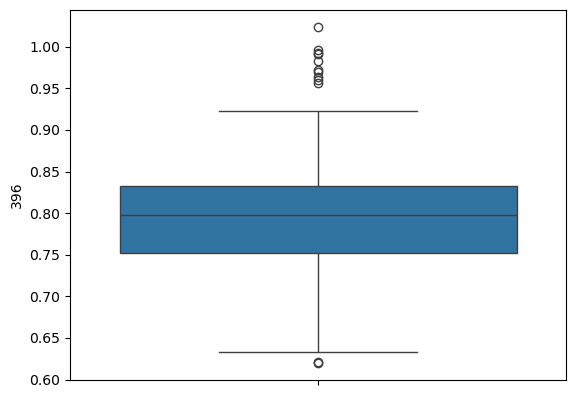

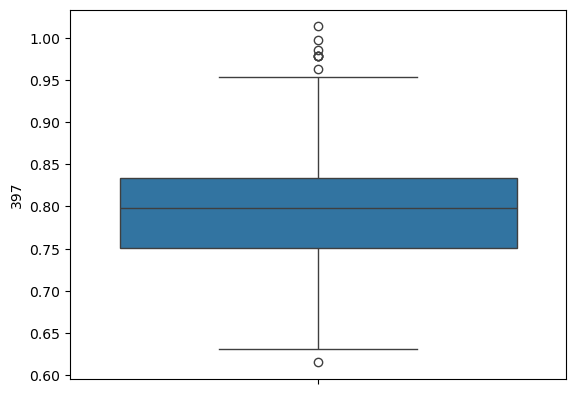

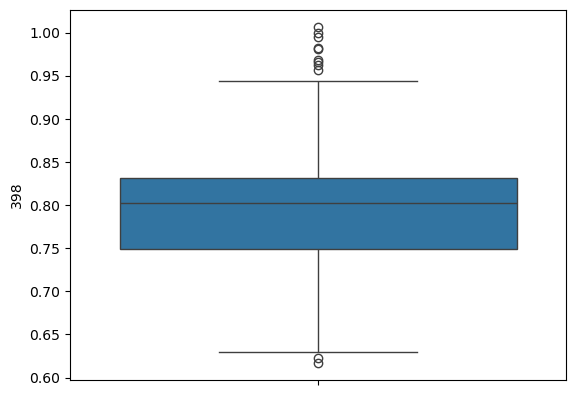

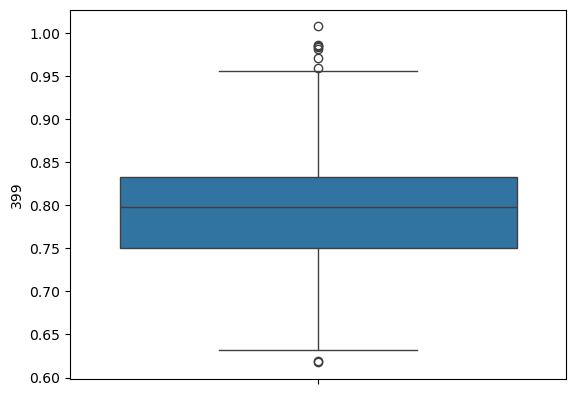

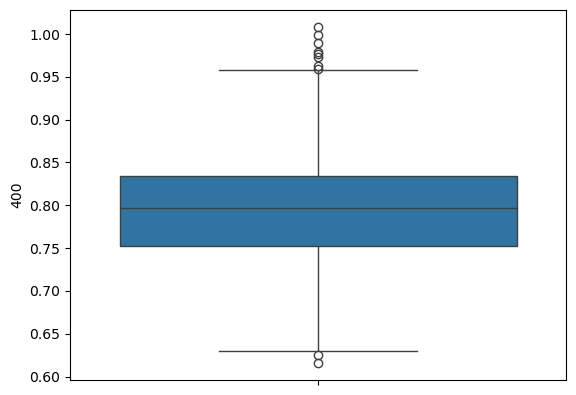

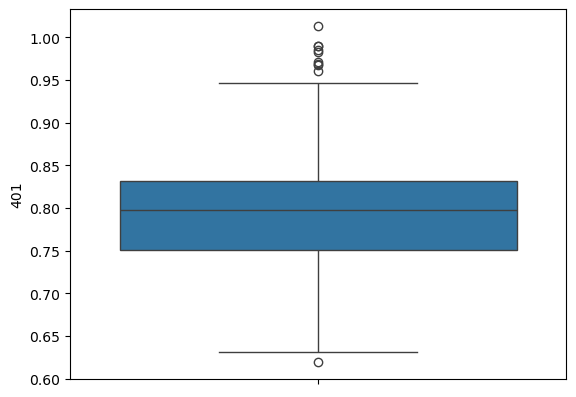

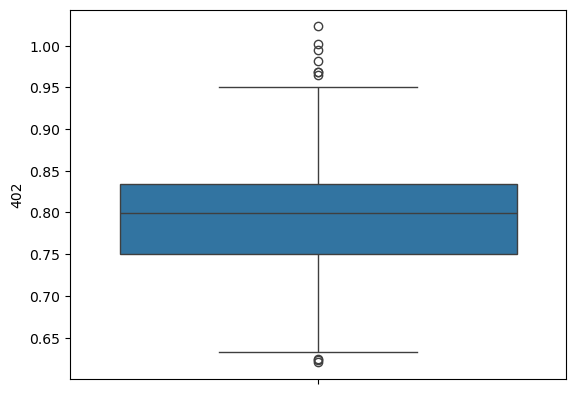

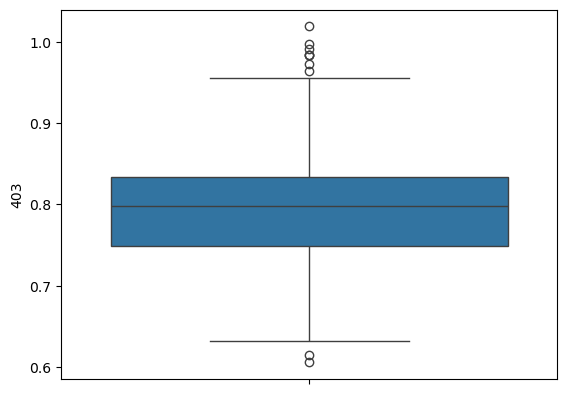

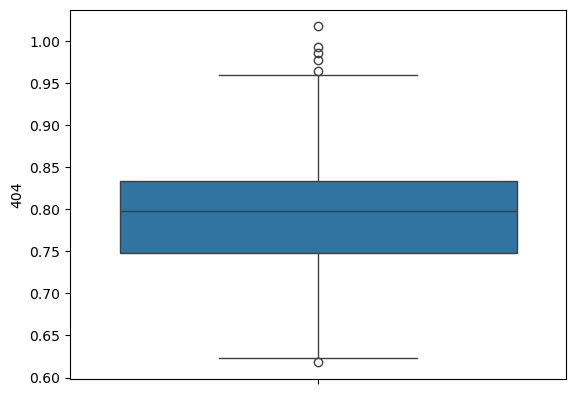

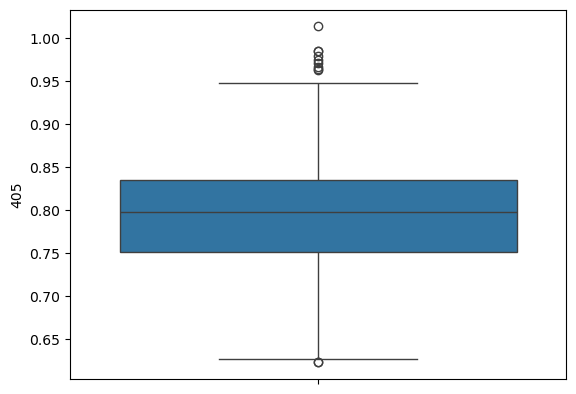

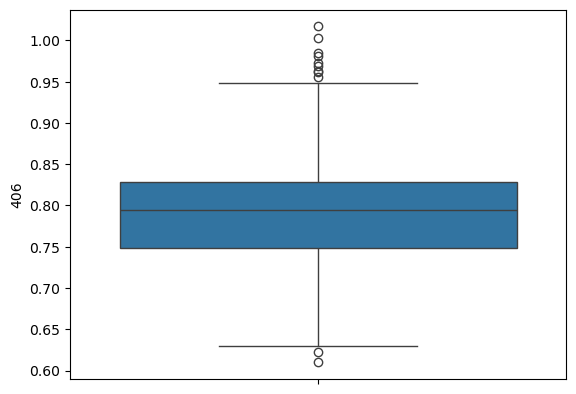

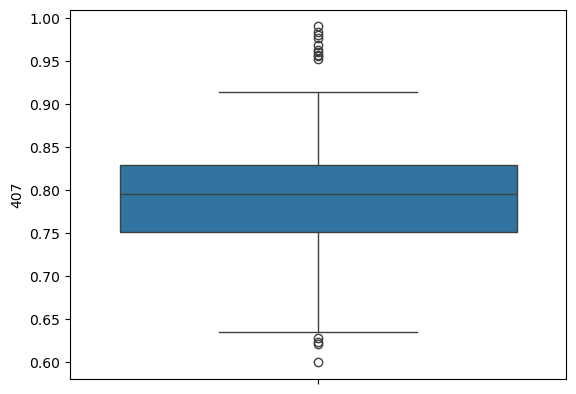

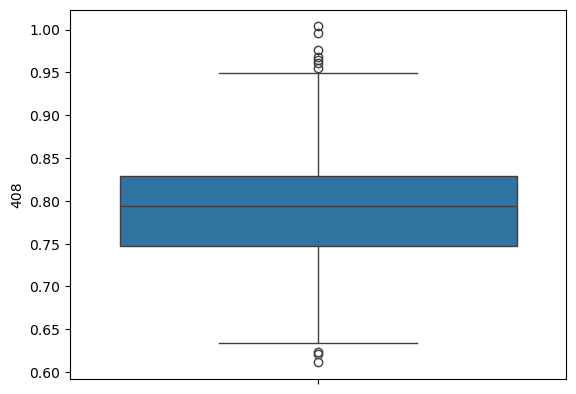

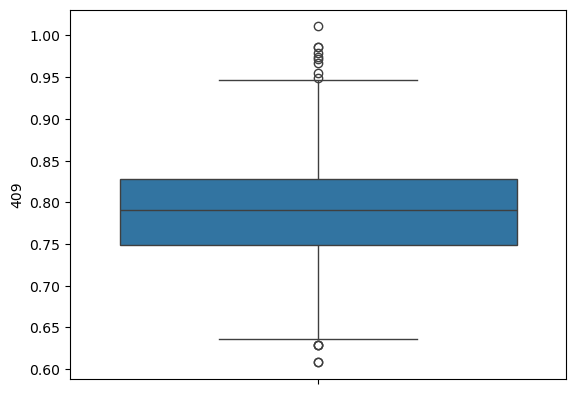

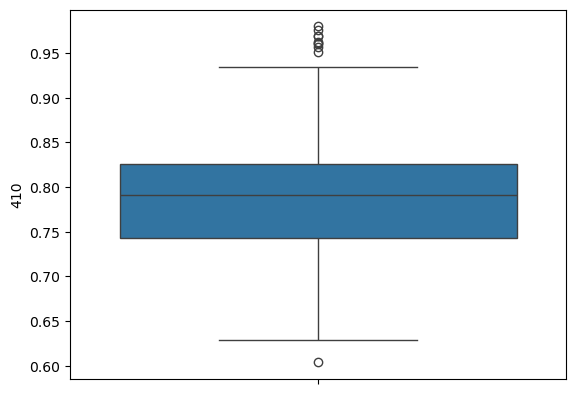

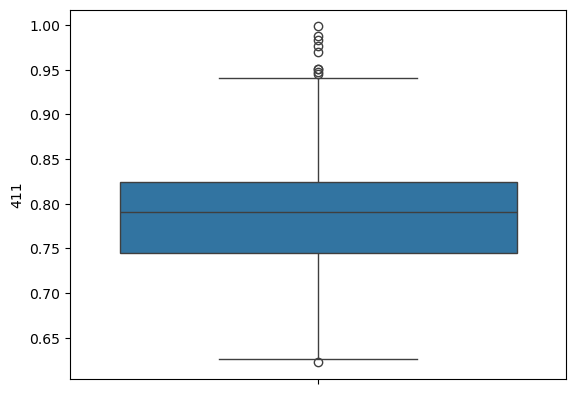

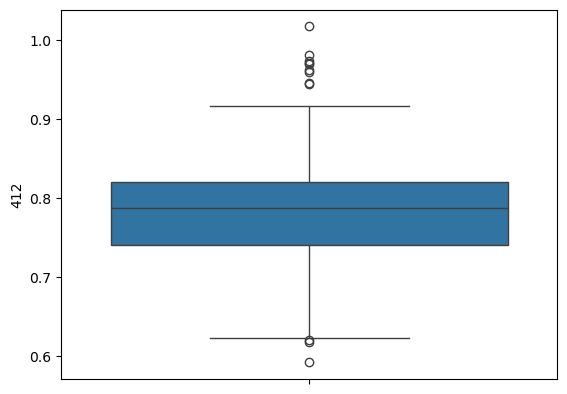

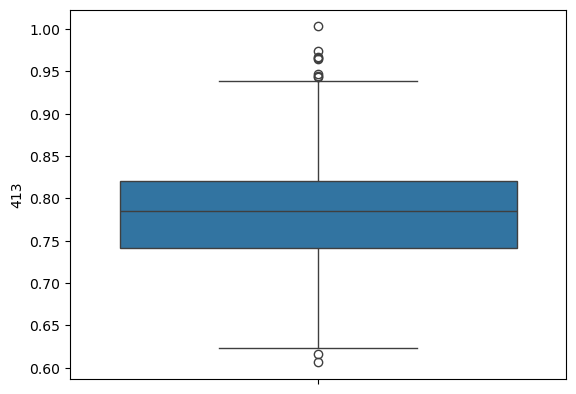

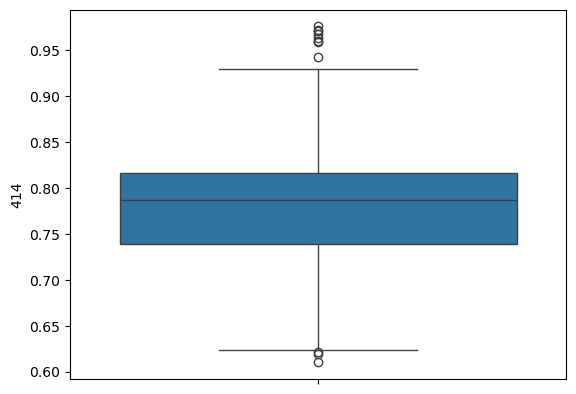

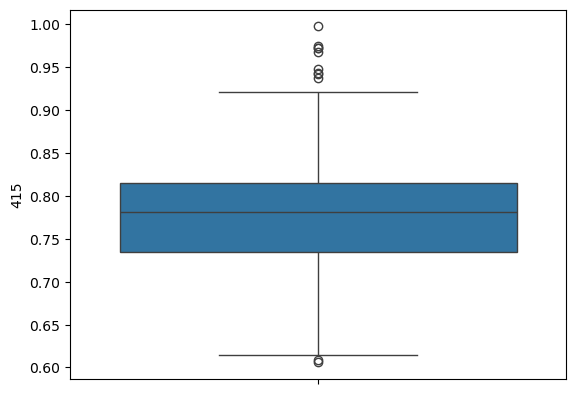

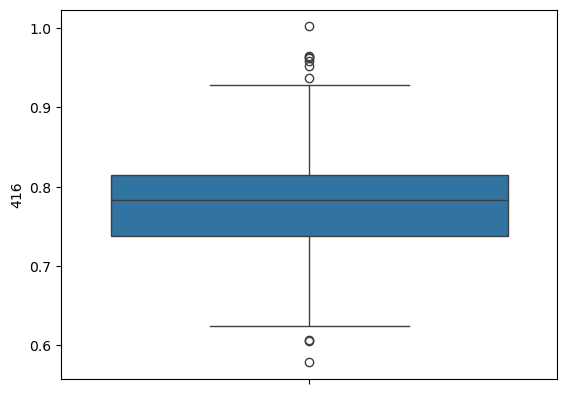

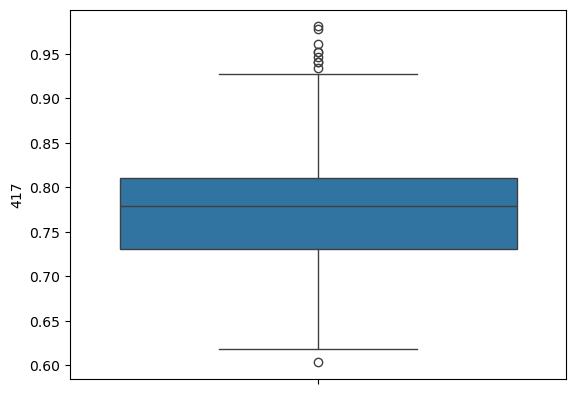

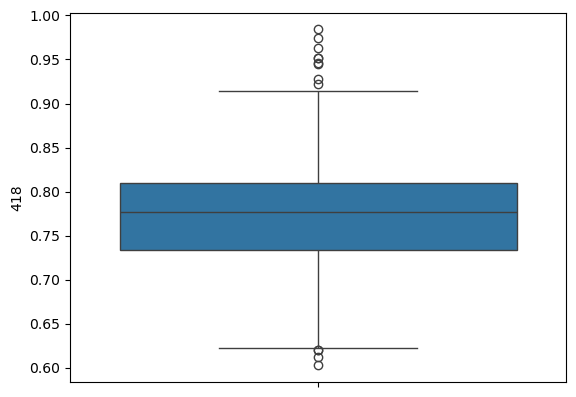

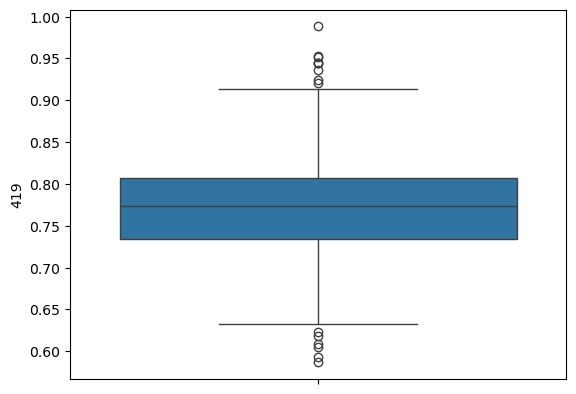

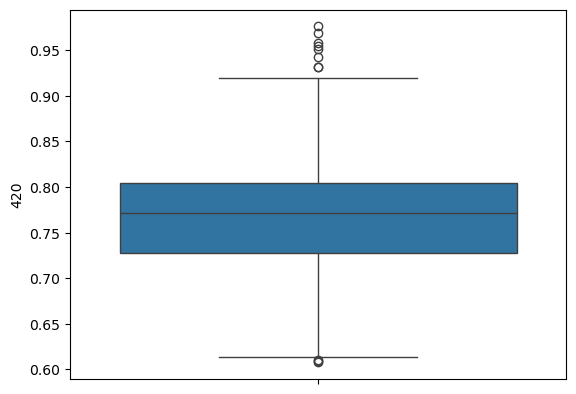

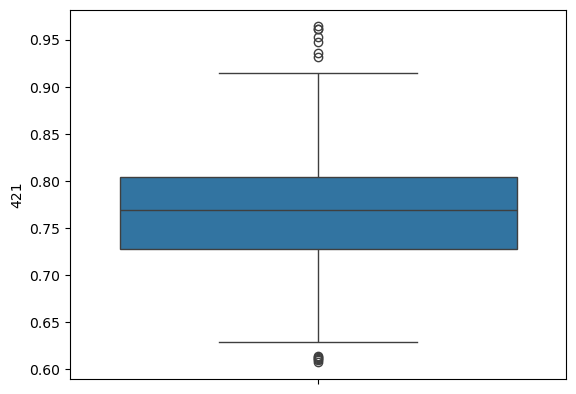

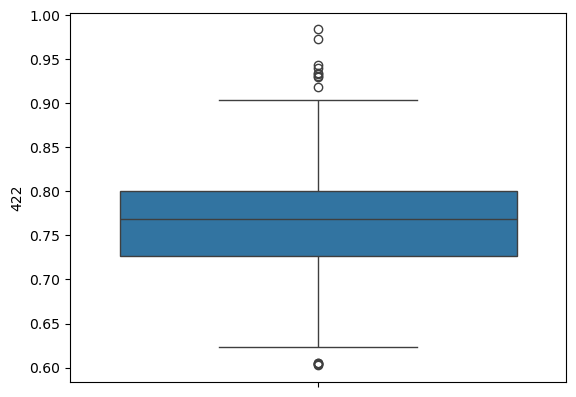

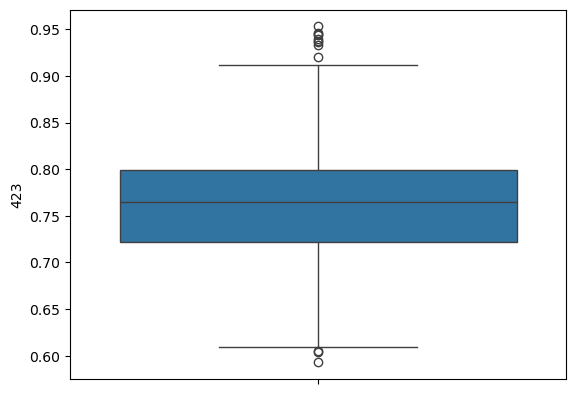

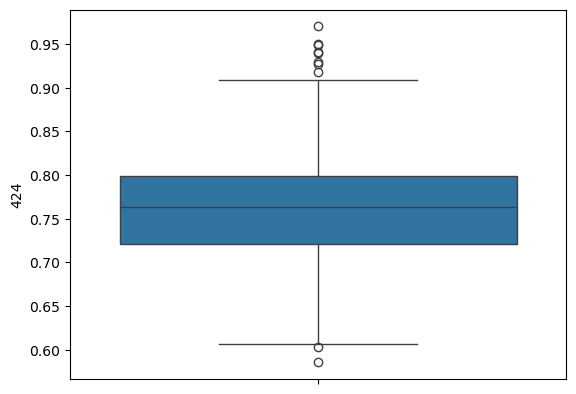

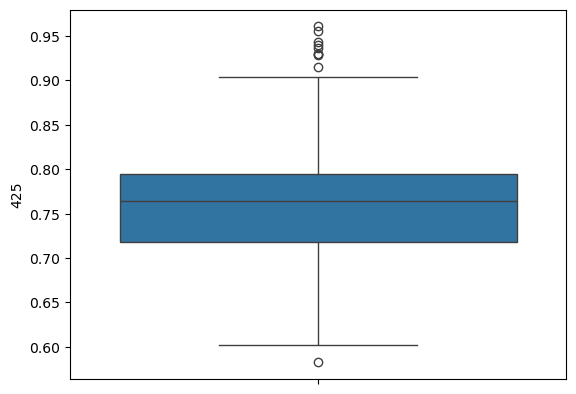

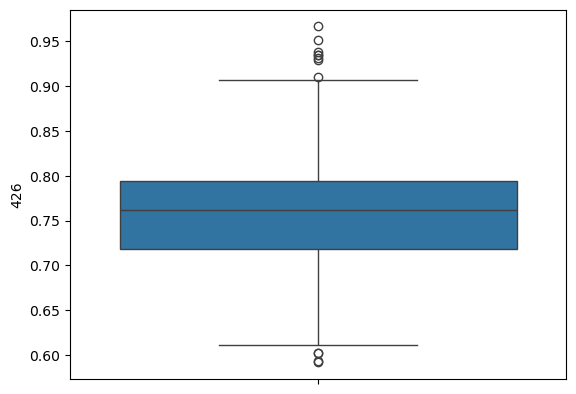

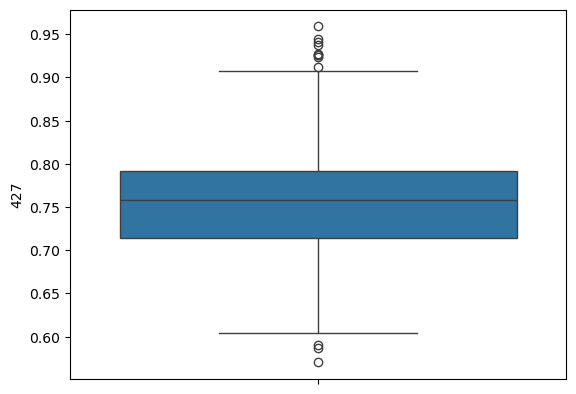

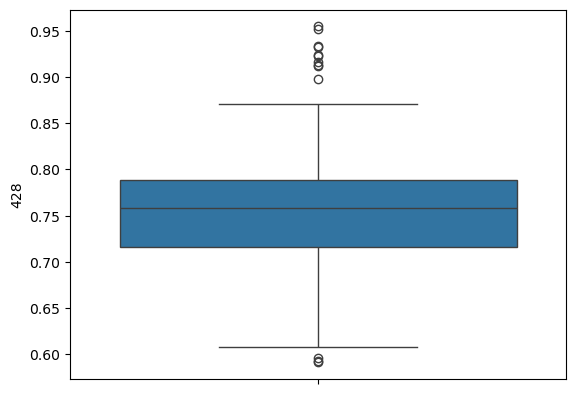

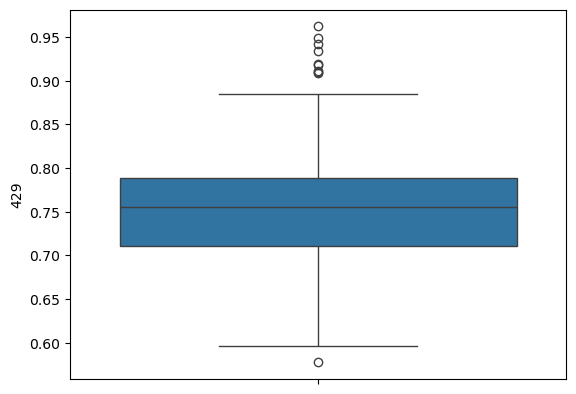

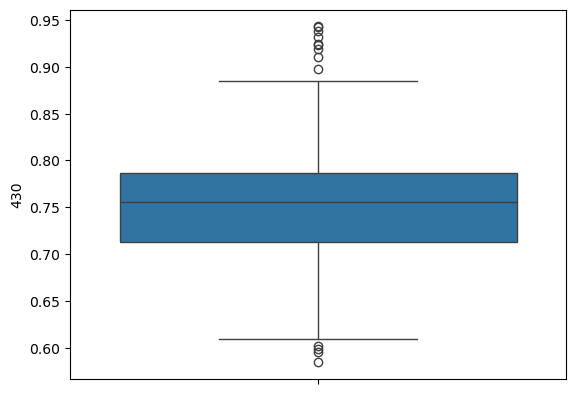

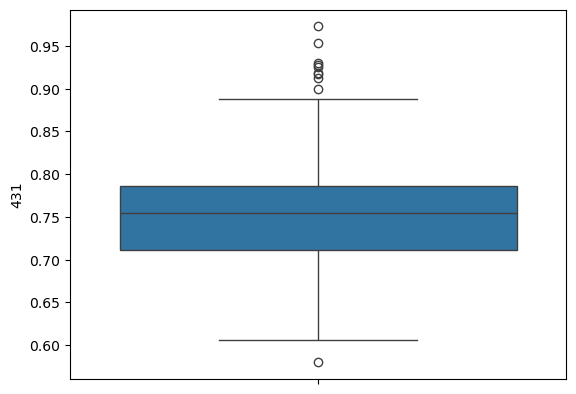

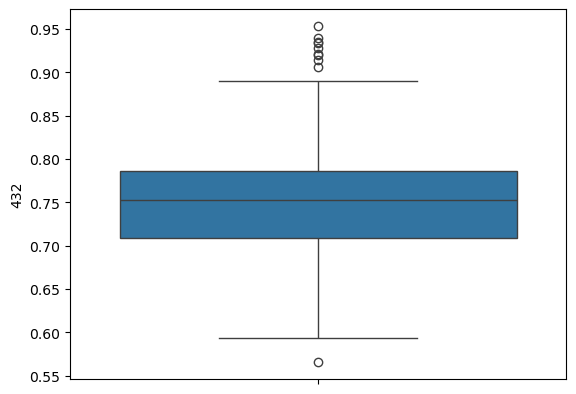

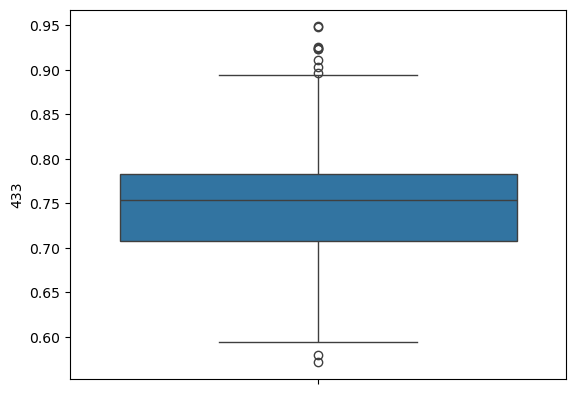

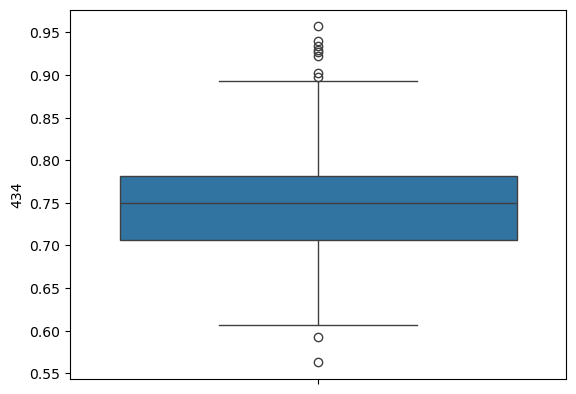

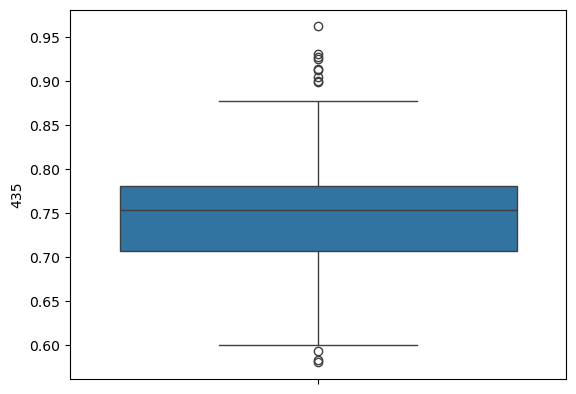

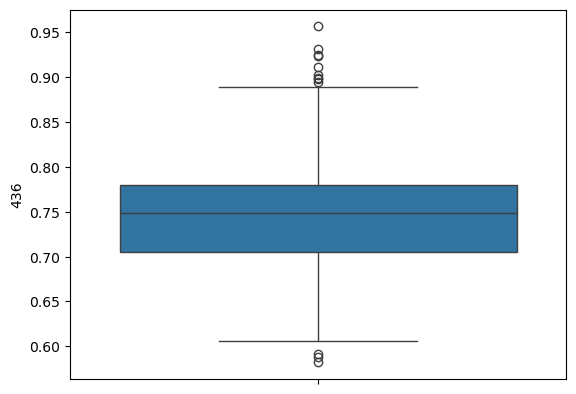

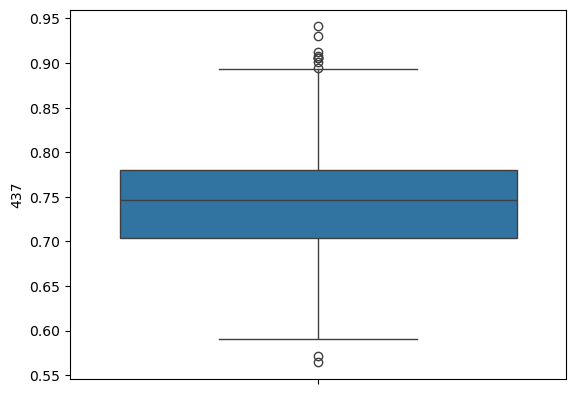

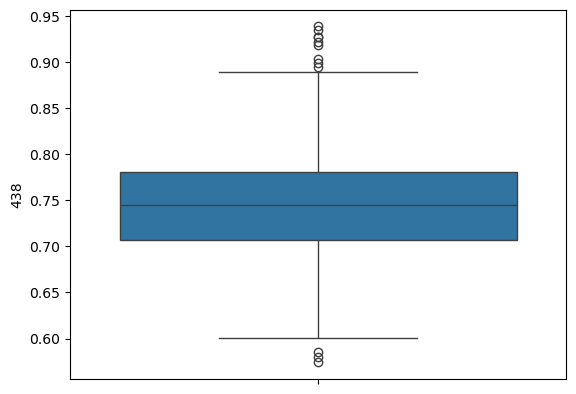

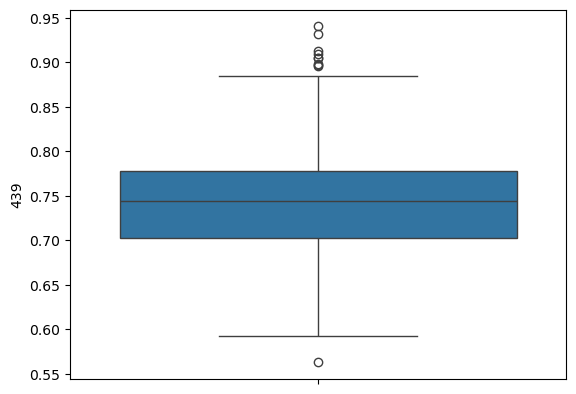

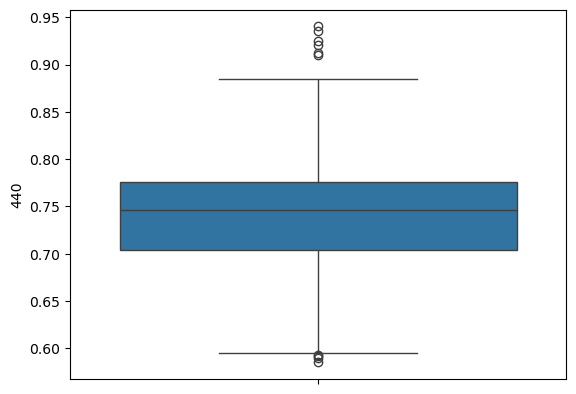

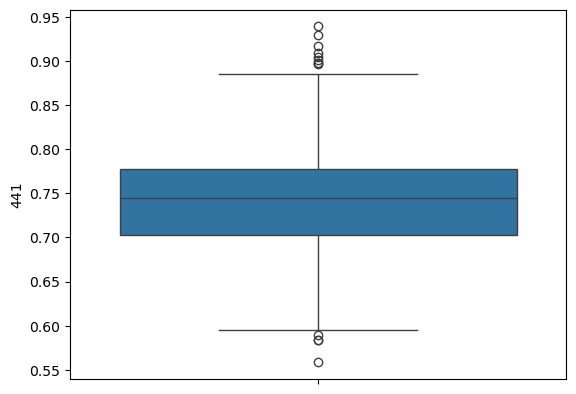

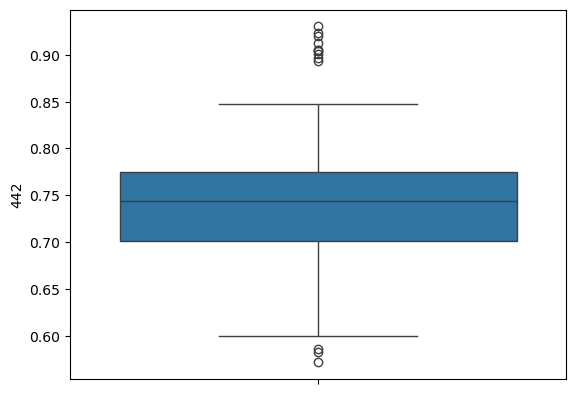

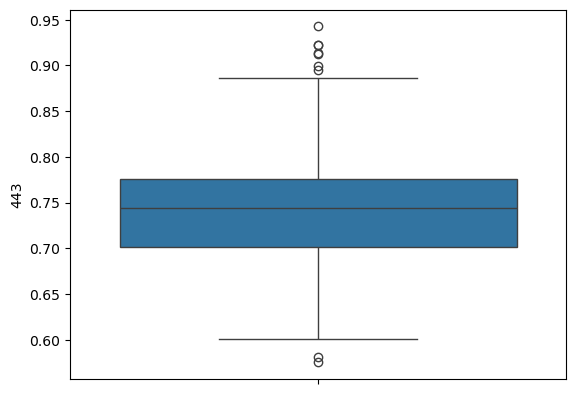

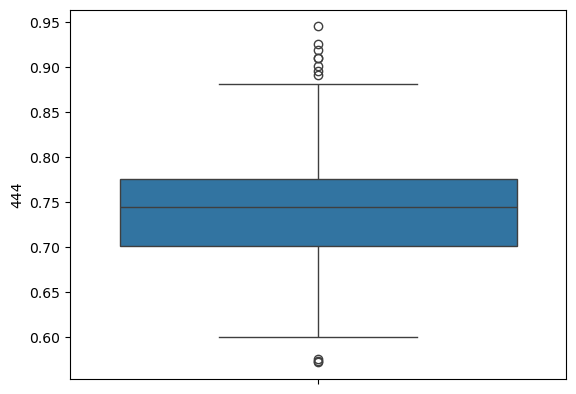

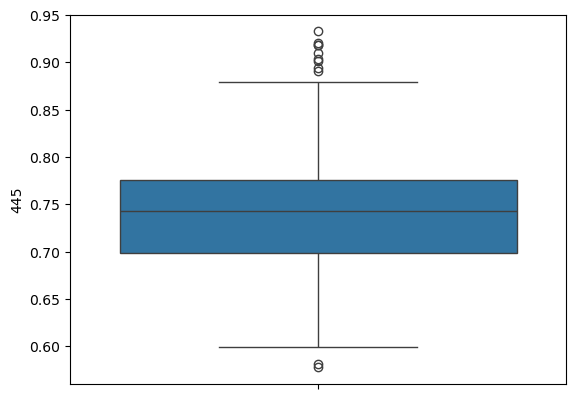

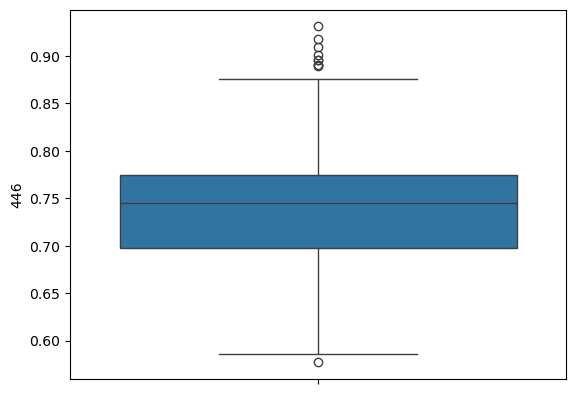

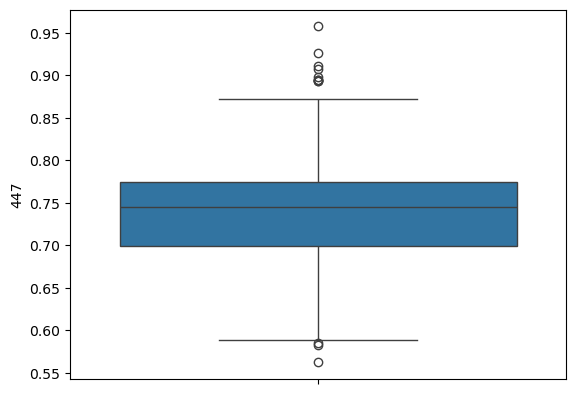

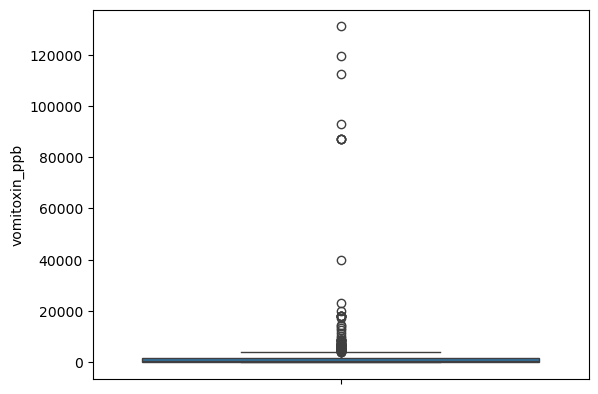

In [24]:
# plotting the individual attributes to understand the outliers
for i in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[i])
    plt.xticks(rotation=90)
    plt.show()

In [351]:
# Preapring the data
x = df.drop(columns=["vomitoxin_ppb", "hsi_id"])
y = df["vomitoxin_ppb"]

### Normalising the input features

In [34]:
"""From the above boxplots, it is evident that the later columns consist of outliers and their range also varies quite a lot, 
so adopting z score  standardization"""

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Verify scaling
print(df_scaled.describe().T)


     count          mean       std       min       25%       50%       75%  \
0    500.0 -1.147527e-15  1.001002 -2.953295 -0.731120  0.134011  0.831070   
1    500.0 -1.945111e-15  1.001002 -3.198256 -0.801558  0.041550  0.836973   
2    500.0  7.549517e-16  1.001002 -3.275509 -0.804415  0.008763  0.860591   
3    500.0  1.158185e-15  1.001002 -3.130318 -0.805966 -0.022772  0.843594   
4    500.0  1.950440e-15  1.001002 -2.695960 -0.813235 -0.042216  0.887180   
..     ...           ...       ...       ...       ...       ...       ...   
443  500.0  1.062261e-15  1.001002 -3.080278 -0.714152  0.077754  0.670901   
444  500.0 -1.231015e-15  1.001002 -3.118191 -0.711521  0.097618  0.690007   
445  500.0 -1.062261e-15  1.001002 -2.974350 -0.734692  0.092719  0.691675   
446  500.0 -5.169198e-16  1.001002 -2.969839 -0.730230  0.140840  0.684827   
447  500.0 -1.397993e-15  1.001002 -3.240969 -0.708425  0.140722  0.667574   

          max  
0    2.533217  
1    1.966067  
2    2.077084  

### Understanding the correlation between features

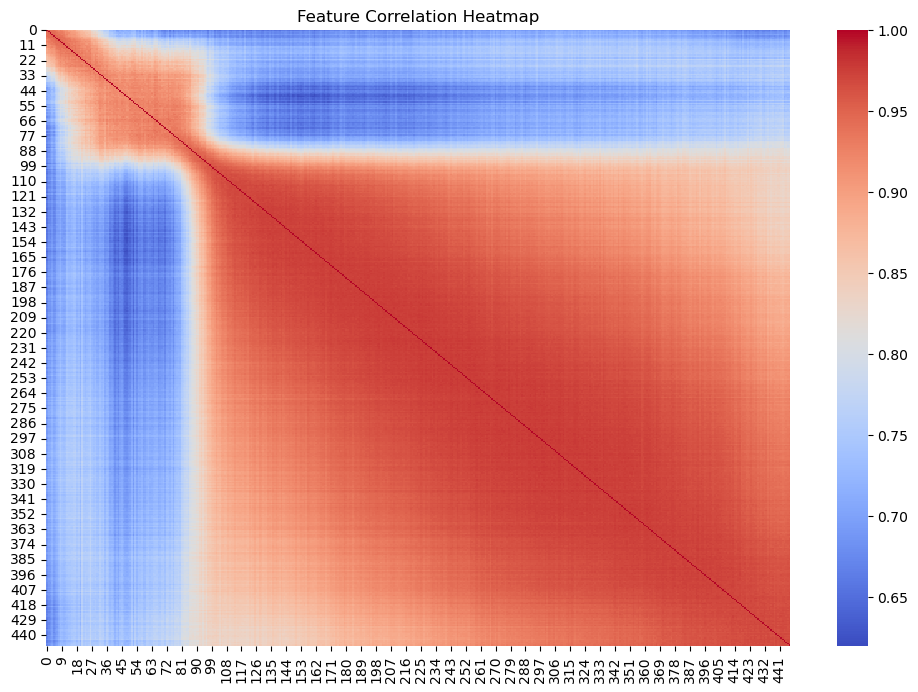

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(x.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
"""majority of the attributes are correlated to one another showing strong linear realtionship"""

### Calculating avg_reflectance

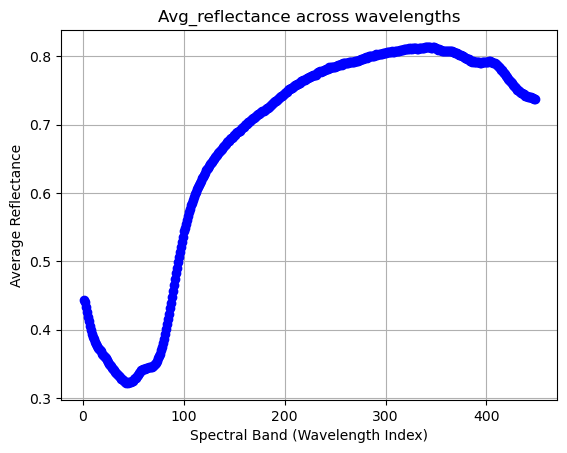

In [71]:

avg_reflectance = np.mean(x, axis =0)

plt.plot(range(1,len(avg_reflectance)+1), avg_reflectance, marker='o', linestyle='-', color='b')
plt.title('Avg_reflectance across wavelengths not normalized')
plt.xlabel("Spectral Band (Wavelength Index)")
plt.ylabel("Average Reflectance")
plt.grid(True)
plt.show()

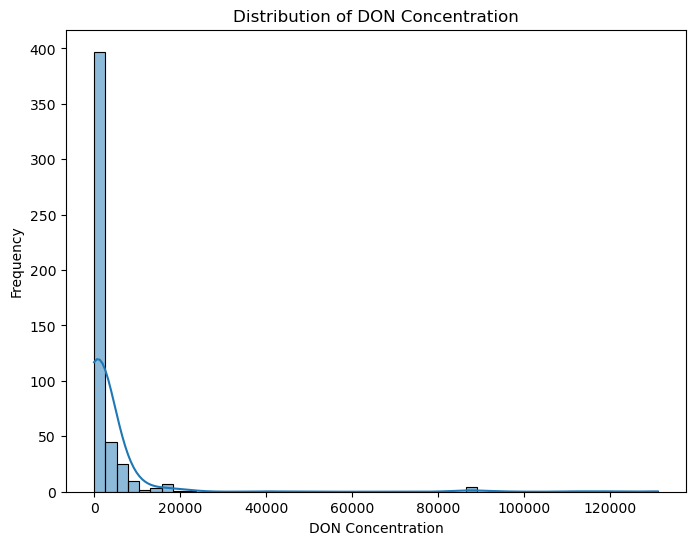

In [334]:
 # y = Target Variable (DON concentration)
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=50, kde=True) 
plt.xlabel("DON Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of DON Concentration")
plt.show()


### Dimensionality Reduction

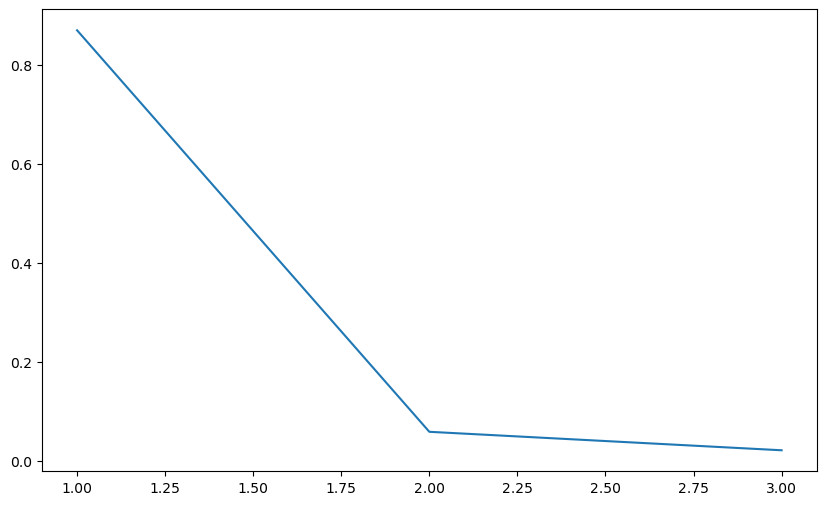

Explained variance by PC1: 87.08%
Explained variance by PC2: 5.85%
Total variance explained (PC1 + PC2): 95.04%


In [272]:
""" Applying PCA to assess linearity in the data. If variance is distributed across many components, the data is likely non-linear. 
If the first 2-3 components capture over 90% of the variance, it suggests strong linear relationships."""
# Apply PCA
pca = PCA(n_components=0.95)  # Reduce to 2D
X_pca = pca.fit_transform(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
PC_values = np.arange(pca.n_components_) + 1

# Scatter plot of PCA components
plt.figure(figsize=(10, 6))
plt.plot(PC_values, explained_variance_ratio )
plt.show()

# Print explained variance
print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total variance explained (PC1 + PC2): {np.sum(pca.explained_variance_ratio_[:4])*100:.2f}%")

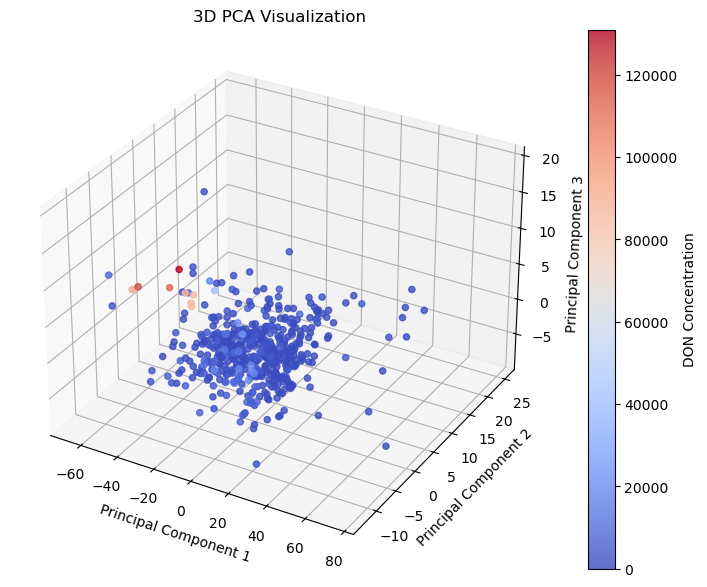

In [336]:
""" The 3D plot also suggests that PC1 and PC2 capture most of the variance in the data"""

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="coolwarm", alpha=0.8)

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization")

# Add colorbar for target variable
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("DON Concentration")

# Show plot
plt.show()

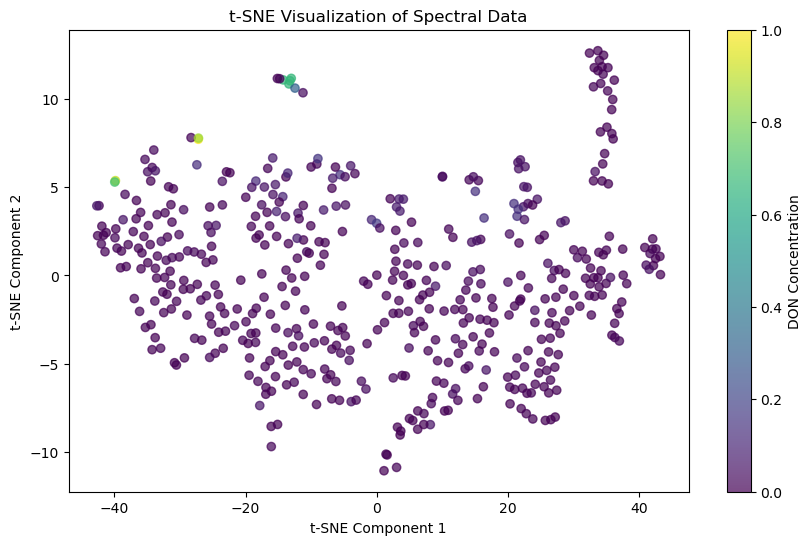

In [340]:
"""The t-SNE plot also confirms our assumption that the data is mostly linearly related. Since there are no evident clusters that have formed which 
denote non linearity"""
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Scatter plot of t-SNE components
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_scaled_mm, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Spectral Data")
plt.colorbar(label="DON Concentration")
plt.show()


### Testing Different Models and evaluating the metrics

In [358]:
#lINEAR REGRESSION AND TYPES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xtrain, xtest, ytrain, ytest = train_test_split(X_pca,y, random_state=42, test_size=0.2)

models = {
    "linear_reg": LinearRegression(),
    "ridge": Ridge(alpha=0.2),
    "lasso": Lasso(alpha=0.2)
}

results ={}
for name, model in models.items():
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    mae = mean_absolute_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

#Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                    MAE          RMSE  R² Score
linear_reg  4917.784528  12123.321493  0.474213
ridge       4917.731322  12123.467485  0.474200
lasso       4917.769809  12123.358627  0.474210


In [280]:
# RANDOM FORESTS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(xtrain, ytrain)

# Make predictions
y_pred_rf = rf_model.predict(xtest)

# Evaluate the model
rf_mae = mean_absolute_error(ytest, y_pred_rf)
rf_rmse = mean_squared_error(ytest, y_pred_rf, squared=False)
rf_r2 = r2_score(ytest, y_pred_rf)

print(f"Random Forest - MAE: {rf_mae}, RMSE: {rf_rmse}, R² Score: {rf_r2}")



Random Forest - MAE: 1825.0639, RMSE: 3876.4447101276965, R² Score: 0.9462431358152656


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [288]:
# XGBOOST
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.15, random_state=42)
xgb_model.fit(xtrain, ytrain)

# Make predictions
y_pred_xgb = xgb_model.predict(xtest)

# Evaluate the model
xgb_mae = mean_absolute_error(ytest, y_pred_xgb)
xgb_rmse = mean_squared_error(ytest, y_pred_xgb, squared=False)
xgb_r2 = r2_score(ytest, y_pred_xgb)

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, R² Score: {xgb_r2}")



XGBoost - MAE: 1876.824557247162, RMSE: 4299.154808616992, R² Score: 0.9338799905667898


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [290]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(xtrain, ytrain)

# Predict
y_pred_dt = dt_reg.predict(xtest)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_dt = mean_absolute_error(ytest, y_pred_dt)
rmse_dt = mean_squared_error(ytest, y_pred_dt, squared=False)
r2_dt = r2_score(ytest, y_pred_dt)

print(f"Decision Tree - MAE: {mae_dt}, RMSE: {rmse_dt}, R² Score: {r2_dt}")


Decision Tree - MAE: 1793.0, RMSE: 3953.096507802459, R² Score: 0.9440961686710798


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [360]:
# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(xtrain.shape[1],)),  # Input layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer (no activation for regression)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
#Train
history = model.fit(xtrain, ytrain, epochs=70, batch_size=32, validation_data=(xtest, ytest), verbose=1)



C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 126132528.0000 - mae: 2998.2783 - val_loss: 298881920.0000 - val_mae: 4405.8174
Epoch 2/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87965464.0000 - mae: 2471.8862 - val_loss: 298660992.0000 - val_mae: 4393.3359
Epoch 3/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 137868784.0000 - mae: 2818.4812 - val_loss: 298068320.0000 - val_mae: 4363.5977
Epoch 4/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96096488.0000 - mae: 2494.8828 - val_loss: 296817024.0000 - val_mae: 4314.3730
Epoch 5/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 120852008.0000 - mae: 2815.2305 - val_loss: 294091072.0000 - val_mae: 4267.6748
Epoch 6/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 164766704.0000 - mae: 3304.1873 - val_loss: 289446112.0000 - val_mae: 4285.0317
Epoch 7/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 212067232.0000 - mae: 3641.2087 - val_loss: 281446432.0000 - val_mae: 4392.5854
Epoch 8/70
13/13 ━━━━━━━━━━━━━━━━━

In [300]:
# Metrics of NN
y_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)

print(f"Neural Network - MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Neural Network - MAE: 3302.208339385986, RMSE: 9744.567213734908, R² Score: 0.6603028916184348


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Visualising the results with the actual values

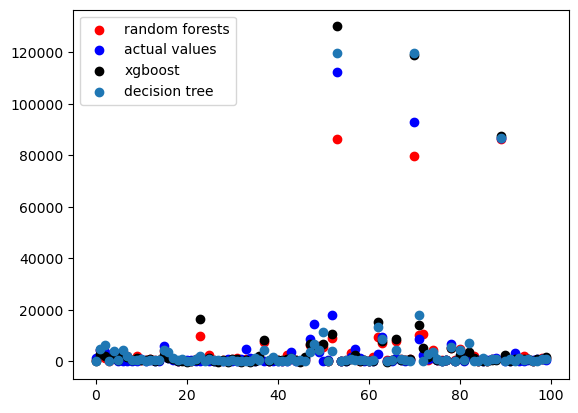

In [362]:
plt.scatter(x=a, y=y_pred_rf,color='red', label='random forests')
plt.scatter(x=a,y=ytest, color='blue',label='actual values')
plt.scatter(x=a,y=y_pred_xgb, color='black', label='xgboost')
plt.scatter(x=a, y=y_pred_dt, label='decision tree')
plt.legend()
plt.show()


### Hyperparameter tuning using GridSearchCV

In [371]:


from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3],
    'max_depth': [3, 6, 9],
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(xtrain, ytrain)
print(f"Best hyperparameters: {grid_search.best_params_}")
best_xgb_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_xgb_model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)

print(f"XGBoost - MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")



Fitting 3 folds for each of 63 candidates, totalling 189 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
XGBoost - MAE: 1755.68091796875, RMSE: 2979.2737527627214, R² Score: 0.9682467955275808


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
